In [9]:
%run setup.py

In [10]:
from scipy.interpolate import interp1d
import rotation_matrix
from ugali.utils.projector import angsep
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ugali.utils import healpix
import gala.coordinates
reload(gala.coordinates)
import matplotlib
import matplotlib.colors as colors
import matplotlib.cm as cmx
import elysian
import astropy.coordinates as coords
import astropy.units as u


In [11]:
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)


In [12]:
# CLUSTER COORDS
ra_pal13, dec_pal13 = 346.685, 12.772
r_pal13 = 6.7/60. # jacobi radius from Bradford+2013 https://arxiv.org/pdf/1110.0484.pdf
print(r_pal13)


# TRACK
track = [[-15.565158278830129, 9.145015179988334], [-14.881249805204186, 9.873014086896049], [-14.53725784224214, 10.956851911047934], [-13.731111722451066, 11.824486548597307], [-13.373216530635766, 12.645598497803462], [-12.198346421088706, 14.068007512069045], [-11.590156400814827, 15.172339805750198], [-10.808168892877427, 16.02910634268146], [-10.175911928488054, 16.87124879970905], [-9.804650620987337, 17.42797474620764]]
ra_track, dec_track = [[ i for i, j in track ], 
                       [ j for i, j in track ]]

# MATRIX
reload(streamlib)
import results
reload(results)

# ends = [[-15.6, 9.1],[-9.6,17.8]]
# ends = [[-15.7, 8.9],[-9.7, 17.9]]
ends = [[-15.7, 8.9],[-9.8, 18.2]]
# ends = [[ra_track[0], dec_track[0]],[ra_track[-1], dec_track[-1]]]
R = np.array(streamlib.get_rotmat(ends=ends, center=(ra_pal13, dec_pal13)))

Rnew = np.copy(R)
Rnew[-2] *= -1
Rnew[-1] *= -1
# print(Rnew)

R = Rnew
print('R = ')
print(R)
print()

Rtest = np.round(R, 10)
print(Rtest)


ra_track = [ends[0][0]] + ra_track + [ends[1][0]]
dec_track = [ends[0][1]] + dec_track + [ends[1][1]]
print()
print(ra_track, dec_track)
print()

arr = np.ones(1)
phi1_pal13, phi2_pal13 = rotation_matrix.phi12_rotmat(ra_pal13*arr, dec_pal13*arr, Rtest)
print('phi12 = ', phi1_pal13, phi2_pal13)
phi1_ends, phi2_ends = rotation_matrix.phi12_rotmat(np.array([ends[0][0], ends[1][0]]), np.array([ends[0][1], ends[1][1]]), Rtest)
print('phi12 ends = ', phi1_ends, phi2_ends)
print(np.array([ends[0][0], ends[1][0]]), np.array([ends[0][1], ends[1][1]]))
print()

phi1_min = np.min(phi1_ends)
phi1_max = np.max(phi1_ends)
print(phi1_min, phi1_max)
###############

phi1_track, phi2_track = rotation_matrix.phi12_rotmat(np.asarray(ra_track), np.asarray(dec_track), R)
interp_track = interp1d(phi1_track, phi2_track, fill_value='extrapolate')

ra_plot, dec_plot = rotation_matrix.phi12_rotmat(np.array([-5, -1, 1, 5]), np.array([0.25]*4), np.linalg.inv(R))
length = angsep(ends[0][0], ends[0][1], ends[1][0], ends[1][1])
length1 = angsep(ends[0][0], ends[0][1], ra_pal13, dec_pal13)
length2 = angsep(ends[1][0], ends[1][1], ra_pal13, dec_pal13)
print('length = %.2f deg' %length)
print(length1, length2)
print(phi1_track.min(), phi1_track.max())

0.11166666666666666
158.98470572695592 120.60701163554218 165.119411108099
R = 
[[ 0.94906836 -0.2245356   0.22102719]
 [-0.06325861  0.5514361   0.83181523]
 [-0.3086545  -0.80343138  0.50914675]]

[[ 0.94906836 -0.2245356   0.22102719]
 [-0.06325861  0.5514361   0.83181523]
 [-0.3086545  -0.80343138  0.50914675]]

[-15.7, -15.565158278830129, -14.881249805204186, -14.53725784224214, -13.731111722451066, -13.373216530635766, -12.198346421088706, -11.590156400814827, -10.808168892877427, -10.175911928488054, -9.804650620987337, -9.8] [8.9, 9.145015179988334, 9.873014086896049, 10.956851911047934, 11.824486548597307, 12.645598497803462, 14.068007512069045, 15.172339805750198, 16.02910634268146, 16.87124879970905, 17.42797474620764, 18.2]

phi12 =  [7.03009136e-10] [0.00503453]
phi12 ends =  [-4.52517361  6.39740216] [9.66781778e-10 9.52243992e-10]
[-15.7  -9.8] [ 8.9 18.2]

-4.525173607446074 6.397402164881388
length = 10.92 deg
4.52517640344433 6.397404137688771
-4.525173608656733 6.39

In [13]:
plot_density.mod2dist(16.8)

22.90867652767775

8.916094081722214 17.666205920497227 8.9 18.2


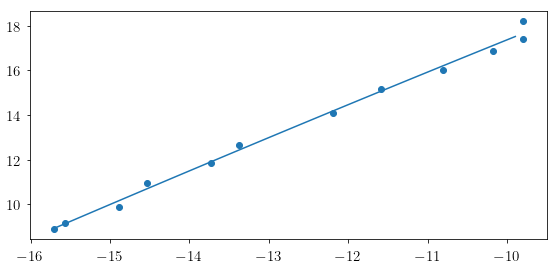

[-7.74620283e-03  1.28554163e+00  3.10084592e+01]


In [14]:
# polynomial track

p = np.polyfit(ra_track, dec_track, deg=2)
plt.figure(figsize=(8,4))
plt.scatter(ra_track, dec_track)
xx = np.arange(np.min(ra_track), np.max(ra_track), 0.1)
track_p = lambda xx: p[0]*xx**2 + p[1]*xx + p[2]
print(track_p(ends[0][0]), track_p(ends[1][0]), ends[0][1], ends[1][1])
plt.plot(xx, p[0]*xx**2 + p[1]*xx + p[2])
plt.show()
print(p)

In [7]:
c1 = coords.ICRS(ra=ra_pal13*u.degree, dec=dec_pal13*u.degree, distance=22.9*u.kpc)
gc1 = c1.transform_to(coords.Galactocentric)
print(np.sqrt(gc1.x**2 + gc1.y**2 + gc1.z**2))

24.066196660402465 kpc


In [20]:
# test rotmat

ra1, dec1 = ra_pal13, dec_pal13+5
ra2, dec2 = ra_pal13, dec_pal13-5

phi11, phi21 = rotation_matrix.phi12_rotmat(np.array([ra1]), np.array([dec1]), R)
phi12, phi22 = rotation_matrix.phi12_rotmat(np.array([ra2]), np.array([dec2]), R)

print(phi11, phi21, phi12, phi22)
print(phi11 > phi21, phi21>phi22)

[4.26755935] [2.6128291] [-4.26752522] [-2.60278795]
[ True] [ True]


In [47]:
ra_track, dec_track

([-15.7,
  -15.565158278830129,
  -14.881249805204186,
  -14.53725784224214,
  -13.731111722451066,
  -13.373216530635766,
  -12.198346421088706,
  -11.590156400814827,
  -10.808168892877427,
  -10.175911928488054,
  -9.804650620987337,
  -9.8],
 [8.9,
  9.145015179988334,
  9.873014086896049,
  10.956851911047934,
  11.824486548597307,
  12.645598497803462,
  14.068007512069045,
  15.172339805750198,
  16.02910634268146,
  16.87124879970905,
  17.42797474620764,
  18.2])

13.0 13.047961797466591 0.0057099593516914925
Reading ../data/DECaLS_iso_hpxcube_z0.0001_a13.5_gmax23_gmin3p4_E2_C-0p020p1_nogrz.fits.gz...
Reading ../data/DECaLS_nside128.fits.gz...
[0.48181215 0.44494238 0.42568864 0.38566071] [-0.0488313   0.00673128  0.03452202  0.08995316]


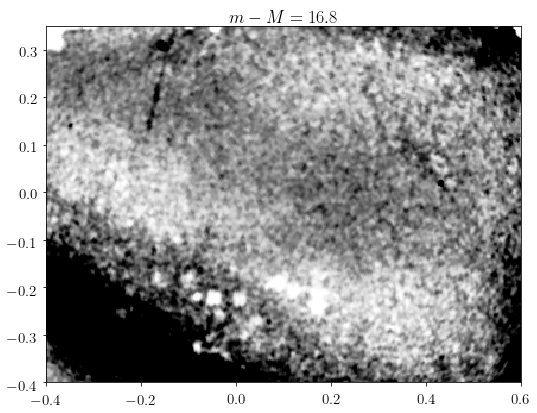

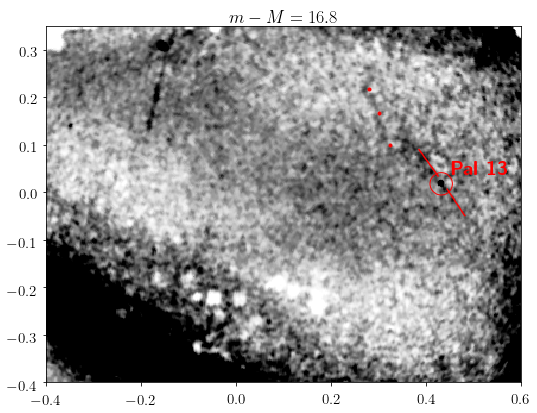

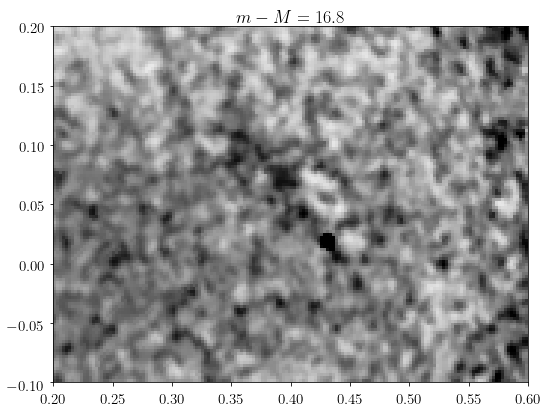

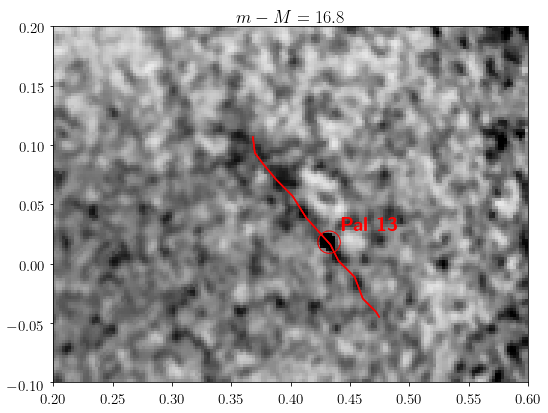

In [57]:
import plot_density_healpy
reload(plot_density_healpy)
import load_data
reload(load_data)
import streamlib
reload(streamlib)
import healpy as hp
from matplotlib.path import Path

proj1 = plot_density_healpy.get_ortho_proj(ends=[[8,13],[18,13]], half_sky=True)
mu = 16.8

# hpxcube_south, fracdet_south, modulus = load_data.load_data('DECaLS', 0.001, 11., 23.0)
# hpxcube_south, fracdet_south, modulus = load_data.load_data('DECaLS', 0.0001, 13.5, 23.0)
# hpxcube_south, fracdet_south, modulus = load_data.load_data(filename='../data/DECaLS_iso_hp
hpxcube_south, fracdet_south, modulus = load_data.load_data(filename='../data/DECaLS_iso_hpxcube_z0.0001_a13.5_gmax23_gmin3p4_E2_C-0p020p1_nogrz.fits.gz')

data_south = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=False, globs_dwarfs=True)
data_south_unm = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
bkg1 = plot_density_healpy.fit_bkg(data_south, proj1, sigma=0.1)
bkg1.mask = data_south_unm.mask
    
ax1, im1 = plot_density_healpy.plot_proj(proj1, data_south_unm-bkg1, vmin=-1.5, vmax=1.5)
ax1.set_title(r'$m - M = %.1f$' %mu)
xmin, xmax, ymin, ymax = -0.4, 0.6, -0.4, 0.35
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)

ax1, im1 = plot_density_healpy.plot_proj(proj1, data_south_unm-bkg1, vmin=-1.5, vmax=1.5)
ax1.set_title(r'$m - M = %.1f$' %mu)
xmin, xmax, ymin, ymax = -0.4, 0.6, -0.4, 0.35
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)

x, y = proj1.ang2xy(ra_pal13, dec_pal13, lonlat=True)
ax1.scatter(x, y, s=500, marker='o', facecolors='none', edgecolors='r', zorder=100)
plt.annotate(r'$\mathrm{\textbf{Pal\ 13}}$', (x + 0.02, y + 0.02), color='r', fontsize=20)

x, y = proj1.ang2xy(ra_plot, dec_plot, lonlat=True)
print(x, y)
ax1.plot(x[:2], y[:2], c='r', zorder=100)
ax1.plot(x[2:], y[2:], c='r', zorder=100)

# North-East Arc
ra_nea = [-7, -6, -5]
dec_nea = [18, 22, 25]
x_nea, y_nea = proj1.ang2xy(ra_nea, dec_nea, lonlat=True)
ax1.plot(x_nea, y_nea, '.', c='r', zorder=100)


ax1, im1 = plot_density_healpy.plot_proj(proj1, data_south_unm-bkg1, vmin=-1.5, vmax=1.5)
ax1.set_title(r'$m - M = %.1f$' %mu)
xmin, xmax, ymin, ymax = 0.2, 0.6, -0.1, 0.2
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)

ax1, im1 = plot_density_healpy.plot_proj(proj1, data_south_unm-bkg1, vmin=-1.5, vmax=1.5)
ax1.set_title(r'$m - M = %.1f$' %mu)
xmin, xmax, ymin, ymax = 0.2, 0.6, -0.1, 0.2
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)

x, y = proj1.ang2xy(ra_pal13, dec_pal13, lonlat=True)
ax1.scatter(x, y, s=500, marker='o', facecolors='none', edgecolors='r', zorder=100)
plt.annotate(r'$\mathrm{\textbf{Pal\ 13}}$', (x + 0.01, y + 0.01), color='r', fontsize=20)

# x, y = proj1.ang2xy(ra_plot, dec_plot, lonlat=True)
# print(x, y)
# ax1.plot(x[:2], y[:2], c='r', zorder=100)
# ax1.plot(x[2:], y[2:], c='r', zorder=100)
x, y = proj1.ang2xy(ra_track, dec_track, lonlat=True)
ax1.plot(x, y, c='r', zorder=100)
ax1.plot(x, y, c='r', zorder=100)


# sel = (np.abs(phi1) < 5) & (np.abs(phi2) < 0.5)
# print(sel.sum())
# x, y = proj1.ang2xy(data['ra'][sel], data['dec'][sel], lonlat=True)
# ax1.scatter(x, y)


# N_stars vs. Distance Modulus

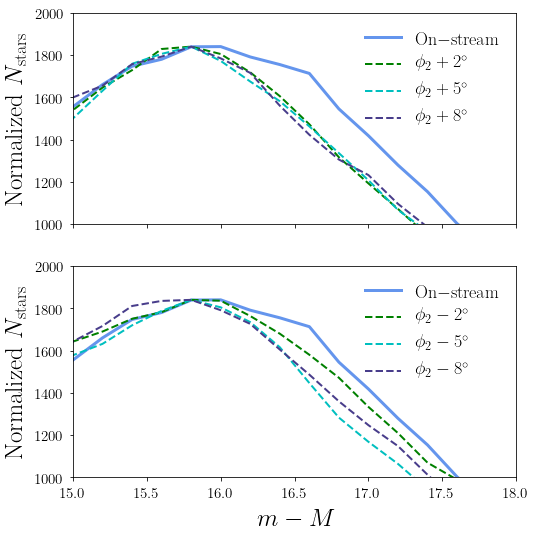

In [488]:
plot_density.plot_pretty(fontsize=25)

hpxmap = hpxcube_south[:,20]
ra, dec = hp.pix2ang(hp.npix2nside(len(hpxmap)), np.arange(len(hpxmap)), lonlat=True)
phi1, phi2 = rotation_matrix.phi12_rotmat(ra, dec, Rnew)

width_on = 0.5
width_off = 0.5

# separation = 5.0

colors = ['cornflowerblue', 'g', 'c', 'darkslateblue']


on_sel = (phi1 > phi1_min) & (phi1 < phi1_max) & (np.abs(interp_track(phi1) - phi2) < (width_on/2.))
# on_sel = (np.abs(phi1) < 5) & (np.abs(interp_track(phi1) - phi2) < (width_on/2.))
sep = angsep(ra, dec, ra_pal13, dec_pal13)
glob_sel = sep < 0.4
on_sel &= ~glob_sel

ons = []
for i, mu in enumerate(modulus):
    hpxmap = hpxcube_south[:,i]
    n_on = np.sum(hpxmap[on_sel])
    ons.append(n_on)

ons = np.asarray(ons)

#########################
# plt.figure(figsize=(12,6))

fig, ax = plt.subplots(2,1, figsize=(8,8), sharex=True)

ax[0].plot(modulus, ons, lw=3, c=colors[0], label=r'$\mathrm{On\mathrm{-}stream}$')
# ax[0].axvline(modulus[np.argmax(ons)], c='C0')

ax[0].set_xlim(15,18)
# ax[0].set_ylim(500,1400)
ax[0].set_ylim(1000,2000)

ax[1].plot(modulus, ons, lw=3, c=colors[0], label=r'$\mathrm{On\mathrm{-}stream}$')
# ax[1].axvline(modulus[np.argmax(ons)], c='C0')

# ax[1].set_xlim(15,18)
# ax[1].set_ylim(500,1400)
ax[1].set_ylim(1000,2000)



for j, separation in enumerate([2.0, 5.0, 8.0]):
    off_min = separation - width_off / 2.
    off_max = separation + width_off / 2.

#     off_sel = (np.abs(phi1) < 5) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
    off_sel = (phi1 > phi1_min) & (phi1 < phi1_max) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)


    off_sel1 = off_sel & (phi2 < 0)
    off_sel2 = off_sel & (phi2 > 0)

    area_corr1 = on_sel.sum() / off_sel1.sum()
    area_corr2 = on_sel.sum() / off_sel2.sum()
    # print(area_corr1, area_corr2)

    offs1 = []
    offs2 = []

    for i, mu in enumerate(modulus):
        hpxmap = hpxcube_south[:,i]

        n_off1 = np.sum(hpxmap[off_sel1])*area_corr1
        n_off2 = np.sum(hpxmap[off_sel2])*area_corr2
        offs1.append(n_off1)
        offs2.append(n_off2)

    offs1 = np.asarray(offs1)
    offs2 = np.asarray(offs2)

    norm1 = ons.max()/offs1.max()
    norm2 = ons.max()/offs2.max()
#     norm1 = 1
#     norm2 = 1

    ax[0].plot(modulus, offs1*norm1, c=colors[j+1], ls='--', lw=2, label=r'$\phi_{\rm 2} + %i^{\circ}$' %separation)
    ax[1].plot(modulus, offs2*norm2, c=colors[j+1], ls='--', lw=2, label=r'$\phi_{\rm 2} - %i^{\circ}$' %separation)
#     ax[0].axvline(modulus[np.argmax(offs1)], c=colors[j+1], ls='--')
#     ax[1].axvline(modulus[np.argmax(offs2)], c=colors[j+1], ls='--')
    
#     plt.figure(figsize=(8,4))
#     plt.plot(modulus, ons, label=r'$\mathrm{On-stream}$')
#     plt.plot(modulus, offs1*norm1, label=r'$\phi_2 > 0$')
#     plt.plot(modulus, offs2*norm2, label=r'$\phi_2 < 0$')
#     plt.axvline(modulus[np.argmax(ons)], c='C0')
#     plt.axvline(modulus[np.argmax(offs1)], c='C1')
#     plt.axvline(modulus[np.argmax(offs2)], c='C2')
#     plt.legend()
#     plt.xlim(15,18)
#     plt.ylim(500,1300)


# plt.legend()
# ax[0].legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
# ax[1].legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].legend(frameon=False, loc='upper right', fontsize=18)
ax[1].legend(frameon=False, loc='upper right', fontsize=18)

ax[1].set_xlabel(r'$m - M$')
ax[0].set_ylabel(r'$\mathrm{Normalized}\ N_{\rm stars}$')
ax[1].set_ylabel(r'$\mathrm{Normalized}\ N_{\rm stars}$')

plt.savefig('../plots/Pal13/nstars_mod_norm.png')
plt.savefig('../plots/Pal13/nstars_mod_norm.pdf', rasterize=True)
plt.show()

In [489]:
hpxmap = hpxcube_south[:,20]
ra, dec = hp.pix2ang(hp.npix2nside(len(hpxmap)), np.arange(len(hpxmap)), lonlat=True)
# phi1, phi2 = rotation_matrix.phi12_rotmat(ra, dec, Rnew)

c = SkyCoord(ra, dec, frame='icrs', unit='deg')
l = c.galactic.l.deg
b = c.galactic.b.deg

In [490]:
np.mean(b[on_sel])

-42.32328747870869

In [491]:
hpxmap = hpxcube_south[:,20]

In [492]:
import galstreams
mw_streams = galstreams.MWStreams(verbose=False)

In [493]:
sgr = mw_streams['Sgr-L10']

20


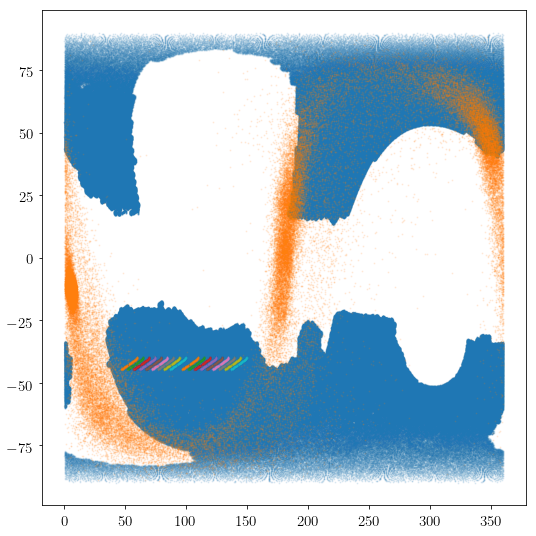

In [494]:
plt.figure(figsize=(8,8))
plt.scatter(l[hpxmap > 0], b[hpxmap > 0], s=1, alpha=0.1)
counter = 0
for dx in np.arange(-35, 60+1, 5):
    plt.scatter(l[on_sel]+dx, b[on_sel], s=1, alpha=0.1)
    counter += 1
print(counter)

plt.scatter(sgr.l, sgr.b, s=1, alpha=0.1, c='C1')

plt.show()

Next steps:
* Use only 2 deg sep
* More regions, constant b
* Try: plot distribution of ratios - is pal 13 region an outlier?
* Try: Sample poisson distribution with average of non-stream regions as rate, is Pal 13 an outlier?


[-40 -30 -20 -10   0  10  20  30  40  50  60  70]
-40
-30
-20
-10
0
10
20
30
40
50
60
70


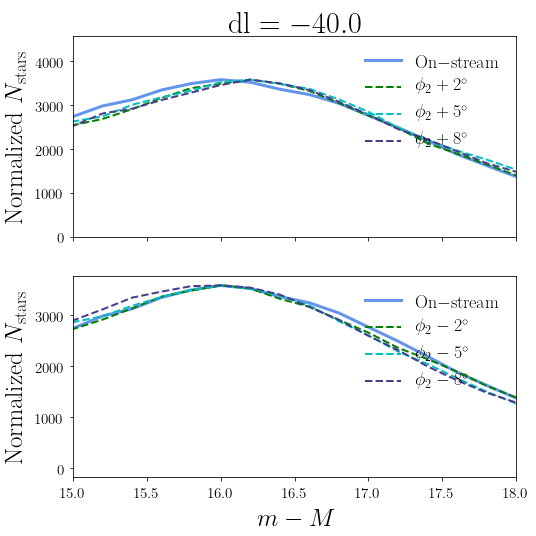

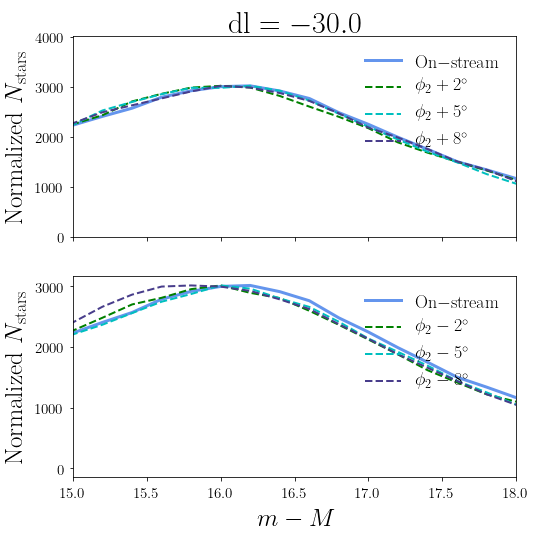

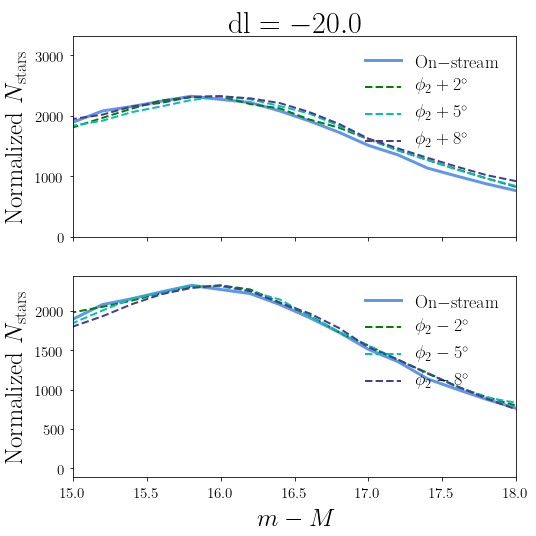

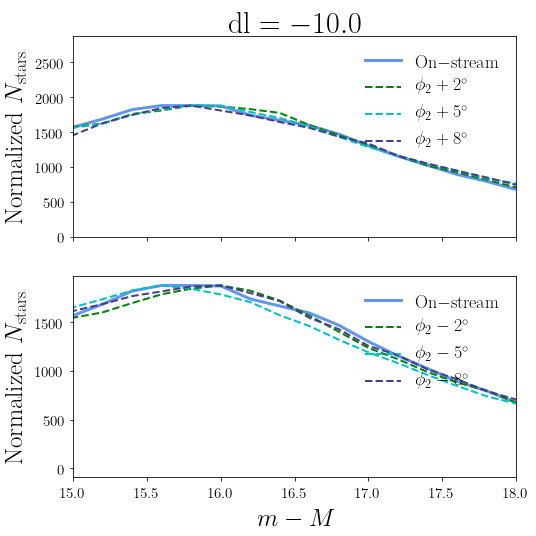

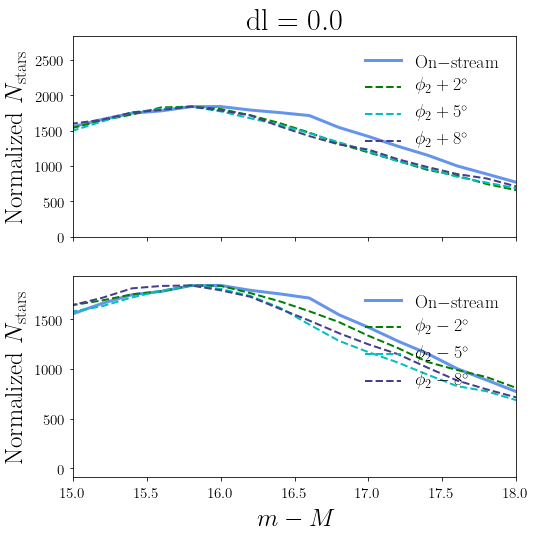

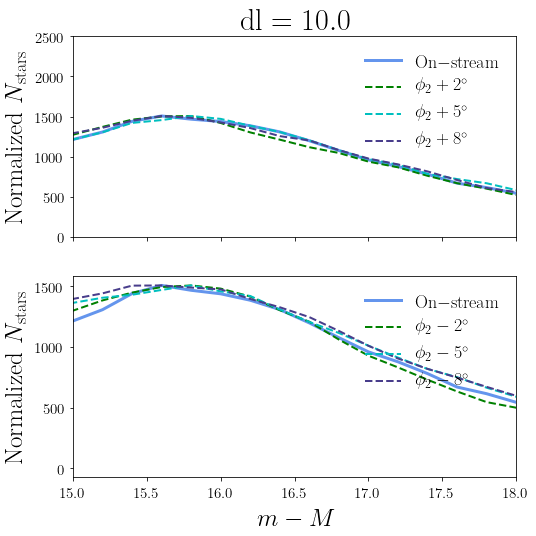

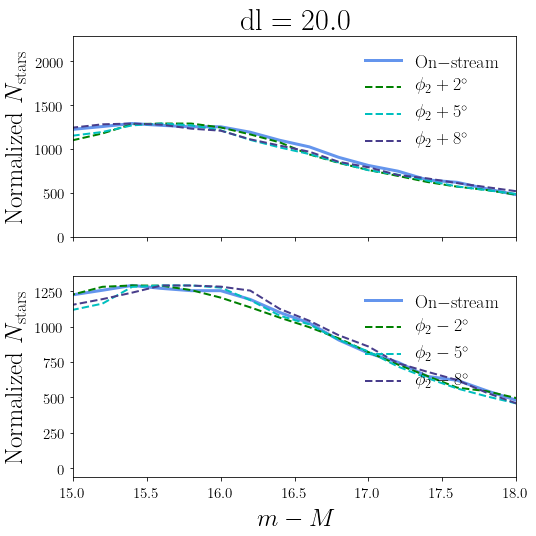

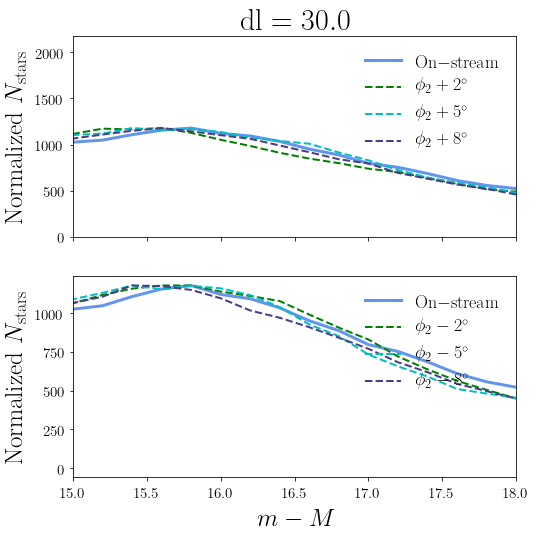

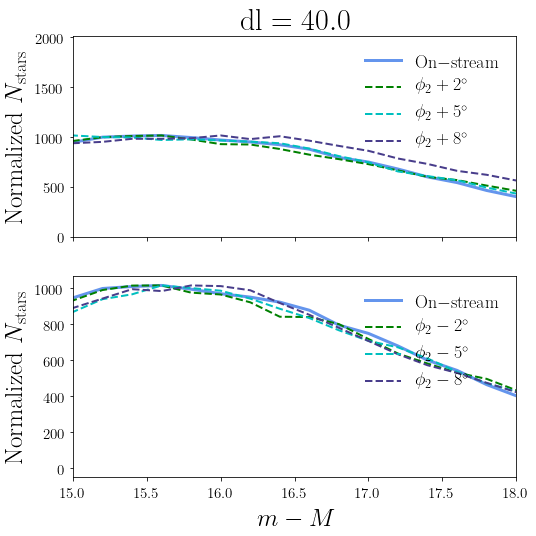

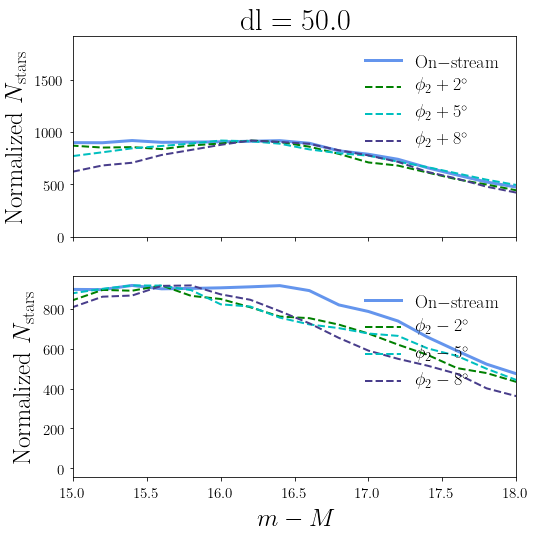

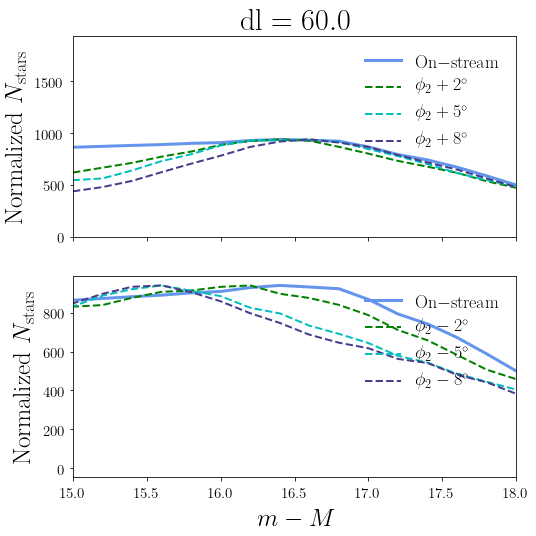

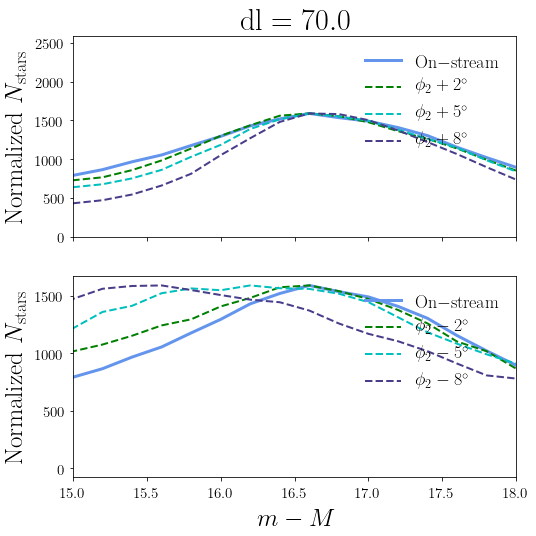

In [495]:
from skymap.utils import gal2cel, cel2gal

plot_density.plot_pretty(fontsize=25)

hpxmap = hpxcube_south[:,20]
ra, dec = hp.pix2ang(hp.npix2nside(len(hpxmap)), np.arange(len(hpxmap)), lonlat=True)
phi1, phi2 = rotation_matrix.phi12_rotmat(ra, dec, Rnew)
l, b = cel2gal(ra, dec)

width_on = 0.5
width_off = 0.5

colors = ['cornflowerblue', 'g', 'c', 'darkslateblue']

on_sel = (phi1 > phi1_min) & (phi1 < phi1_max) & (np.abs(interp_track(phi1) - phi2) < (width_on/2.))
sep = angsep(ra, dec, ra_pal13, dec_pal13)
glob_sel = sep < 0.4
on_sel &= ~glob_sel


b_vals = b[on_sel]
l_vals = l[on_sel]

# plt.figure(figsize=(8,8))

ons_outer = []
dx_array = np.arange(-40, 70+5, 10)
print(dx_array)
for k, dx in enumerate(dx_array):
    print(dx)
    l_vals_new = l_vals + dx
#     plt.scatter(l_vals_new, b_vals, s=1, alpha=0.1, c=colors[k])
    ra_new, dec_new = gal2cel(l_vals_new, b_vals, )
    pix_new = hp.ang2pix(hp.npix2nside(len(hpxmap)), ra_new, dec_new, lonlat=True)

    ons = []
    for i, mu in enumerate(modulus):
        hpxmap = hpxcube_south[:,i]
        n_on = np.sum(hpxmap[pix_new])
                
        ons.append(n_on)
    ons = np.asarray(ons)
    ons_outer.append(ons)
        
    #########################
    fig, ax = plt.subplots(2,1, figsize=(8,8), sharex=True)

    ax[0].plot(modulus, ons, lw=3, c=colors[0], label=r'$\mathrm{On\mathrm{-}stream}$')
    ax[0].set_xlim(15,18)
#     ax[0].set_ylim(1000,2000)

    ax[1].plot(modulus, ons, lw=3, c=colors[0], label=r'$\mathrm{On\mathrm{-}stream}$')
#     ax[1].set_ylim(1000,2000)


    for j, separation in enumerate([2.0, 5.0, 8.0]):
        off_min = separation - width_off / 2.
        off_max = separation + width_off / 2.

        off_sel = (phi1 > phi1_min) & (phi1 < phi1_max) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)

        off_sel1 = off_sel & (phi2 < 0)
        off_sel2 = off_sel & (phi2 > 0)

        b_vals1 = b[off_sel1]
        l_vals1 = l[off_sel1]
        
        l_vals1_new = l_vals1 + dx
        ra_new1, dec_new1 = gal2cel(l_vals1_new, b_vals1)
        pix_new1 = hp.ang2pix(hp.npix2nside(len(hpxmap)), ra_new1, dec_new1, lonlat=True)

        b_vals2 = b[off_sel2]
        l_vals2 = l[off_sel2]
        
        l_vals2_new = l_vals2 + dx
        ra_new2, dec_new2 = gal2cel(l_vals2_new, b_vals2)
        pix_new2 = hp.ang2pix(hp.npix2nside(len(hpxmap)), ra_new2, dec_new2, lonlat=True)

#         plt.scatter(l_vals2_new, b_vals2, s=1, alpha=0.1, c=colors[k])
#         plt.scatter(l_vals1_new, b_vals1, s=1, alpha=0.1, c=colors[k])

        area_corr1 = pix_new.size / pix_new1.size
        area_corr2 = pix_new.size / pix_new2.size
#         area_corr1 = on_sel.sum() / off_sel1.sum()
#         area_corr2 = on_sel.sum() / off_sel2.sum()

        offs1 = []
        offs2 = []

        for i, mu in enumerate(modulus):
            hpxmap = hpxcube_south[:,i]

            n_off1 = np.sum(hpxmap[pix_new1])*area_corr1
            n_off2 = np.sum(hpxmap[pix_new2])*area_corr2
            offs1.append(n_off1)
            offs2.append(n_off2)

        offs1 = np.asarray(offs1)
        offs2 = np.asarray(offs2)

        norm1 = ons.max()/offs1.max()
        norm2 = ons.max()/offs2.max()

        ax[0].plot(modulus, offs1*norm1, c=colors[j+1], ls='--', lw=2, label=r'$\phi_{\rm 2} + %i^{\circ}$' %separation)
        ax[1].plot(modulus, offs2*norm2, c=colors[j+1], ls='--', lw=2, label=r'$\phi_{\rm 2} - %i^{\circ}$' %separation)


    ax[0].set_ylim(0, ons.max() + 1000)
    
    ax[0].legend(frameon=False, loc='upper right', fontsize=18)
    ax[1].legend(frameon=False, loc='upper right', fontsize=18)

    ax[1].set_xlabel(r'$m - M$')
    ax[0].set_ylabel(r'$\mathrm{Normalized}\ N_{\rm stars}$')
    ax[1].set_ylabel(r'$\mathrm{Normalized}\ N_{\rm stars}$')

    ax[0].set_title(r'$\mathrm{dl = %.1f}$' %dx)
    
plt.show()

In [496]:
# single off - +2 deg

from skymap.utils import gal2cel, cel2gal

plot_density.plot_pretty(fontsize=25)

hpxmap = hpxcube_south[:,20]
ra, dec = hp.pix2ang(hp.npix2nside(len(hpxmap)), np.arange(len(hpxmap)), lonlat=True)
phi1, phi2 = rotation_matrix.phi12_rotmat(ra, dec, Rnew)
l, b = cel2gal(ra, dec)

width_on = 0.5
width_off = 0.5
separation = 2.0

colors = ['cornflowerblue', 'g', 'c', 'darkslateblue']

on_sel = (phi1 > phi1_min) & (phi1 < phi1_max) & (np.abs(interp_track(phi1) - phi2) < (width_on/2.))
sep = angsep(ra, dec, ra_pal13, dec_pal13)
glob_sel = sep < 0.4
on_sel &= ~glob_sel

off_min = separation - width_off / 2.
off_max = separation + width_off / 2.

off_sel = (phi1 > phi1_min) & (phi1 < phi1_max) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
off_sel1 = off_sel & (phi2 < 0)
off_sel2 = off_sel & (phi2 > 0)

b_vals = b[on_sel]
l_vals = l[on_sel]
b_vals1 = b[off_sel1]
l_vals1 = l[off_sel1]
b_vals2 = b[off_sel2]
l_vals2 = l[off_sel2]

################

ons_outer = []
offs1_outer = []
offs2_outer = []
dx_array = np.arange(-35, 60+1, 5)
print(dx_array)
for k, dx in enumerate(dx_array):
    print(dx)
    l_vals_new = l_vals + dx
    ra_new, dec_new = gal2cel(l_vals_new, b_vals, )
    pix_new = hp.ang2pix(hp.npix2nside(len(hpxmap)), ra_new, dec_new, lonlat=True)
    
    l_vals1_new = l_vals1 + dx
    ra_new1, dec_new1 = gal2cel(l_vals1_new, b_vals1)
    pix_new1 = hp.ang2pix(hp.npix2nside(len(hpxmap)), ra_new1, dec_new1, lonlat=True)


    l_vals2_new = l_vals2 + dx
    ra_new2, dec_new2 = gal2cel(l_vals2_new, b_vals2)
    pix_new2 = hp.ang2pix(hp.npix2nside(len(hpxmap)), ra_new2, dec_new2, lonlat=True)

    area_corr1 = pix_new.size / pix_new1.size
    area_corr2 = pix_new.size / pix_new2.size

    ons = []
    offs1 = []
    offs2 = []
    for i, mu in enumerate(modulus):
        hpxmap = hpxcube_south[:,i]

        n_on = np.sum(hpxmap[pix_new])
        ons.append(n_on)

        n_off1 = np.sum(hpxmap[pix_new1])*area_corr1
        n_off2 = np.sum(hpxmap[pix_new2])*area_corr2
        offs1.append(n_off1)
        offs2.append(n_off2)
                
    ons = np.asarray(ons)
    ons_outer.append(ons)
    

    offs1 = np.asarray(offs1)
    offs2 = np.asarray(offs2)

    norm1 = ons.max()/offs1.max()
    norm2 = ons.max()/offs2.max()
    
    offs1_outer.append(offs1*norm1)
    offs2_outer.append(offs2*norm2)
    
ons_outer = np.asarray(ons_outer)
offs1_outer = np.asarray(offs1_outer)
offs2_outer = np.asarray(offs2_outer)


[-35 -30 -25 -20 -15 -10  -5   0   5  10  15  20  25  30  35  40  45  50
  55  60]
-35
-30
-25
-20
-15
-10
-5
0
5
10
15
20
25
30
35
40
45
50
55
60


In [497]:
ons_outer.shape, offs1_outer.shape, offs2_outer.shape, dx_array.shape, modulus.shape

((20, 31), (20, 31), (20, 31), (20,), (31,))

In [498]:
idx = np.argmin(np.abs(dx - 0))

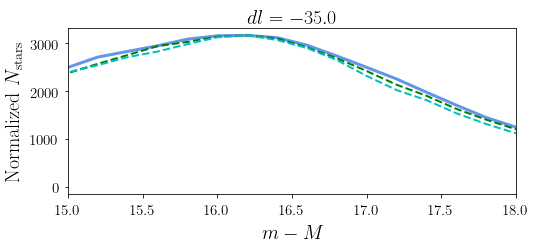

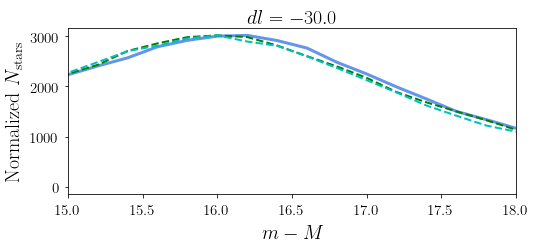

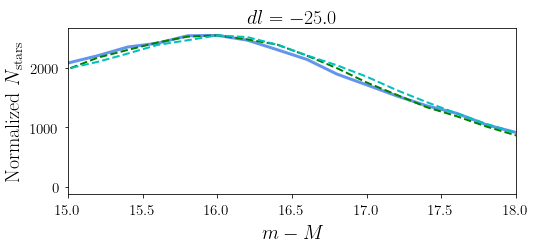

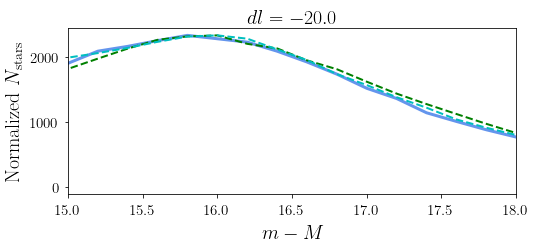

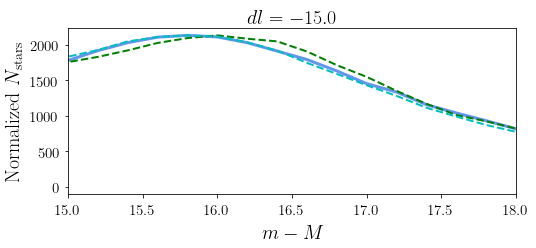

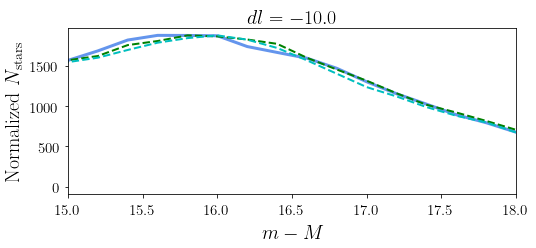

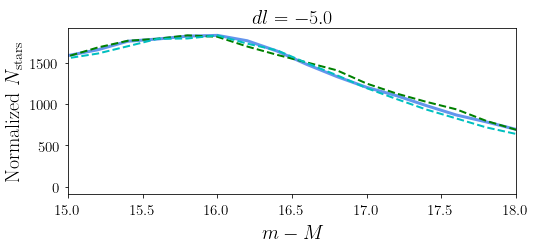

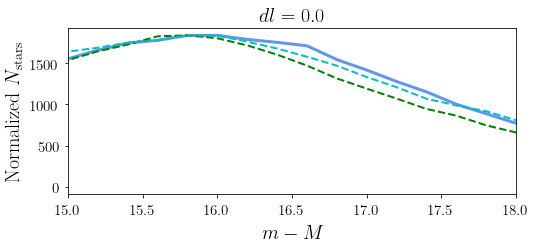

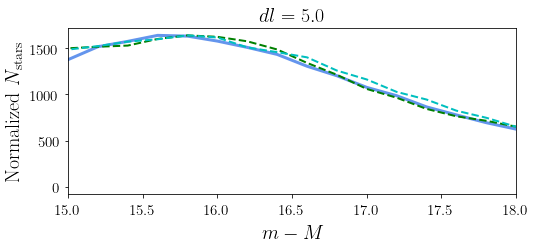

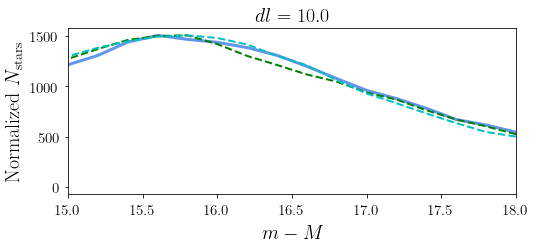

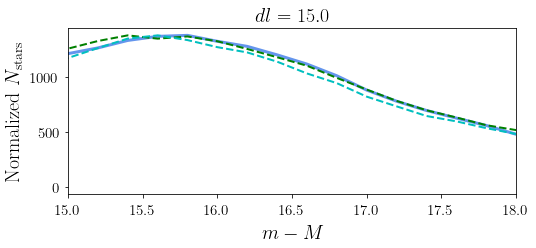

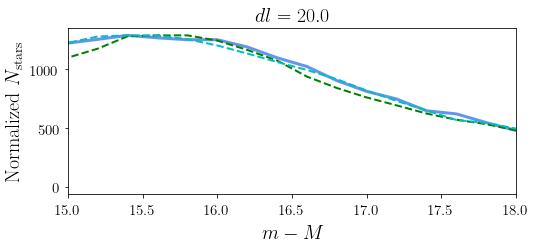

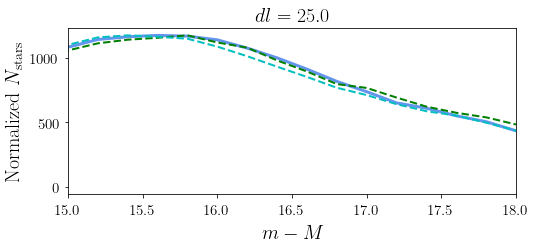

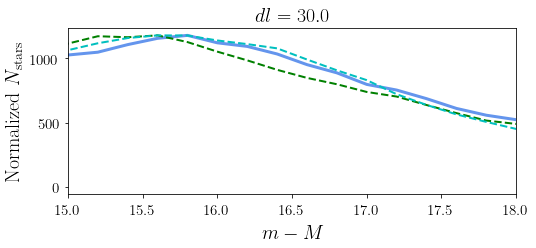

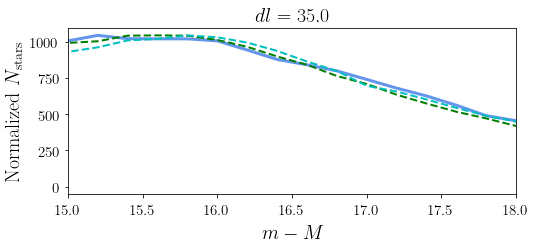

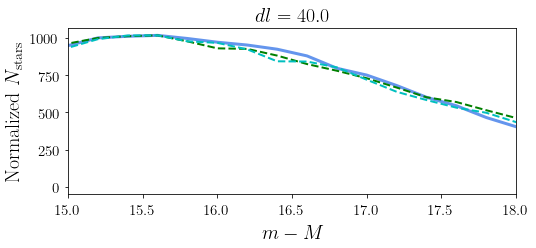

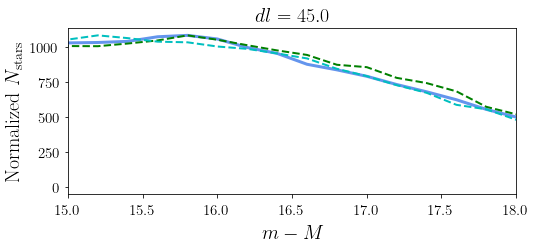

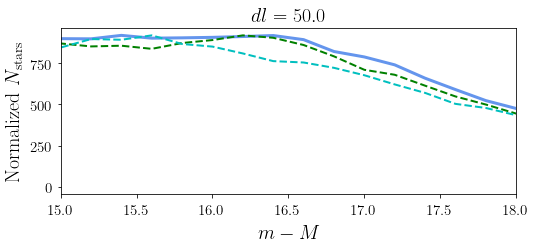

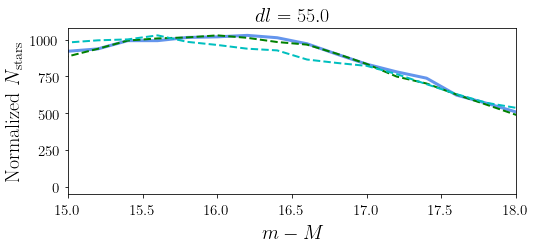

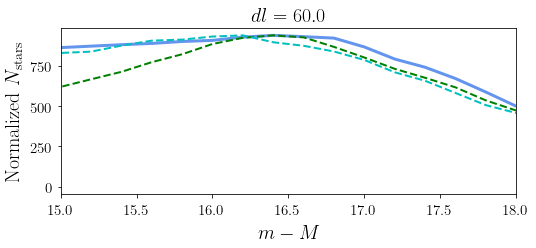

In [499]:
for i, dx in enumerate(dx_array):
    plt.figure(figsize=(8,4))

    plt.plot(modulus, ons_outer[i], lw=3, c=colors[0], label=r'$\mathrm{On\mathrm{-}stream}$')
    plt.xlim(15,18)

    plt.plot(modulus, offs1_outer[i], c=colors[1], ls='--', lw=2, label=r'$\phi_{\rm 2} + 2^{\circ}$')
    plt.plot(modulus, offs2_outer[i], c=colors[2], ls='--', lw=2, label=r'$\phi_{\rm 2} - 2^{\circ}$')

    plt.title(r'$dl = %.1f$' %dx, fontsize=20)
    
#     plt.legend(frameon=False, loc='upper right', fontsize=18)
    
    plt.xlabel(r'$m - M$', fontsize=20)
    plt.ylabel(r'$\mathrm{Normalized}\ N_{\rm stars}$', fontsize=20)
    
plt.show()

In [500]:
ratios = ons_outer / offs1_outer
ratios.shape

differences = np.abs(ons_outer - offs1_outer)
differences.shape

(20, 31)

In [501]:
mu_poisson = np.mean(ratios, axis=0)
mu_poisson.shape
np.max(mu_poisson)
modulus[np.isnan(mu_poisson)]

array([19.6, 19.8, 20. ])

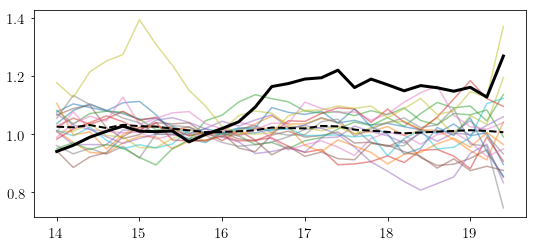

In [502]:
plt.figure(figsize=(8,4))
for i in range(ratios.shape[0]):
    if dx_array[i] == 0:
        plt.plot(modulus, ratios[i], alpha=1.0, c='k', lw=3, zorder=100)
    else:
        plt.plot(modulus, ratios[i], alpha=0.5)
        
plt.plot(modulus, mu_poisson, c='k', lw=2, ls='--')
plt.show()

In [503]:
# def phi(tau):
#     from scipy.integrate import quad
#     func = lambda x: 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)
#     res = quad(func, -np.inf, tau)
#     return res[0]
    
# def g1(r, lambda1, lambda2):
#     c1 = (r+1) * np.exp(((r+1)**2 - (lambda1 + lambda2)*(r**2/lambda1 + 1/lambda2))/(2*(r**2/lambda1 + 1/lambda2)))
#     c2 = (r**2/lambda1 + 1/lambda2)*np.sqrt(2*lambda1*lambda2*np.pi)
#     c3 = phi(lambda1*lambda2*(r+1)/(lambda2*r**2 + lambda1)) - phi(-lambda1*lambda2*(r+1)/(lambda2*r**2 + lambda1))
#     return c1/c2 * c2

In [504]:
def gamma(mu):
    return mu/(1-np.exp(-mu))

In [505]:
def normal_r(x, l1, l2):
    g = gamma(l2)
    mu = l1/g
    var = l1/g**2 + l1**2/g**3
    from scipy.stats import norm
    return norm.pdf(x, loc=mu, scale=np.sqrt(var))

def normal_r_mu_sig(l1, l2):
    g = gamma(l2)
    mu = l1/g
    sig = np.sqrt(l1/g**2 + l1**2/g**3)
    return mu, sig

In [506]:
ons_outer.shape, modulus.shape, ons_outer[:,mod_idx].shape

((20, 31), (31,), (20,))

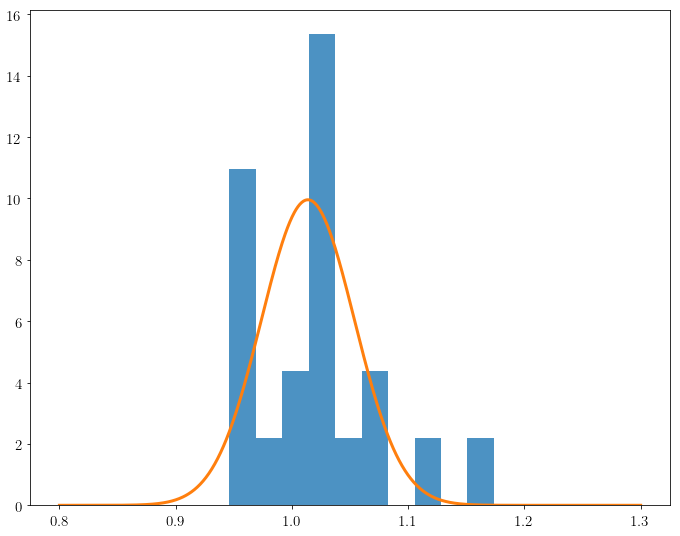

In [507]:
mod_idx = np.argmin(np.abs(modulus - 16.8)) # Pal 13 dm

plt.hist(ons_outer[:,mod_idx]/offs1_outer[:, mod_idx], density=True, alpha=0.8)

xx = np.linspace(0.8,1.3,1000)
plt.plot(xx, normal_r(xx, np.mean(ons_outer[:,mod_idx]), np.mean(offs1_outer[:, mod_idx])), zorder=100, lw=3)
plt.show()

In [508]:
normal_r_mu_sig(np.mean(ons_outer[:,0]), np.mean(offs1_outer[:,0]))

(1.0227798361622, 0.04543763502256418)

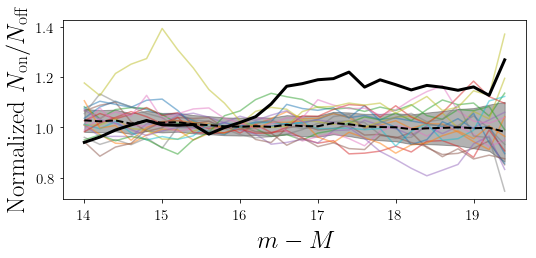

4.236823704603011


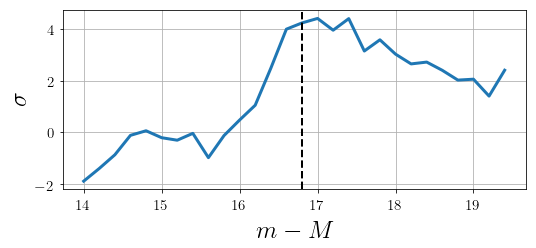

In [509]:
plt.figure(figsize=(8,4))
for i in range(ratios.shape[0]):
    if dx_array[i] == 0:
        plt.plot(modulus, ratios[i], alpha=1.0, c='k', lw=3, zorder=100)
    else:
        plt.plot(modulus, ratios[i], alpha=0.5)
        
        

mu_r, sig_r = [], []
dx_idx_2 = dx_array != 0
for i, mu in enumerate(modulus):
    mui, sigi = normal_r_mu_sig(np.mean(ons_outer[dx_idx_2,i]), np.mean(offs1_outer[dx_idx_2,i]))
    mu_r.append(mui)
    sig_r.append(sigi)
mu_r = np.asarray(mu_r)
sig_r = np.asarray(sig_r)

plt.plot(modulus, mu_r, c='k', lw=2, ls='--')
plt.fill_between(modulus, mu_r-sig_r, mu_r+sig_r, color='k', alpha=0.3)
# plt.plot(modulus, mu_poisson, c='k', lw=2, ls='--')
plt.xlabel(r'$m-M$')
plt.ylabel(r'$\mathrm{Normalized}\ N_{\rm on} / N_{\rm off}$')
plt.show()

dx_idx = np.argmin(np.abs(dx_array))
sig_off = (ratios[dx_idx] - mu_r)/sig_r
mu_idx = np.argmin(np.abs(modulus-16.8))
print(sig_off[mu_idx])

plt.figure(figsize=(8,4))
plt.plot(modulus, sig_off, lw=3)
plt.axvline(16.8, lw=2, ls='--', c='k')
plt.xlabel(r'$m-M$')
plt.ylabel(r'$\sigma$')
plt.grid()

In [510]:
# ratios3 = ons_outer / offs2_outer

# plt.figure(figsize=(8,4))
# for i in range(ratios3.shape[0]):
#     if dx_array[i] == 0:
#         plt.plot(modulus, ratios3[i], alpha=1.0, c='k', lw=3, zorder=100)
#     else:
#         plt.plot(modulus, ratios3[i], alpha=0.5)
        
        

# mu_r, sig_r = [], []
# dx_idx_2 = dx_array != 0
# for i, mu in enumerate(modulus):
#     mui, sigi = normal_r_mu_sig(np.mean(ons_outer[dx_idx_2,i]), np.mean(offs2_outer[dx_idx_2,i]))
#     mu_r.append(mui)
#     sig_r.append(sigi)
# mu_r = np.asarray(mu_r)
# sig_r = np.asarray(sig_r)

# plt.plot(modulus, mu_r, c='k', lw=2, ls='--')
# plt.fill_between(modulus, mu_r-sig_r, mu_r+sig_r, color='k', alpha=0.3)
# # plt.plot(modulus, mu_poisson, c='k', lw=2, ls='--')
# plt.xlabel(r'$m-M$')
# plt.ylabel(r'$N_{\rm on} / N_{\rm off}$')
# plt.show()

# dx_idx = np.argmin(np.abs(dx_array))
# sig_off = (ratios3[dx_idx] - mu_r)/sig_r


# plt.figure(figsize=(8,4))
# plt.plot(modulus, sig_off, lw=3)
# plt.axvline(16.8, lw=2, ls='--', c='k')
# plt.xlabel(r'$m-M$')
# plt.ylabel(r'$\sigma$')
# plt.grid()

620


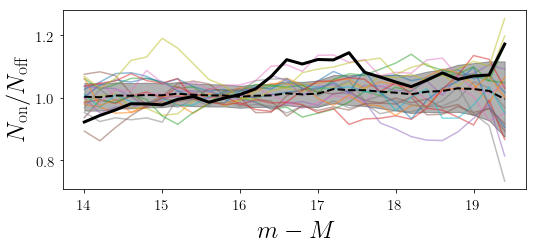

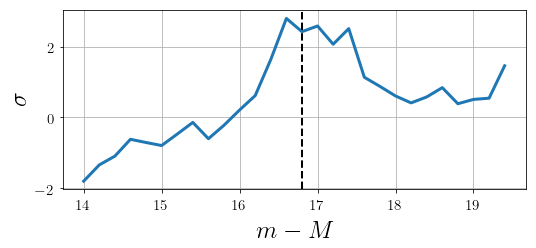

In [511]:
offs_outer = np.mean([offs1_outer, offs2_outer], axis=0)
print(offs_outer.size)
ratios2 = ons_outer / offs_outer

plt.figure(figsize=(8,4))
for i in range(ratios2.shape[0]):
    if dx_array[i] == 0:
        plt.plot(modulus, ratios2[i], alpha=1.0, c='k', lw=3, zorder=100)
    else:
        plt.plot(modulus, ratios2[i], alpha=0.5)
        
        

mu_r, sig_r = [], []
dx_idx_2 = dx_array != 0
for i, mu in enumerate(modulus):
    mui, sigi = normal_r_mu_sig(np.mean(ons_outer[dx_idx_2,i]), np.mean(offs_outer[dx_idx_2,i]))
    mu_r.append(mui)
    sig_r.append(sigi)
mu_r = np.asarray(mu_r)
sig_r = np.asarray(sig_r)

plt.plot(modulus, mu_r, c='k', lw=2, ls='--')
plt.fill_between(modulus, mu_r-sig_r, mu_r+sig_r, color='k', alpha=0.3)
# plt.plot(modulus, mu_poisson, c='k', lw=2, ls='--')
plt.xlabel(r'$m-M$')
plt.ylabel(r'$N_{\rm on} / N_{\rm off}$')
plt.show()

dx_idx = np.argmin(np.abs(dx_array))
sig_off = (ratios2[dx_idx] - mu_r)/sig_r


plt.figure(figsize=(8,4))
plt.plot(modulus, sig_off, lw=3)
plt.axvline(16.8, lw=2, ls='--', c='k')
plt.xlabel(r'$m-M$')
plt.ylabel(r'$\sigma$')
plt.grid()

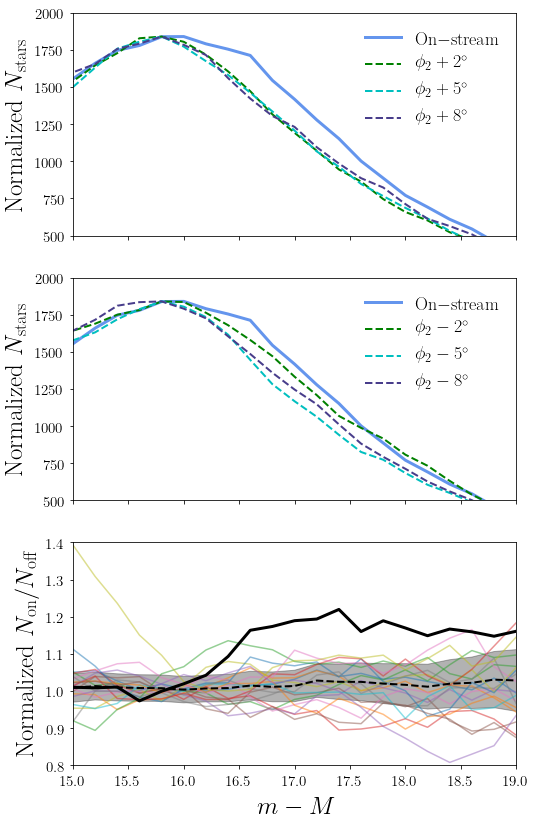

In [512]:
plot_density.plot_pretty(fontsize=25)

hpxmap = hpxcube_south[:,20]
ra, dec = hp.pix2ang(hp.npix2nside(len(hpxmap)), np.arange(len(hpxmap)), lonlat=True)
phi1, phi2 = rotation_matrix.phi12_rotmat(ra, dec, Rnew)

width_on = 0.5
width_off = 0.5

# separation = 5.0

colors = ['cornflowerblue', 'g', 'c', 'darkslateblue']


on_sel = (phi1 > phi1_min) & (phi1 < phi1_max) & (np.abs(interp_track(phi1) - phi2) < (width_on/2.))
# on_sel = (np.abs(phi1) < 5) & (np.abs(interp_track(phi1) - phi2) < (width_on/2.))
sep = angsep(ra, dec, ra_pal13, dec_pal13)
glob_sel = sep < 0.4
on_sel &= ~glob_sel

ons = []
for i, mu in enumerate(modulus):
    hpxmap = hpxcube_south[:,i]
    n_on = np.sum(hpxmap[on_sel])
    ons.append(n_on)

ons = np.asarray(ons)

#########################
# plt.figure(figsize=(12,6))

fig, ax = plt.subplots(3,1, figsize=(8, 12), sharex=True)

ax[0].plot(modulus, ons, lw=3, c=colors[0], label=r'$\mathrm{On\mathrm{-}stream}$')
# ax[0].axvline(modulus[np.argmax(ons)], c='C0')

ax[0].set_xlim(15,19)
# ax[0].set_ylim(500,1400)
ax[0].set_ylim(500,2000)

ax[1].plot(modulus, ons, lw=3, c=colors[0], label=r'$\mathrm{On\mathrm{-}stream}$')
# ax[1].axvline(modulus[np.argmax(ons)], c='C0')

# ax[1].set_xlim(15,18)
# ax[1].set_ylim(500,1400)
ax[1].set_ylim(500,2000)



for j, separation in enumerate([2.0, 5.0, 8.0]):
    off_min = separation - width_off / 2.
    off_max = separation + width_off / 2.

#     off_sel = (np.abs(phi1) < 5) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
    off_sel = (phi1 > phi1_min) & (phi1 < phi1_max) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)


    off_sel1 = off_sel & (phi2 < 0)
    off_sel2 = off_sel & (phi2 > 0)

    area_corr1 = on_sel.sum() / off_sel1.sum()
    area_corr2 = on_sel.sum() / off_sel2.sum()
    # print(area_corr1, area_corr2)

    offs1 = []
    offs2 = []

    for i, mu in enumerate(modulus):
        hpxmap = hpxcube_south[:,i]

        n_off1 = np.sum(hpxmap[off_sel1])*area_corr1
        n_off2 = np.sum(hpxmap[off_sel2])*area_corr2
        offs1.append(n_off1)
        offs2.append(n_off2)

    offs1 = np.asarray(offs1)
    offs2 = np.asarray(offs2)

    norm1 = ons.max()/offs1.max()
    norm2 = ons.max()/offs2.max()
#     norm1 = 1
#     norm2 = 1

    ax[0].plot(modulus, offs1*norm1, c=colors[j+1], ls='--', lw=2, label=r'$\phi_{\rm 2} + %i^{\circ}$' %separation)
    ax[1].plot(modulus, offs2*norm2, c=colors[j+1], ls='--', lw=2, label=r'$\phi_{\rm 2} - %i^{\circ}$' %separation)
#     ax[0].axvline(modulus[np.argmax(offs1)], c=colors[j+1], ls='--')
#     ax[1].axvline(modulus[np.argmax(offs2)], c=colors[j+1], ls='--')
    
#     plt.figure(figsize=(8,4))
#     plt.plot(modulus, ons, label=r'$\mathrm{On-stream}$')
#     plt.plot(modulus, offs1*norm1, label=r'$\phi_2 > 0$')
#     plt.plot(modulus, offs2*norm2, label=r'$\phi_2 < 0$')
#     plt.axvline(modulus[np.argmax(ons)], c='C0')
#     plt.axvline(modulus[np.argmax(offs1)], c='C1')
#     plt.axvline(modulus[np.argmax(offs2)], c='C2')
#     plt.legend()
#     plt.xlim(15,18)
#     plt.ylim(500,1300)


# plt.legend()
# ax[0].legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
# ax[1].legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].legend(frameon=False, loc='upper right', fontsize=18)
ax[1].legend(frameon=False, loc='upper right', fontsize=18)

# ax[1].set_xlabel(r'$m - M$')
ax[0].set_ylabel(r'$\mathrm{Normalized}\ N_{\rm stars}$')
ax[1].set_ylabel(r'$\mathrm{Normalized}\ N_{\rm stars}$')


for i in range(ratios2.shape[0]):
    if dx_array[i] == 0:
        ax[2].plot(modulus, ratios[i], alpha=1.0, c='k', lw=3, zorder=100)
    else:
        ax[2].plot(modulus, ratios[i], alpha=0.5)

ax[2].plot(modulus, mu_r, c='k', lw=2, ls='--')
ax[2].fill_between(modulus, mu_r-sig_r, mu_r+sig_r, color='k', alpha=0.3)
ax[2].set_ylim(0.8, 1.4)
ax[2].set_xlabel(r'$m-M$')
ax[2].set_ylabel(r'$\mathrm{Normalized}\ N_{\rm on} / N_{\rm off}$')


plt.savefig('../plots/Pal13/nstars_mod_norm_ratio.png')
plt.savefig('../plots/Pal13/nstars_mod_norm_ratio.pdf', rasterize=True)
plt.show()

In [318]:
mu_poisson = np.mean(differences, axis=0)
mu_poisson.shape
np.max(mu_poisson)
modulus[np.isnan(mu_poisson)]

array([], dtype=float64)

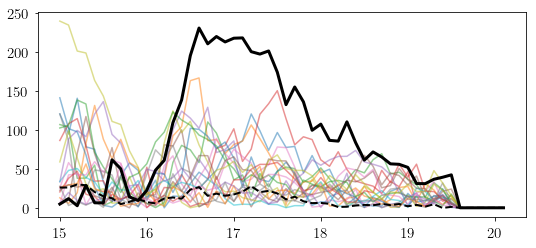

In [322]:
plt.figure(figsize=(8,4))
for i in range(differences.shape[0]):
    if dx_array[i] == 0:
        plt.plot(modulus, differences[i], alpha=1.0, c='k', lw=3, zorder=100)
    else:
        plt.plot(modulus, differences[i], alpha=0.5)
plt.plot(modulus, mu_poisson, c='k', lw=2, ls='--')
plt.show()

In [306]:
from scipy.stats import poisson

n = 100
poisson_vals = np.empty((n, len(modulus)))
for i in range(len(modulus)):
    if np.isnan(mu_poisson[i]):
        poisson_vals[:,i] = [None]*n
        continue
    sample = poisson.rvs(mu=mu_poisson[i], size=n)
    poisson_vals[:, i] = sample


In [307]:
poisson_vals.shape

(100, 52)

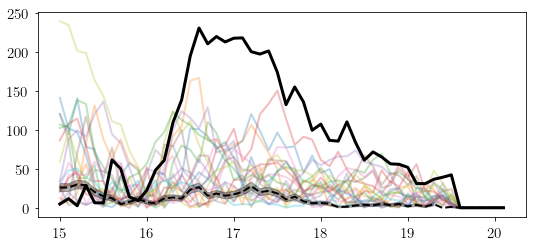

In [337]:
plt.figure(figsize=(8,4))

for i in range(differences.shape[0]):
    if dx_array[i] == 0:
        plt.plot(modulus, differences[i], alpha=1.0, c='k', lw=3, zorder=100)
    else:
        plt.plot(modulus, differences[i], alpha=0.3, lw=2)
        
plt.fill_between(modulus, y1=mu_poisson-np.sqrt(mu_poisson), y2=mu_poisson+np.sqrt(mu_poisson), color='k', alpha=0.3, zorder=100)
plt.plot(modulus, mu_poisson, c='k', lw=2, ls='--', zorder=100)

plt.show()

In [341]:
ratios.shape, modulus.shape

((20, 52), (52,))

1.1656200941915227
0


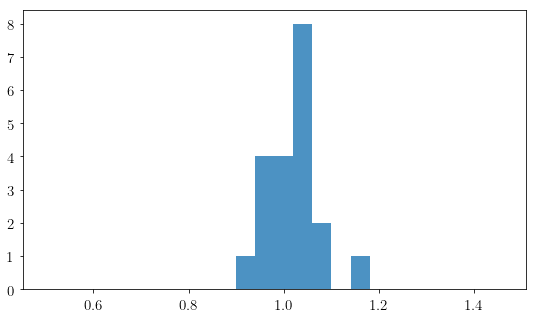

In [366]:
mod_idx = np.argmin(np.abs(modulus - 16.8)) # Pal 13 dm
dx_idx = np.argmin(np.abs(dx_array-0))
print(ratios[dx_idx, mod_idx])
print(dx_array[np.argmax(ratios[:,mod_idx])])

plt.figure(figsize=(8,5))
plt.hist(ratios[:,mod_idx], bins=np.arange(0.5,1.5,0.04), alpha=0.8)
# plt.hist(ratios[dx_idx, mod_idx], bins=np.arange(0.5,1.5,0.04), alpha=0.8)

plt.show()

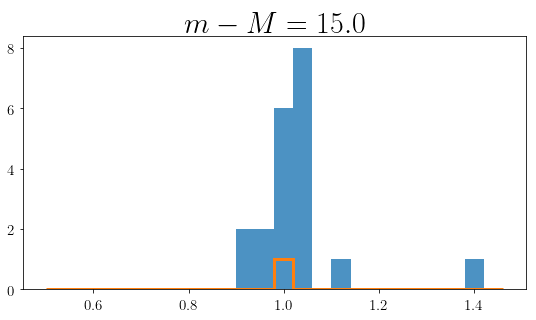

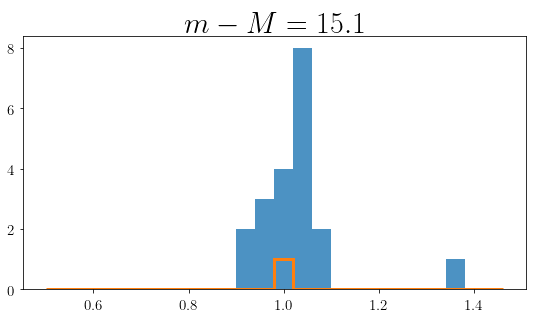

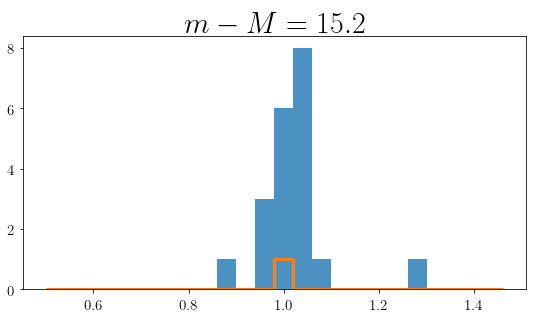

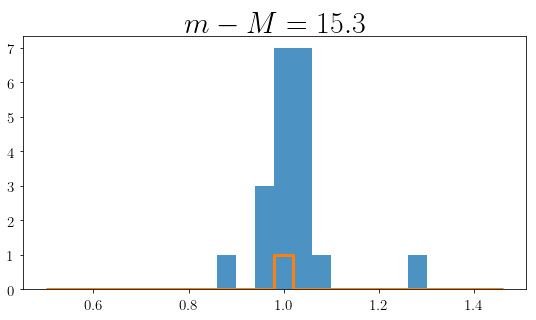

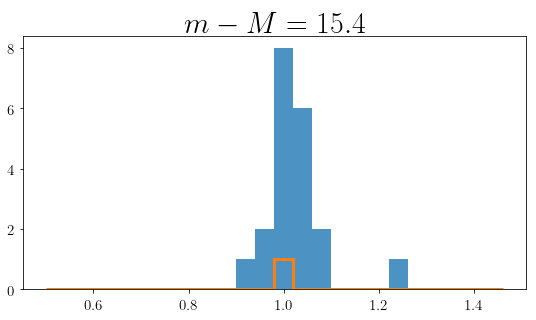

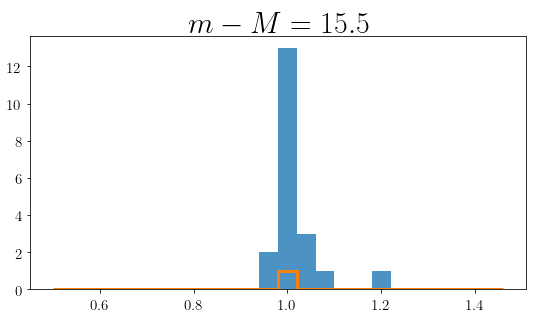

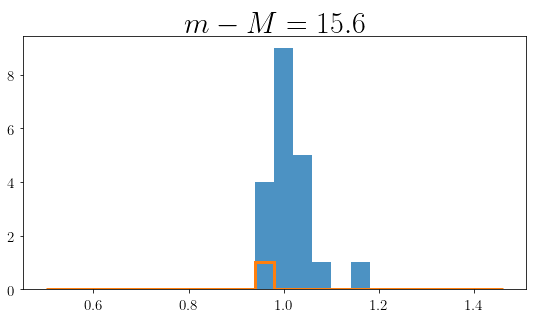

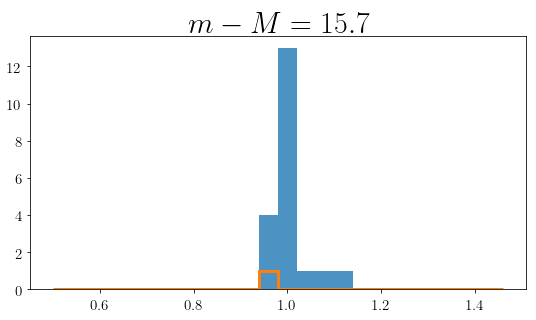

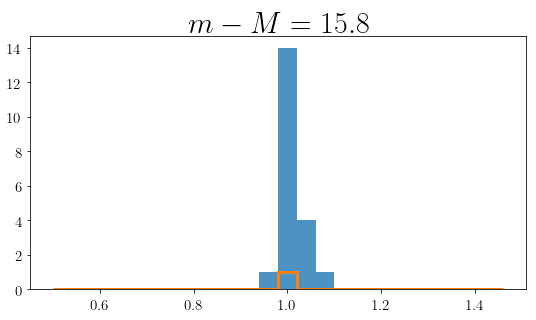

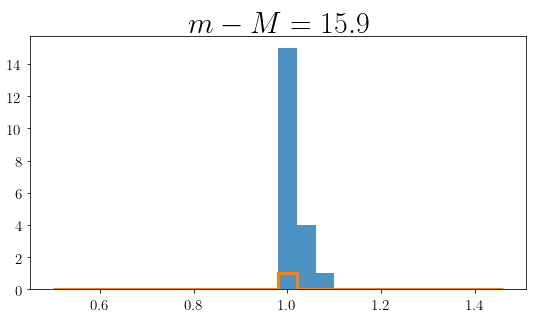

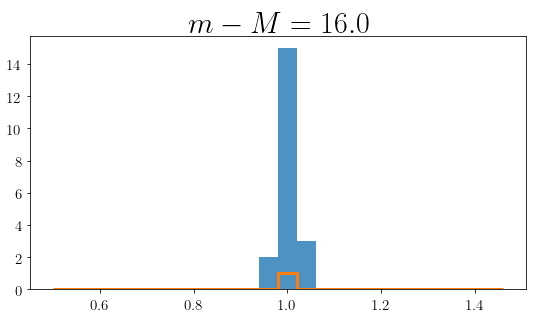

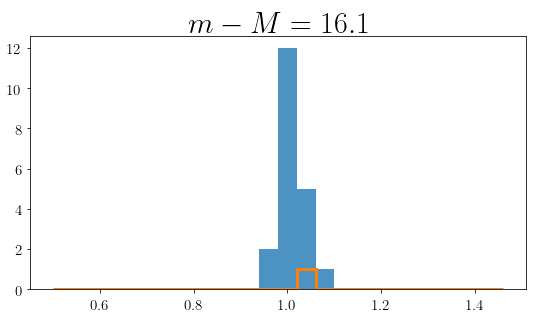

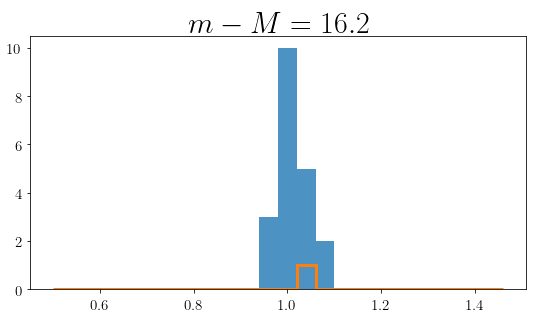

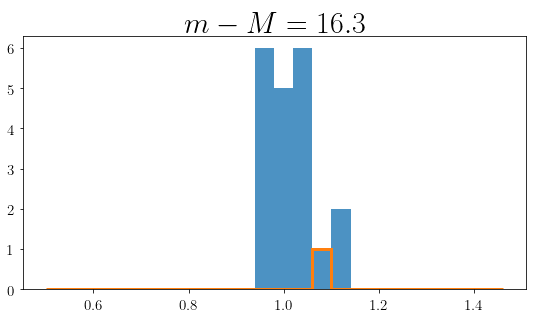

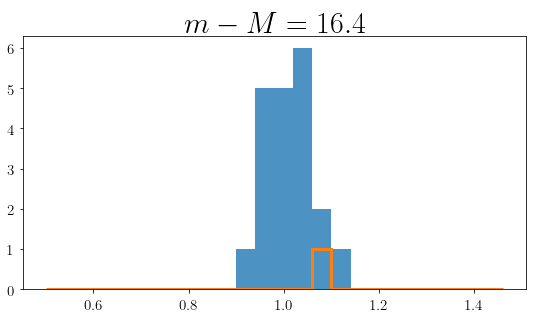

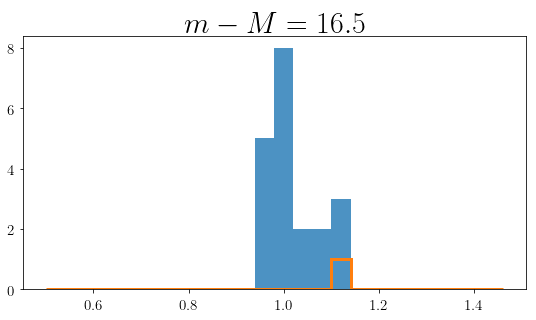

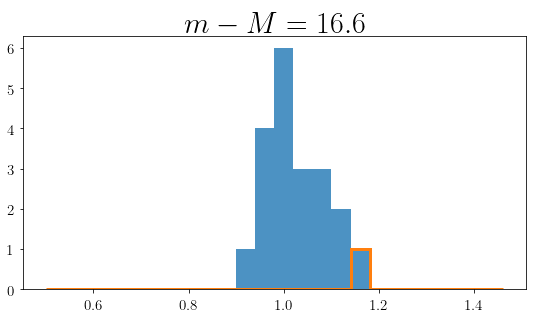

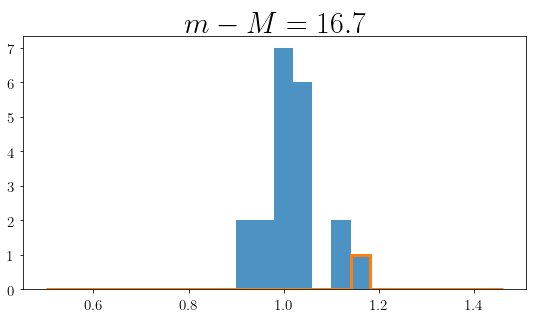

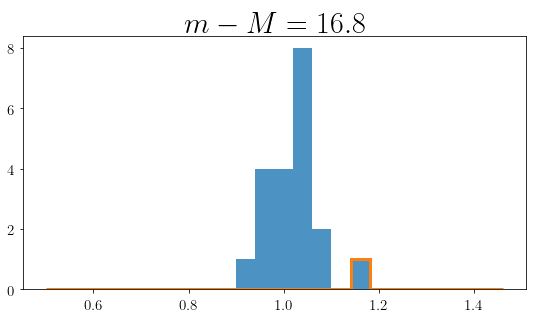

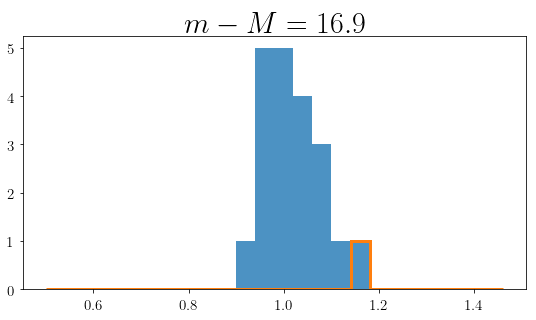

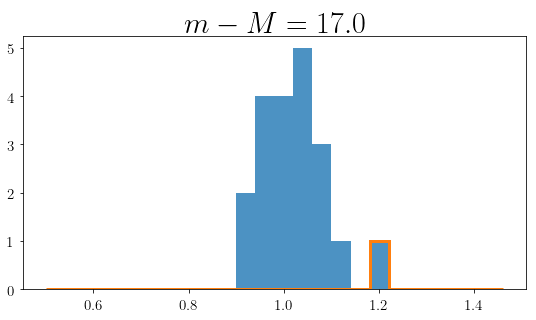

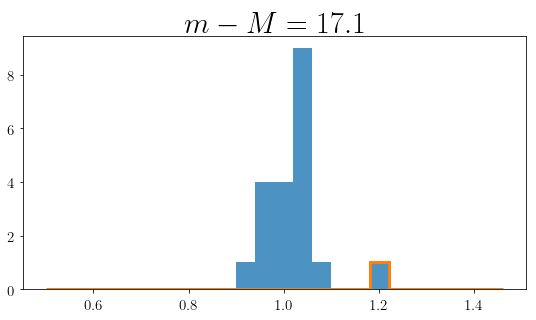

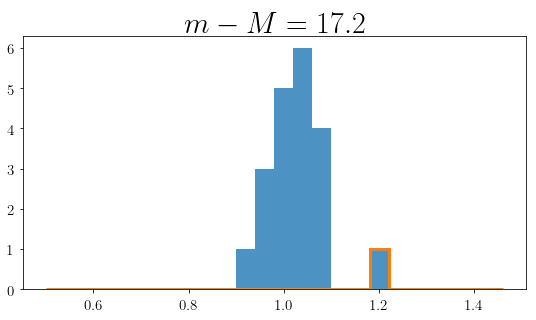

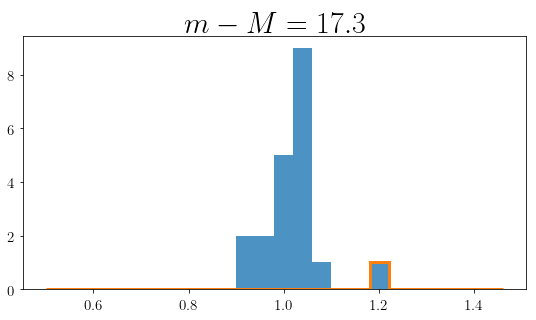

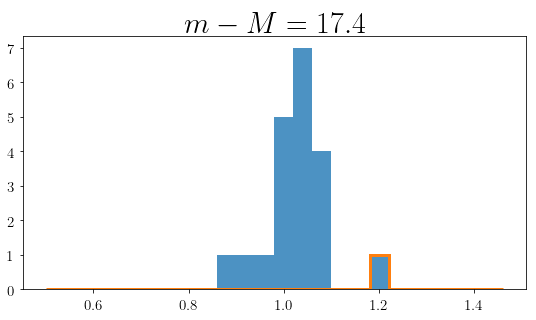

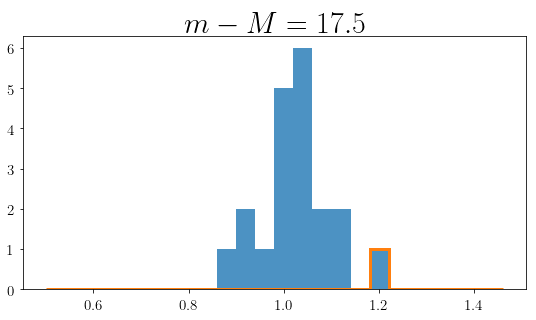

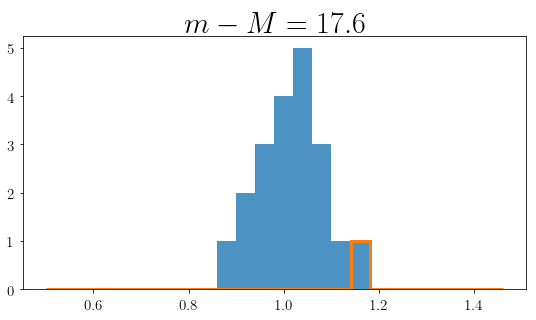

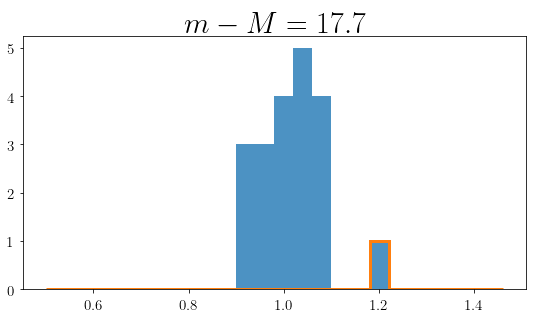

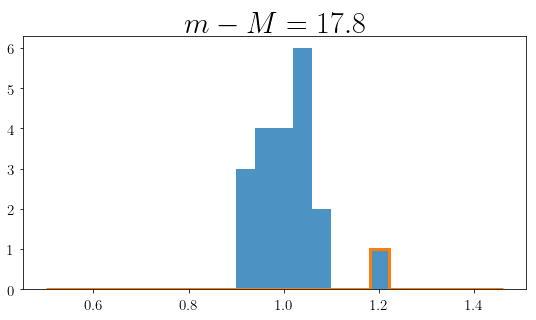

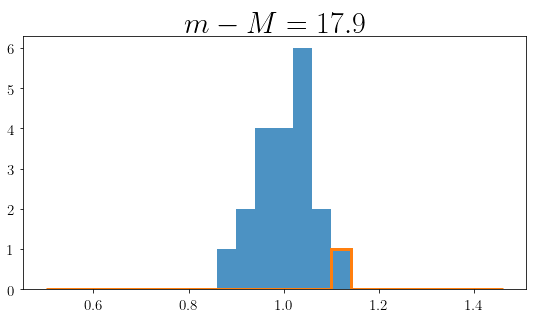

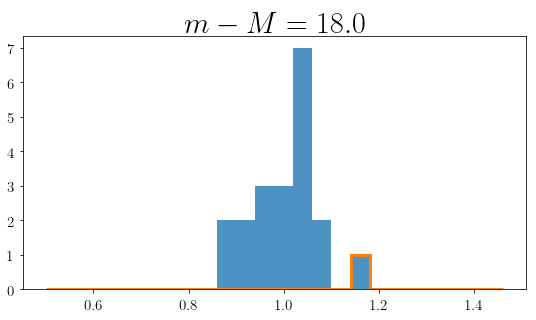

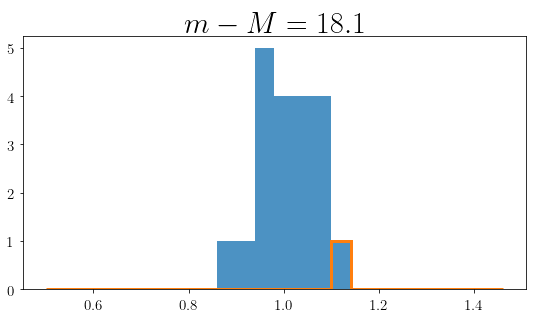

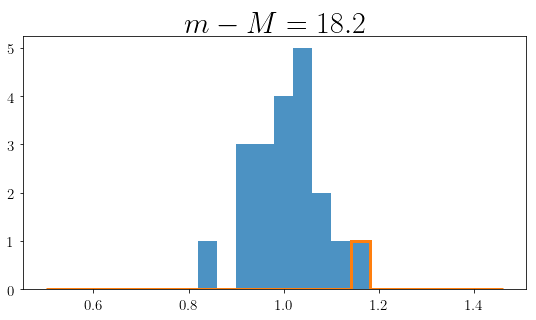

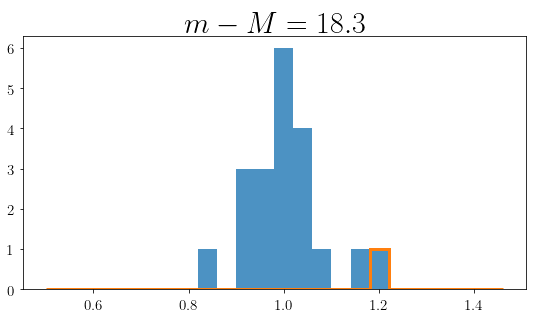

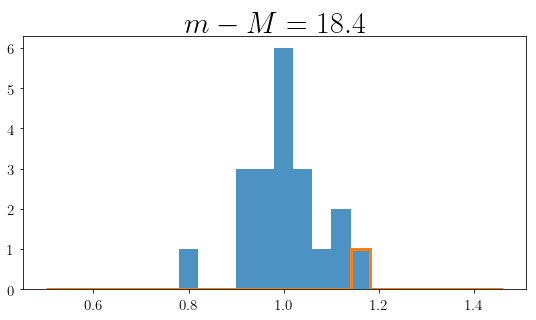

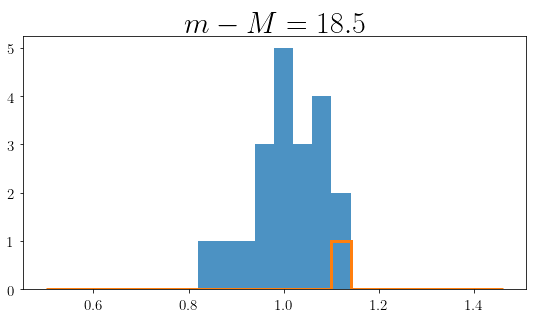

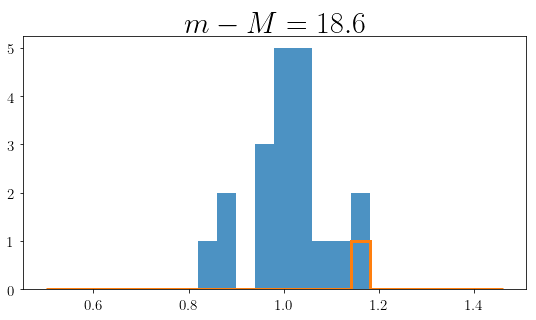

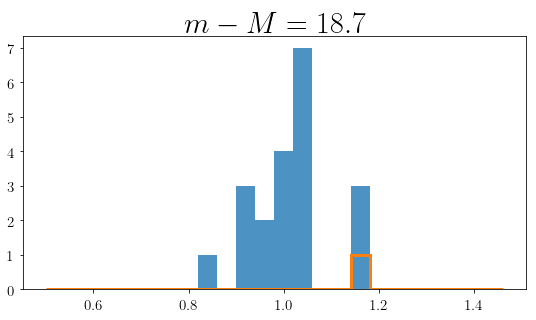

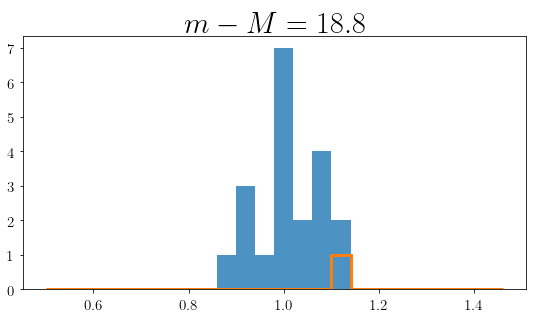

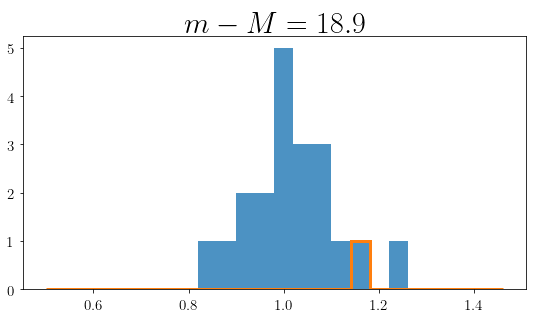

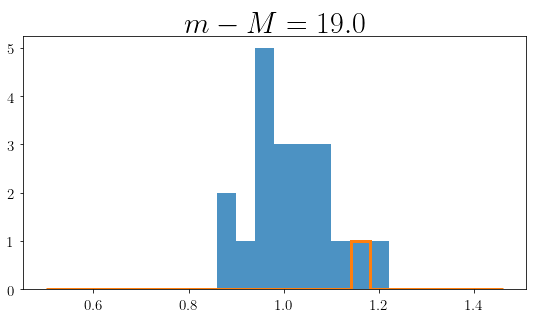

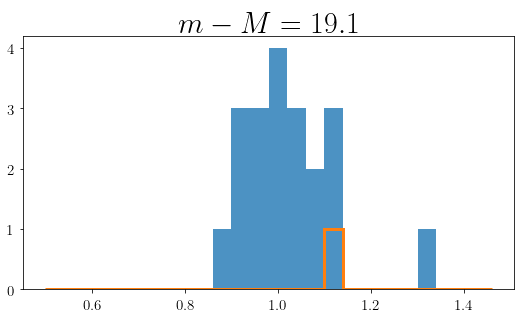

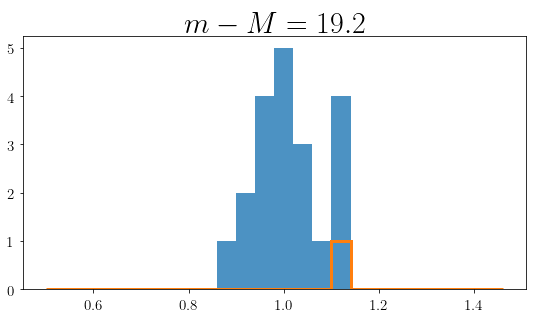

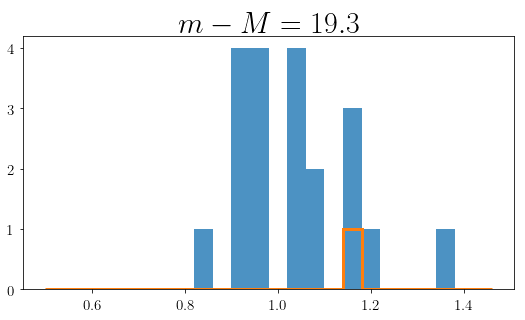

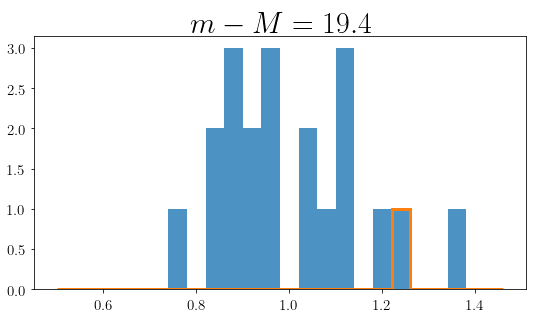

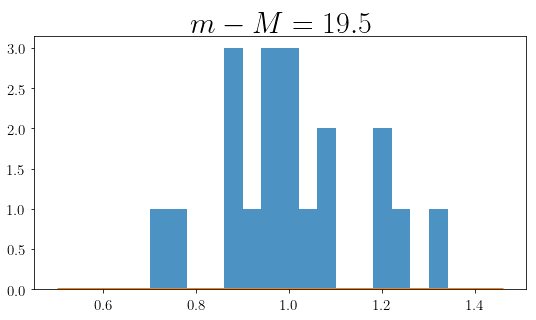

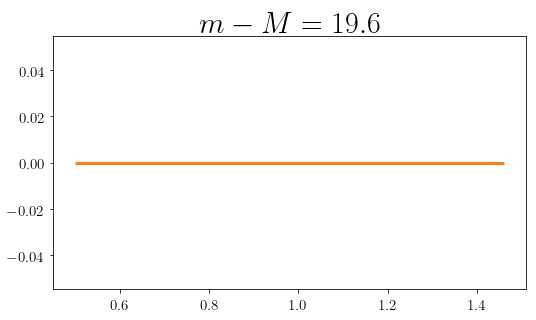

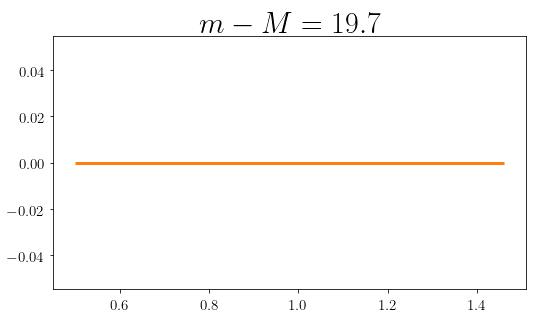

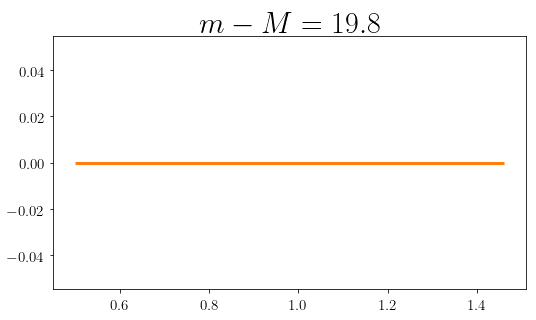

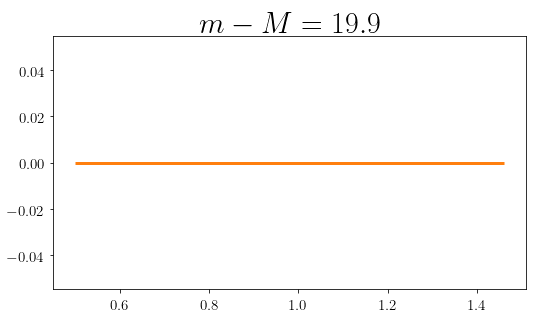

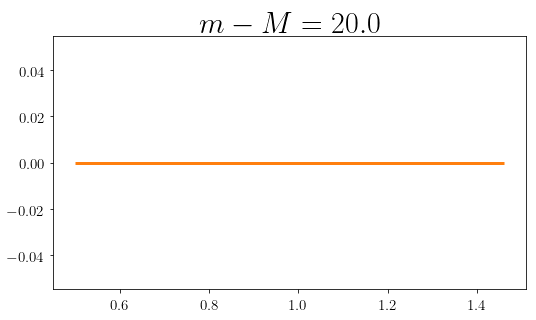

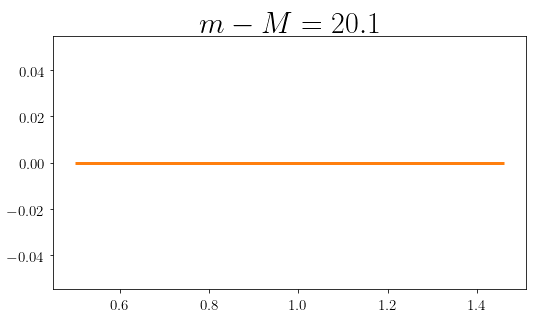

In [370]:
for mu in modulus:

    mod_idx = np.argmin(np.abs(modulus - mu))
    dx_idx = np.argmin(np.abs(dx_array-0))

    plt.figure(figsize=(8,5))
    plt.hist(ratios[:,mod_idx], bins=np.arange(0.5,1.5,0.04), alpha=0.8)
    plt.hist(ratios[dx_idx, mod_idx], bins=np.arange(0.5,1.5,0.04), histtype='step', alpha=1.0, color='C1', lw=3)
    plt.title(r'$m-M = %.1f$' %mu)
plt.show()

In [372]:
differences.min(), differences.max()

(0.0, 239.29555895865246)

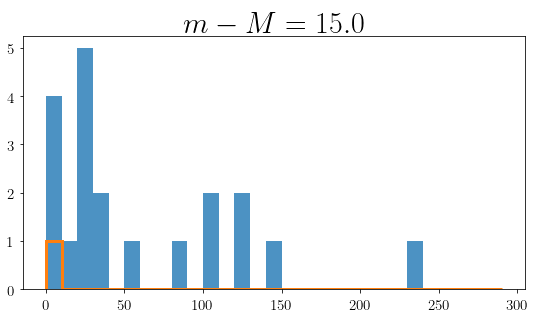

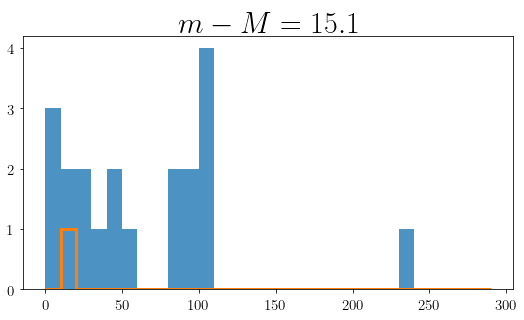

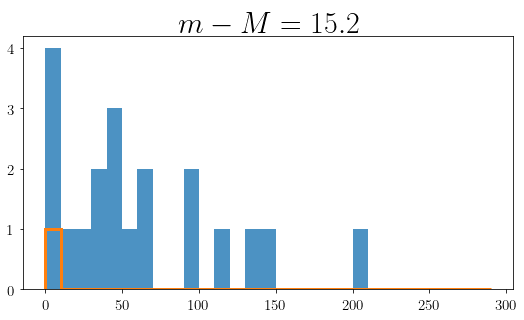

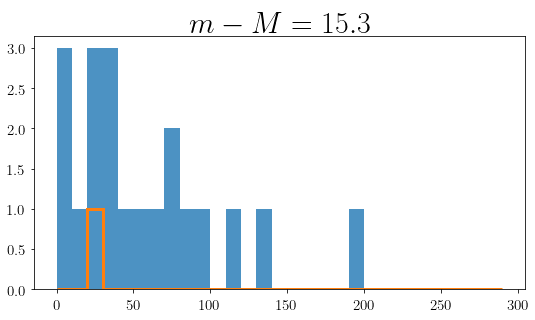

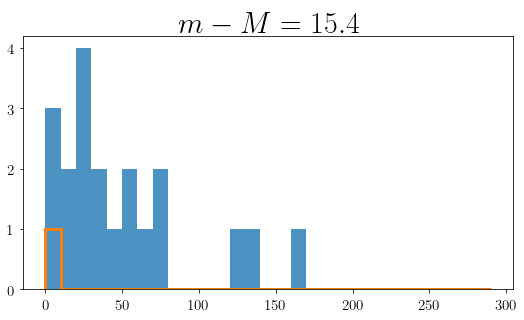

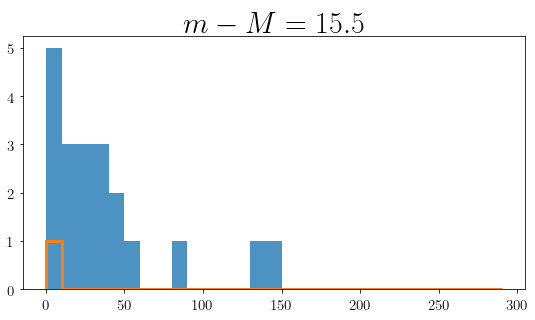

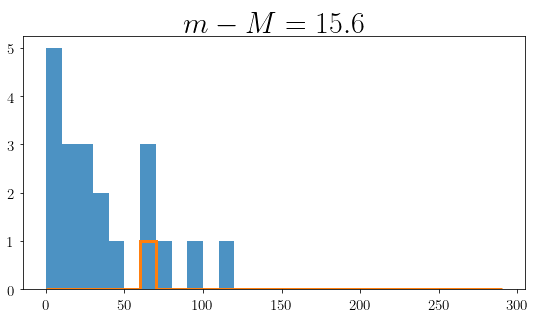

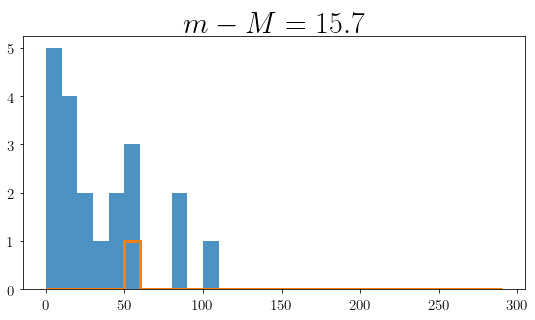

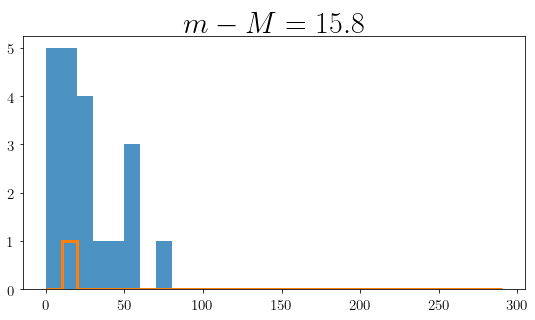

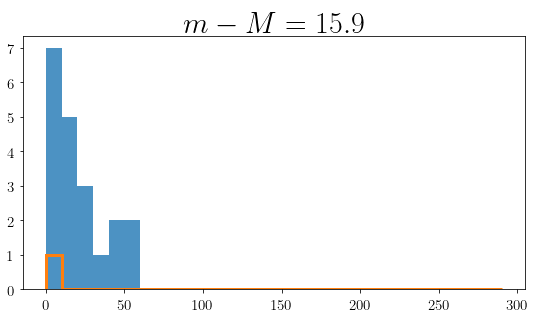

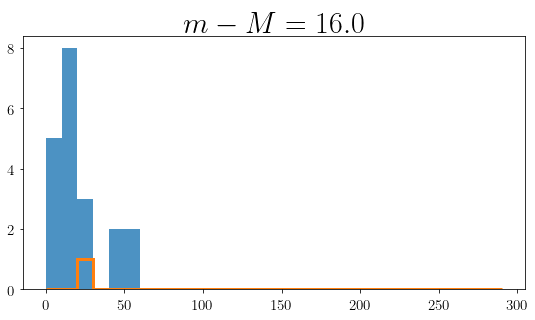

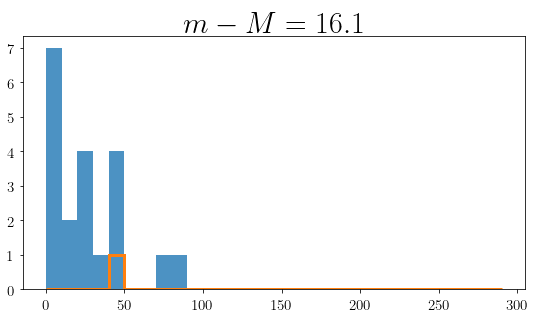

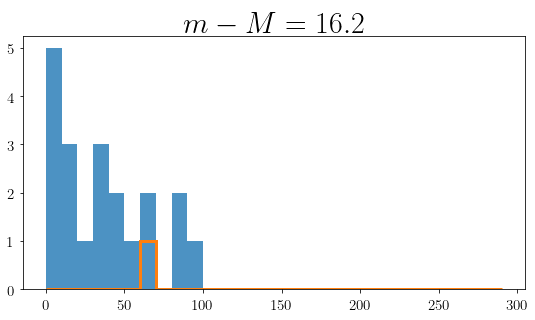

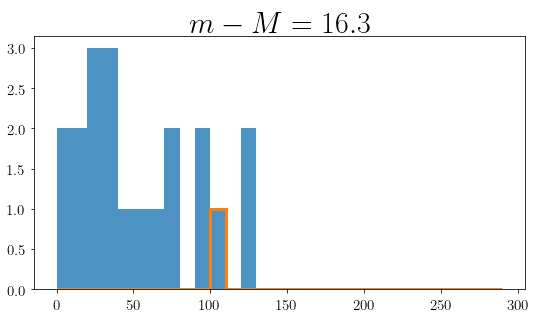

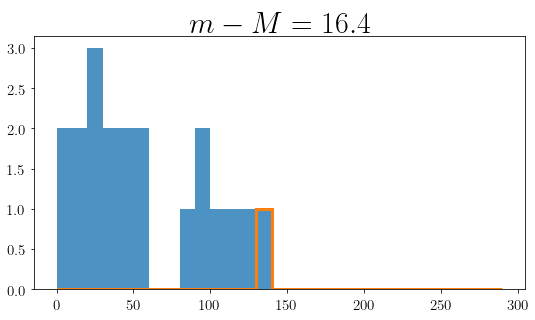

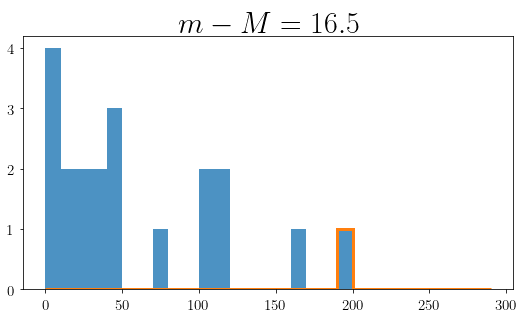

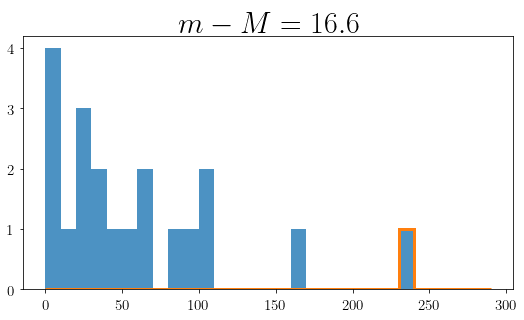

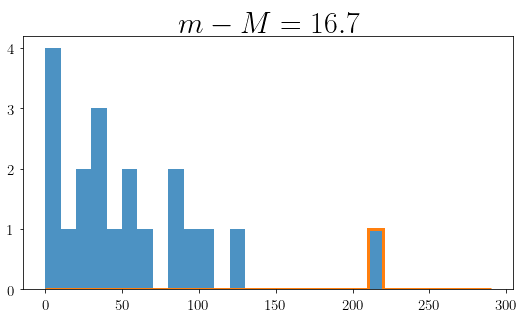

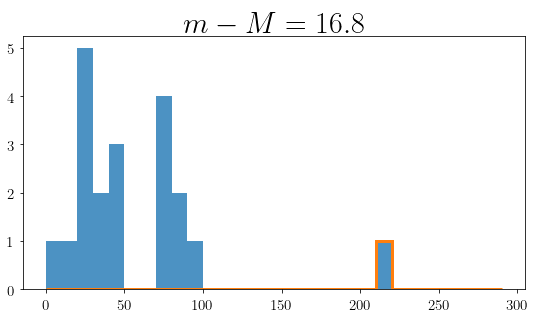

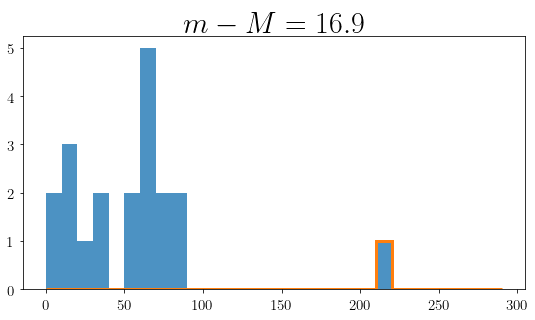

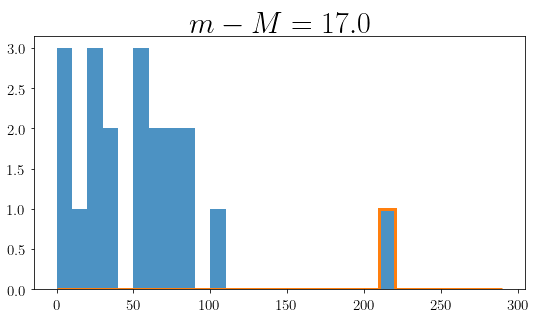

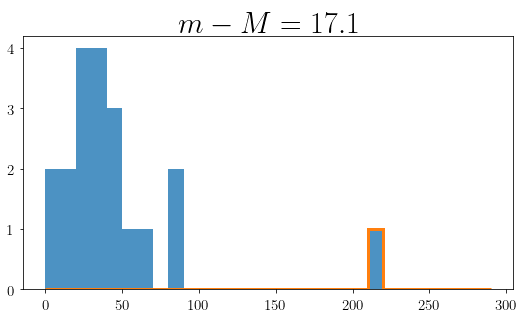

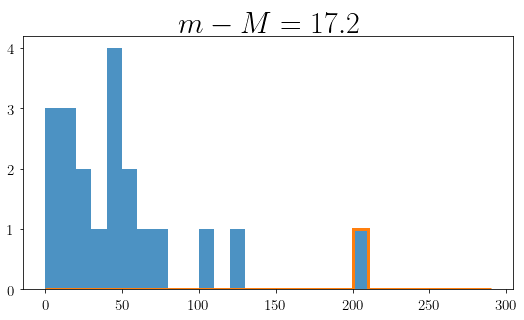

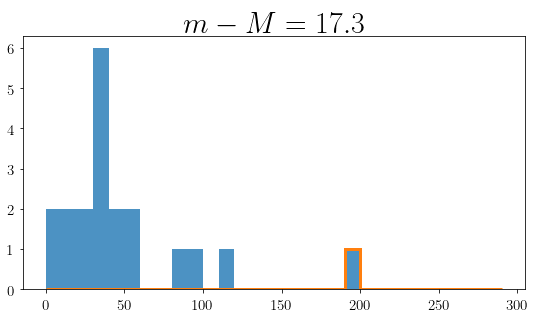

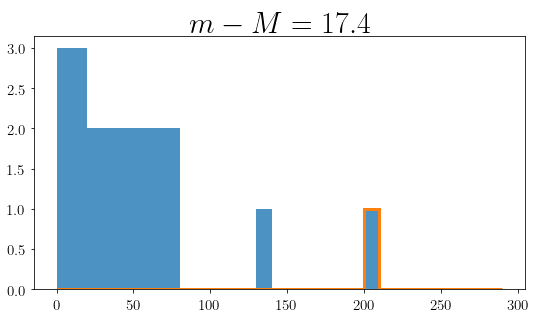

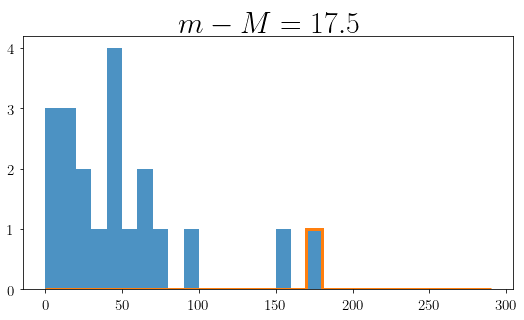

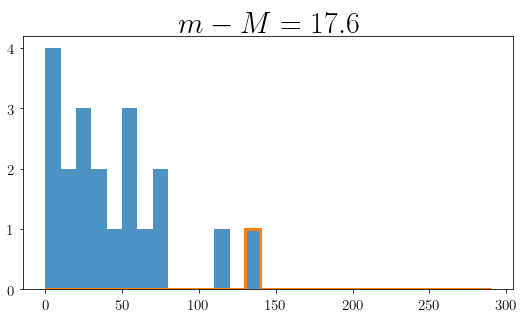

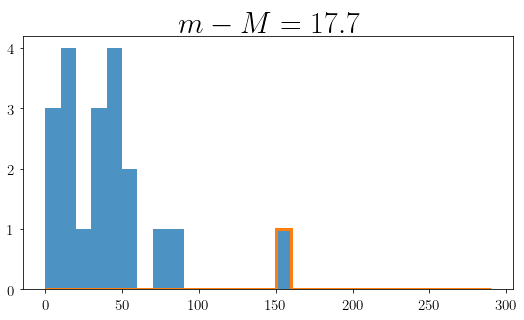

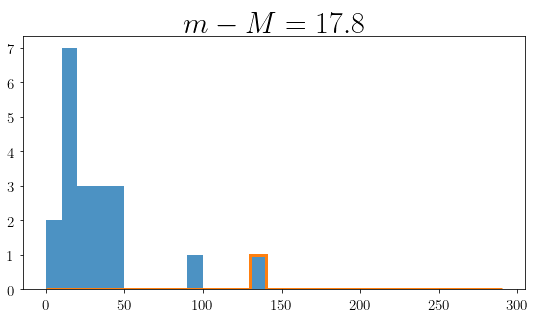

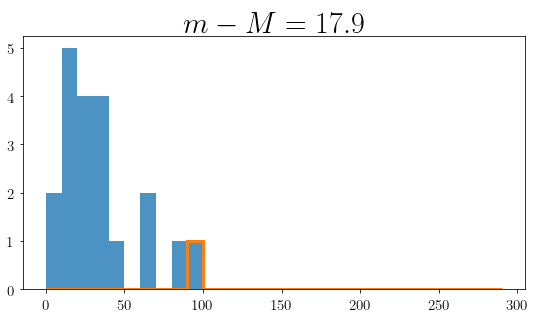

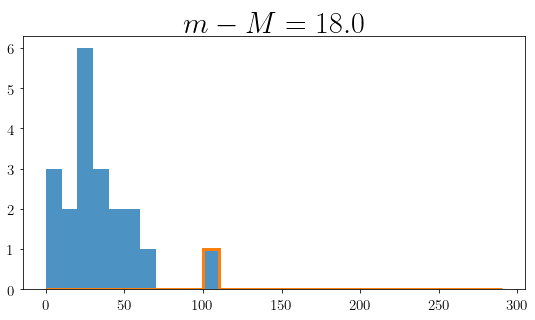

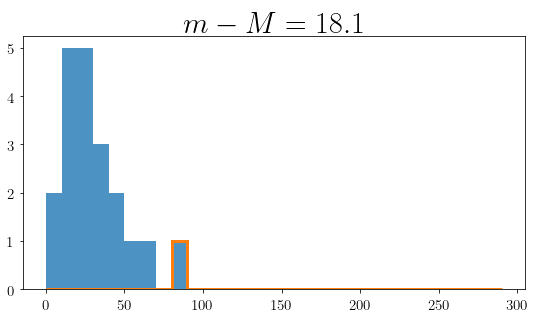

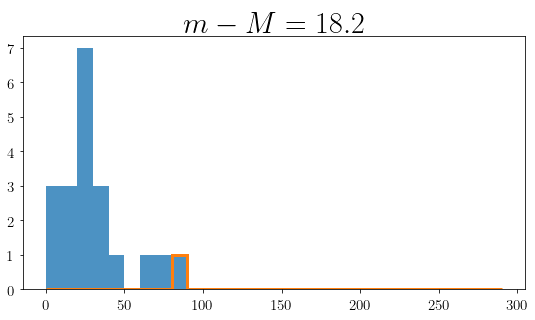

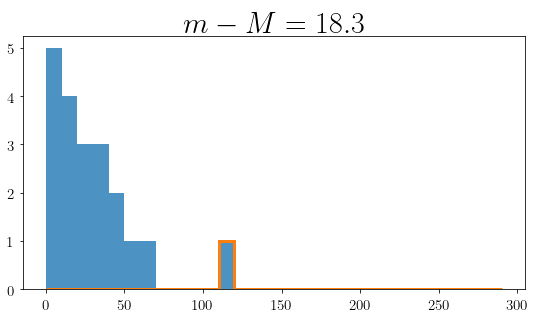

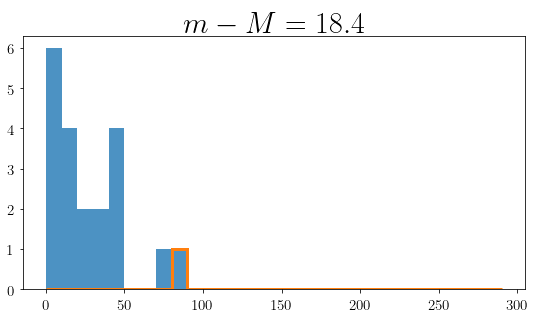

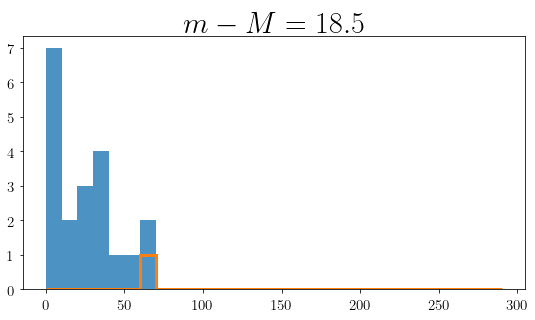

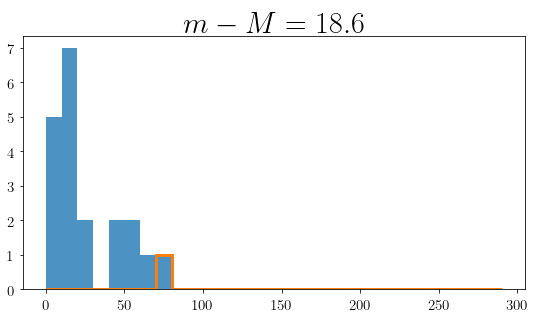

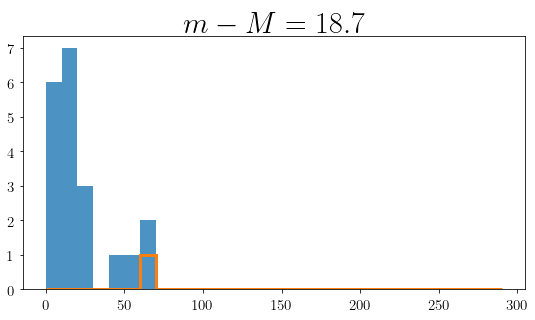

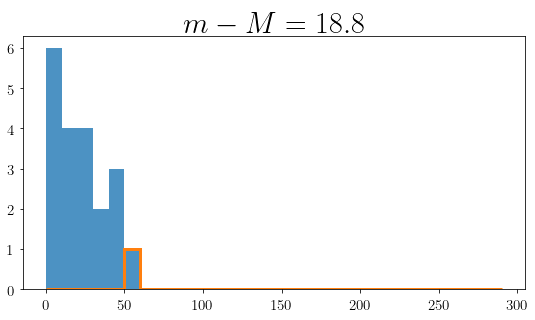

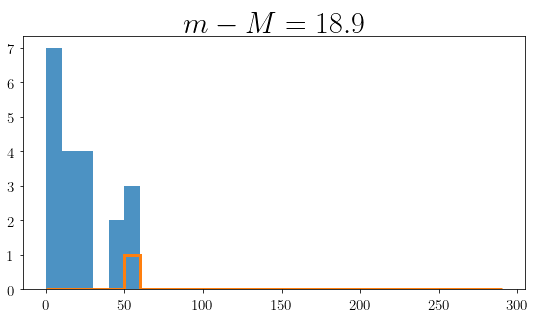

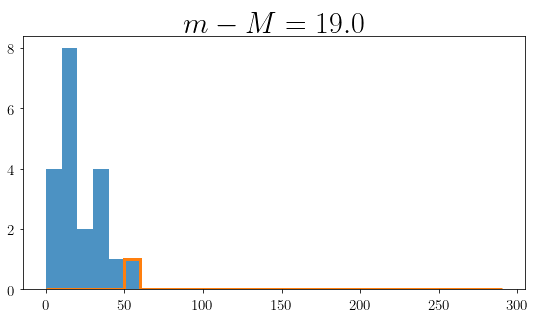

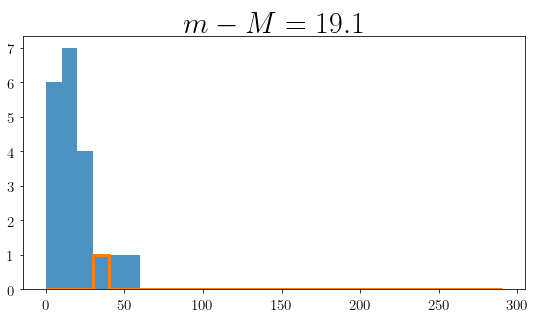

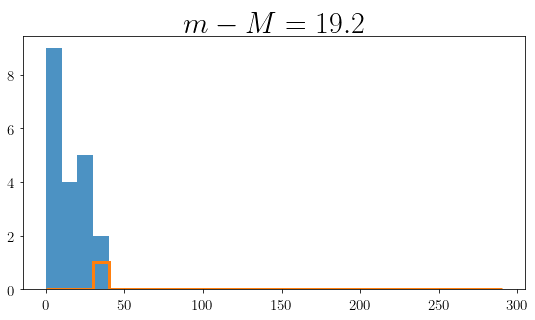

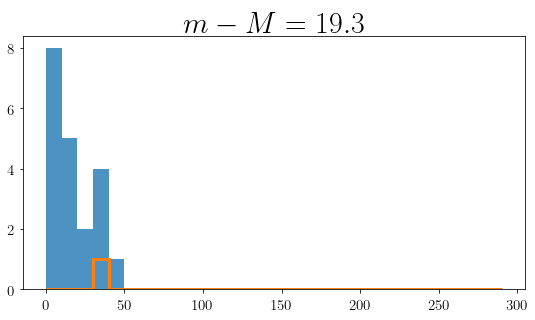

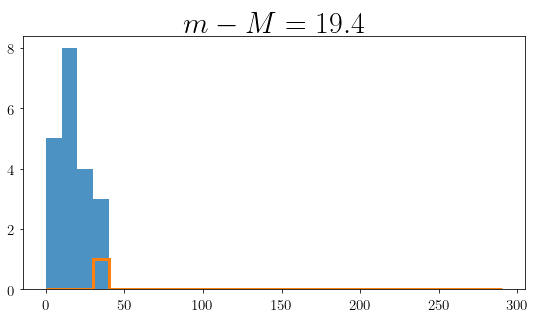

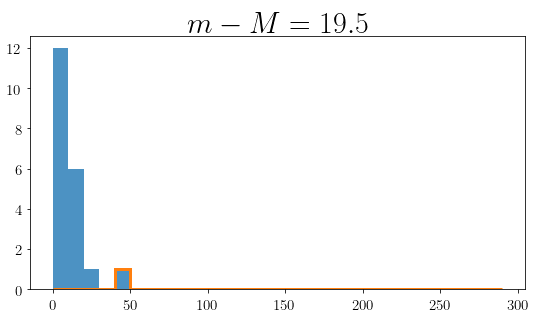

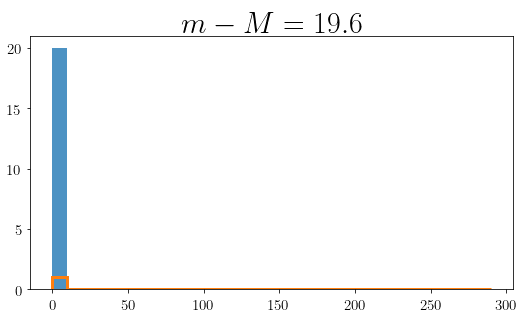

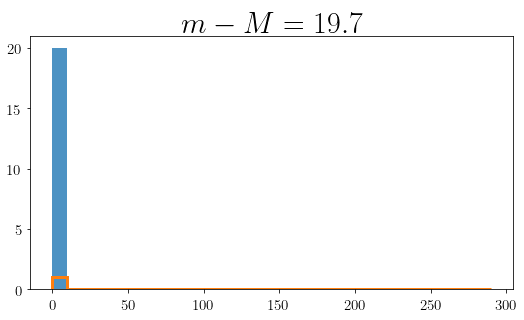

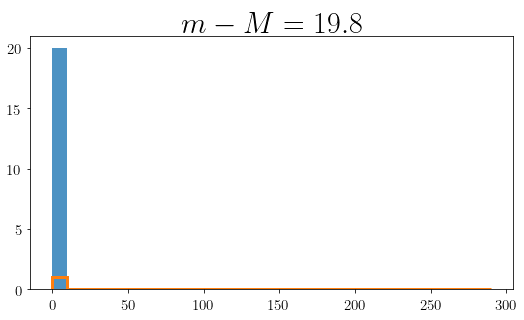

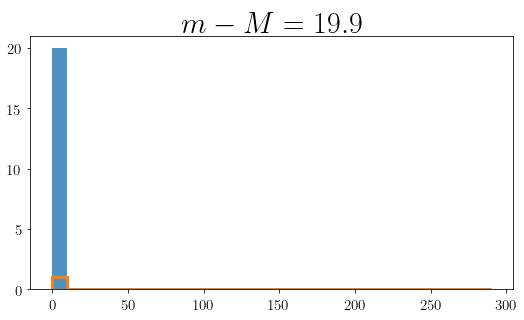

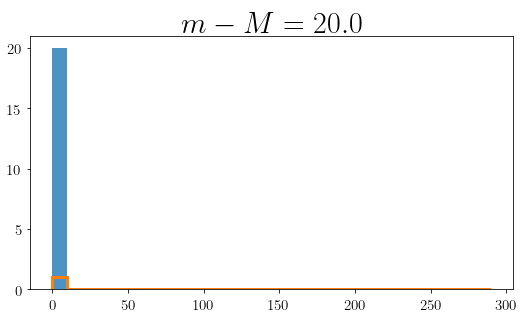

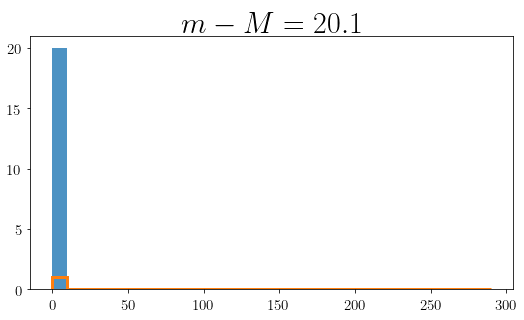

In [374]:
for mu in modulus:

    mod_idx = np.argmin(np.abs(modulus - mu))
    dx_idx = np.argmin(np.abs(dx_array-0))

    plt.figure(figsize=(8,5))
    plt.hist(differences[:,mod_idx], bins=np.arange(0,300,10), alpha=0.8)
    plt.hist(differences[dx_idx, mod_idx], bins=np.arange(0,300,10), histtype='step', alpha=1.0, color='C1', lw=3)
    
    plt.axvline(mu_poisson[mod_idx])
    
    plt.title(r'$m-M = %.1f$' %mu)

plt.show()

# Movie

In [27]:
for mu in np.arange(15, 20.1, 0.1):
    data_south = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=False, globs_dwarfs=True)
    data_south_unm = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
    bkg1 = plot_density_healpy.fit_bkg(data_south, proj1, sigma=0.1)
    bkg1.mask = data_south_unm.mask

    ax1, im1 = plot_density_healpy.plot_proj(proj1, data_south_unm-bkg1, vmin=-1.5, vmax=1.5)
    ax1.set_title(r'$m - M = %.1f$' %mu)
    xmin, xmax, ymin, ymax = -0.4, 0.6, -0.1, 0.35
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)
    plt.savefig('../plots/Pal13/mov7/%.1f.png' %mu)
    plt.close('all')

# Zoom

16.8
Loading /Users/nora/projects/stream_search/data/DECaLS_iso_hpxcube_z0.0010_a11.0_gmax23.fits.gz...
Reading /Users/nora/projects/stream_search/data/DECaLS_iso_hpxcube_z0.0010_a11.0_gmax23.fits.gz...
Reading ../data/DECaLS_nside128.fits.gz...
158.98470572695592 120.60701163554218 164.1832968299641


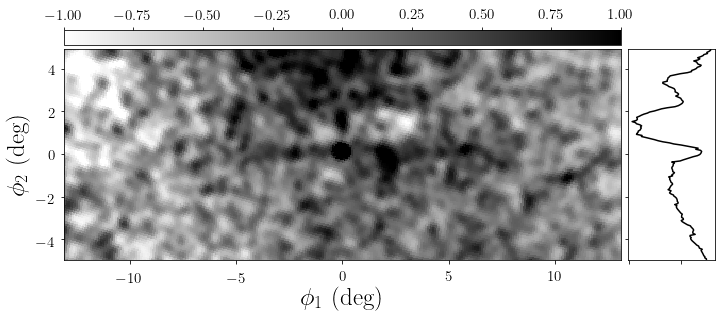

In [23]:
# import elysian
# import astropy.coordinates as coords
# import astropy.units as u


hpxcube = hpxcube_south
fracdet = fracdet_south
stream='Pal 13'
ends=ends
mu=16.8
width=0.3
sigma=0.2
delta=0.2
vmin=-1.0
vmax=1.0 # 1.5
filename=None

# for mu in np.arange(15, 19.05, 0.1):
for mu in [16.8]:
    print(mu)
    filename = '../plots/Pal13/Paper/Pal13_zoom.png'

    length = angsep(ends[0][0], ends[0][1], ends[1][0], ends[1][1])

    hpxcube_south, fracdet_south, modulus = load_data.load_data('DECaLS', 0.001, 11., 23.0)
    data_south = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=False, globs_dwarfs=True)
    data_south_unm = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
    bkg1 = plot_density_healpy.fit_bkg(data_south, proj1, sigma=0.1)
    bkg1.mask = data_south_unm.mask

    data = np.ma.copy(data_south_unm)
    bkg = np.ma.copy(bkg1)

    nside = hp.get_nside(data)

    height = max(1.2 * 6 * width, 5)
    length = max(1.2 * length, 1.5 * height)

    streampix = streamlib.get_streampix(data=data, stream=None, ends=ends)

    delta = 0.05
    aspect = float(height) / length
    b = np.arange(-height, height, delta)
    l = np.arange(-length, length, delta)
    ll, bb = np.meshgrid((l[1:] + l[:-1]) / 2., (b[1:] + b[:-1]) / 2.)

    # phi, theta, psi = results.euler_angles(
    #     ends[0][0], ends[0][1], ends[1][0], ends[1][1])
    phi, theta, psi = 158.43563675417076, 122.99325234497584, 164.83377697716446
#     phi, theta, psi = -21.564363245829284, 57.00674765502414, 15.166223022835581
    
    reload(elysian)
    stream_cls = elysian.euler_factory(stream, phi, theta, psi, ends=ends, flip=True)

    rot = stream_cls(Lambda=ll.flatten() * u.deg, Beta=bb.flatten() * u.deg)
    icrs = rot.transform_to(coords.ICRS)
    # coord_ends = coords.ICRS(*(stream_cls.ends.T * u.deg)).transform_to(stream_cls)
    # coord_ends.Lambda.wrap_angle = 180 * u.deg

    # Masking for hist
    pix = hp.ang2pix(nside, icrs.ra.deg, icrs.dec.deg, lonlat=True)
    value = (data - bkg)[pix].reshape(ll.shape)

    from ugali.utils import healpix
#     glob_pix = healpix.ang2disc(nside, ra_pal13, dec_pal13, 0.4)
#     # data[glob_pix] = np.ma.masked
#     data[glob_pix] = np.ma.nomask
#     # mask = (data.mask)[pix].reshape(ll.shape)

#     ra_blob, dec_blob = -11.935640649002254, 14.358352212823817
#     blob_pix = healpix.ang2disc(nside, ra_blob, dec_blob, 0.4)
#     # data[blob_pix] = np.ma.masked
#     data[blob_pix] = np.ma.nomask
    
#     mask_pix = healpix.ang2disc(nside, ra_pal13, dec_pal13-2, 0.4)
#     data[mask_pix]  = np.ma.nomask
#     value = (data - bkg)[pix].reshape(ll.shape)

    ra, dec = hp.pix2ang(nside, np.arange(len(data)), lonlat=True)
    mask_phi1, mask_phi2 = rotation_matrix.phi12_rotmat(ra, dec, R)
    data[np.abs(mask_phi1) > 5] = np.ma.nomask
    data[np.abs(mask_phi1) < 0.4] = np.ma.nomask
#     data[(mask_phi1 > -2.5) & (mask_phi1 < -1.5)] = np.ma.nomask
#     value = (data - bkg)[pix].reshape(ll.shape)

    
    mask = (data.mask)[pix].reshape(ll.shape)

    hist_value = (data - bkg)[pix].reshape(ll.shape)

    fig, ax = plt.subplots(1, 1, figsize=(5.0 / aspect, 5.0))
    ax.set_aspect('equal')
    divider = make_axes_locatable(ax)
    ax2 = divider.append_axes('right', size=1.2, pad=0.1, sharey=ax)
    cax = divider.append_axes('top', size='7%', pad=0.05)

    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax2.get_yticklabels(), visible=False)
    
    # Do the plotting...
    kw = dict(vmin=vmin, vmax=vmax, rasterized=True, cmap='gray_r')
    im = ax.pcolormesh(l, b, value, **kw)
    # im = ax.pcolormesh(l, b, value, **kw)

    plt.colorbar(im, cax, orientation='horizontal')
    cax.tick_params(axis='x', top=True, bottom=False,
                    labeltop=True, labelbottom=False)

    # ax.plot(ends.L.deg, ends.B.deg, ls='--', lw=1.5, color='deepskyblue')
    cts = hist_value.sum(axis=1)
    area = (~mask).sum(axis=1)
    ax2.plot(cts / area, (b[1:] + b[:-1]) / 2., color='k')

    label = r'${\rm \textbf{%s}}$' % stream.replace(' ', '\ ')
    # ax2.annotate(label, (0.95, 0.95), xycoords='axes fraction',
    #              fontsize=14, ha='right', va='top')
    # And the labeling
    ax.set_xlabel(r'$\phi_1\ {\rm (deg)}$')
    ax.set_ylabel(r'$\phi_2\ {\rm (deg)}$')
    ax.set_xlim(l.min(), l.max())
    ax.set_ylim(b.min(), b.max())
    # plt.suptitle(name)
    plt.subplots_adjust(bottom=0.05, top=0.98, right=0.98)

    if filename:
        plt.savefig(filename, bbox_inches='tight')
#         plt.close('all')

## Paper Zoom

16.8
13.0 13.047961797466591 -0.0030823447700818836
Loading /Users/nora/projects/stream_search/data/DECaLS_iso_hpxcube_z0.0001_a13.5_gmax23.fits.gz...
Reading /Users/nora/projects/stream_search/data/DECaLS_iso_hpxcube_z0.0001_a13.5_gmax23.fits.gz...
Reading ../data/DECaLS_nside128.fits.gz...
158.98470572695592 120.60701163554218 164.1832968299641


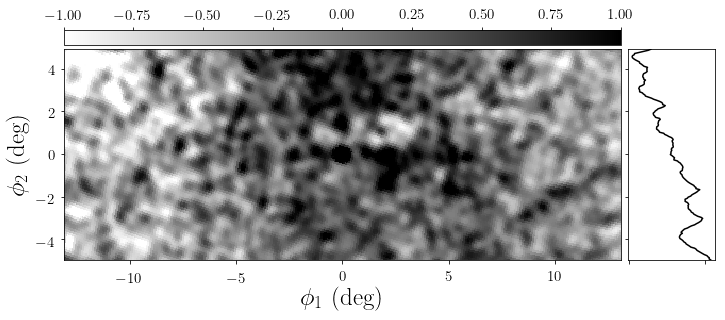

In [81]:
import elysian
import astropy.coordinates as coords
import astropy.units as u
reload(load_data)

# hpxcube = hpxcube_south
# fracdet = fracdet_south

stream='Pal 13'
ends=ends

width=0.3
sigma=0.2
delta=0.2
vmin=-1.0
vmax=1.0 # 1.5

mu = 16.8
print(mu)

filename = '../plots/Pal13/Paper/Pal13_stream_coords_%.1f.png' %mu

proj1 = plot_density_healpy.get_ortho_proj(ends=[[8,13],[18,13]], half_sky=True)

# PLOT ZOOM SPATIAL
length = angsep(ends[0][0], ends[0][1], ends[1][0], ends[1][1])

# load data
# hpxcube_south, fracdet_south, modulus = load_data.load_data('DECaLS', 0.001, 11., 23.0)
hpxcube_south, fracdet_south, modulus = load_data.load_data('DECaLS', 0.0001, 13.5, 23.0)
data_south = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=False, globs_dwarfs=True)
data_south_unm = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
bkg1 = plot_density_healpy.fit_bkg(data_south, proj1, sigma=0.1)
bkg1.mask = data_south_unm.mask
data = np.ma.copy(data_south_unm)
bkg = np.ma.copy(bkg1)

# rebin data
nside = hp.get_nside(data)
height = max(1.2 * 6 * width, 5)
length = max(1.2 * length, 1.5 * height)
streampix = streamlib.get_streampix(data=data, stream=None, ends=ends)
delta = 0.05
aspect = float(height) / length
b = np.arange(-height, height, delta)
l = np.arange(-length, length, delta)
ll, bb = np.meshgrid((l[1:] + l[:-1]) / 2., (b[1:] + b[:-1]) / 2.)

# transform data
# phi, theta, psi = results.euler_angles(ends[0][0], ends[0][1], ends[1][0], ends[1][1])
# stream_cls = elysian.euler_factory(stream, phi, theta, psi, ends=ends, flip=True)
# rot = stream_cls(Lambda=ll.flatten() * u.deg, Beta=bb.flatten() * u.deg)
# icrs = rot.transform_to(coords.ICRS)

stream_frame = gala.coordinates.GreatCircleICRSFrame.from_R(R)
rot = coords.SkyCoord(ll.flatten()*u.deg, bb.flatten()*u.deg, frame=stream_frame)
icrs = rot.transform_to(coords.ICRS)

# im data
pix = hp.ang2pix(nside, icrs.ra.deg, icrs.dec.deg, lonlat=True)
value = (data - bkg)[pix].reshape(ll.shape)

# masking for hist
ra, dec = hp.pix2ang(nside, np.arange(len(data)), lonlat=True)
mask_phi1, mask_phi2 = rotation_matrix.phi12_rotmat(ra, dec, R)
# data[np.abs(mask_phi1) > 5] = np.ma.nomask
data[(mask_phi1 > phi1_min) & (mask_phi1 < phi1_max)] = np.ma.nomask
data[np.abs(mask_phi1) < 0.4] = np.ma.nomask
# data[(mask_phi1 > -2.5) & (mask_phi1 < -1.5)] = np.ma.nomask
mask = (data.mask)[pix].reshape(ll.shape)
hist_value = (data - bkg)[pix].reshape(ll.shape)
# value = (data - bkg)[pix].reshape(ll.shape)

# plotting
fig, ax = plt.subplots(1, 1, figsize=(5.0 / aspect, 5.0))

# ax = axes[1]
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
ax2 = divider.append_axes('right', size=1.2, pad=0.1, sharey=ax)
cax = divider.append_axes('top', size='7%', pad=0.05)

plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

# Do the plotting...
kw = dict(vmin=vmin, vmax=vmax, rasterized=True, cmap='gray_r')
im = ax.pcolormesh(l, b, value, **kw)
# im = ax.pcolormesh(l, b, value, **kw)

plt.colorbar(im, cax, orientation='horizontal')
cax.tick_params(axis='x', top=True, bottom=False,
                labeltop=True, labelbottom=False)

# ax.plot(ends.L.deg, ends.B.deg, ls='--', lw=1.5, color='deepskyblue')
cts = hist_value.sum(axis=1)
area = (~mask).sum(axis=1)
ax2.plot(cts / area, (b[1:] + b[:-1]) / 2., color='k')

label = r'${\rm \textbf{%s}}$' % stream.replace(' ', '\ ')
# ax2.annotate(label, (0.95, 0.95), xycoords='axes fraction',
#              fontsize=14, ha='right', va='top')
# And the labeling
ax.set_xlabel(r'$\phi_1\ {\rm (deg)}$')
ax.set_ylabel(r'$\phi_2\ {\rm (deg)}$')
ax.set_xlim(l.min(), l.max())
ax.set_ylim(b.min(), b.max())
# plt.suptitle(name)
plt.subplots_adjust(bottom=0.05, top=0.98, right=0.98)

# if filename:
#     plt.savefig(filename, bbox_inches='tight')
#         plt.close('all')

# RRLs

In [15]:
import pandas as pd
rrls = pd.read_csv('../data/Pal13_rrl_sel.csv')

In [16]:
rrls.shape

(6, 18)

In [17]:
rrls_phi1, rrls_phi2 = rotation_matrix.phi12_rotmat(rrls['ra'], rrls['dec'], R)
rrls_pmphi1, rrls_pmphi2 = rotation_matrix.pmphi12_reflex(rrls['ra'], rrls['dec'], rrls['pmra'], rrls['pmdec'], R, rrls['D_ps1'])
rrls_pmrac, rrls_pmdecc = rotation_matrix.pmphi12_reflex(rrls['ra'], rrls['dec'], rrls['pmra'], rrls['pmdec'], np.eye(3), rrls['D_ps1'])

In [18]:
rrls_phi1, rrls_phi2

(array([ 3.24994838e-03,  4.00417935e-03, -6.07662864e-02, -5.66528141e+00,
         1.52768628e+00, -8.88222330e+00]),
 array([ 0.02061792,  0.01344617, -0.05339838, -0.19859469,  0.15857647,
         0.65101693]))

In [22]:
rrls_phi1, rrls_pmphi1

(array([ 3.24994838e-03,  4.00417935e-03, -6.07662864e-02, -5.66528141e+00,
         1.52768628e+00, -8.88222330e+00]), 0    1.562342
 1    1.839129
 2    1.587194
 3    1.776763
 4    1.594329
 5    2.789482
 Name: D_ps1, dtype: float64)

In [19]:
pmra_pal13, pmdec_pal13 = 2.30,0.27

# pmra_pal13, pmdec_pal13 = 1.615, 0.142 # vasiliev 2019

arr = np.ones(1)
pmrac_pal13, pmdecc_pal13 = rotation_matrix.pmphi12_reflex(ra_pal13*arr, dec_pal13*arr, pmra_pal13*arr, pmdec_pal13*arr, np.eye(3), 23.)
pmphi1_pal13, pmphi2_pal13 = rotation_matrix.pmphi12_reflex(ra_pal13*arr, dec_pal13*arr, pmra_pal13*arr, pmdec_pal13*arr, R, 23.)
print(pmrac_pal13, pmdecc_pal13)
print(pmphi1_pal13, pmphi2_pal13)

[1.48354297] [1.57998]
[2.12206896] [-0.44052227]


In [28]:
plot_density.dist2mod(26)

17.07486673985409

In [26]:
# pmra_pal13, pmdec_pal13 = 2.30,0.27

pmra_pal13, pmdec_pal13 = 1.615, 0.142 # vasiliev 2019

arr = np.ones(1)
pmrac_pal13, pmdecc_pal13 = rotation_matrix.pmphi12_reflex(ra_pal13*arr, dec_pal13*arr, pmra_pal13*arr, pmdec_pal13*arr, np.eye(3), 23.)
pmphi1_pal13, pmphi2_pal13 = rotation_matrix.pmphi12_reflex(ra_pal13*arr, dec_pal13*arr, pmra_pal13*arr, pmdec_pal13*arr, R, 23.)
print(pmrac_pal13, pmdecc_pal13)
print(pmphi1_pal13, pmphi2_pal13)

[0.79854297] [1.45198]
[1.65529525] [0.07690531]


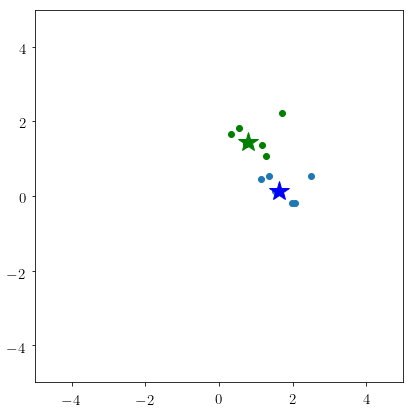

In [28]:
plt.figure(figsize=(6,6))
plt.scatter(rrls['pmra'], rrls['pmdec'])
plt.scatter(rrls_pmrac, rrls_pmdecc, c='g')
plt.plot(pmra_pal13, pmdec_pal13, 'b*', ms=20)
plt.plot(pmrac_pal13, pmdecc_pal13, 'g*', ms=20)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

# Model

In [29]:
import astropy.table as at
# tbl = at.QTable.read('../data/MAP_stream_model.ecsv')
tbl = at.QTable.read('../data/best_stream_model.ecsv')
tbl.keys()

['ra', 'dec', 'distance', 'pm_ra_cosdec', 'pm_dec', 'radial_velocity']

In [30]:
# mod_colors[np.abs(model_phi1) < 12.8].min(), mod_colors[np.abs(model_phi1) < 12.8].max()

In [31]:
model_phi1, model_phi2 = rotation_matrix.phi12_rotmat(tbl['ra'].deg, tbl['dec'].deg, R)

In [43]:
idx = np.abs(model_phi1) < 10
x = model_phi1[idx]
y = plot_density.dist2mod(tbl['distance'][idx])
p_dist = np.polyfit(x, y, deg=1)
print(p_dist)

[ 0.04140175 17.01255157]


In [45]:
# dm = 0.414 * phi1 + 17.013

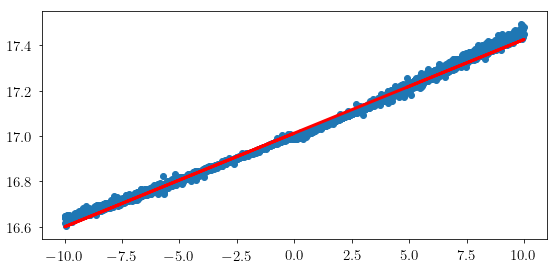

In [44]:
plt.figure(figsize=(8,4))
plt.scatter(x, y)
plt.plot(x, x*p_dist[0]+p_dist[1], c='r', lw=3)
# plt.xlim(-10,10)
plt.show()

# Spatial + RRLs

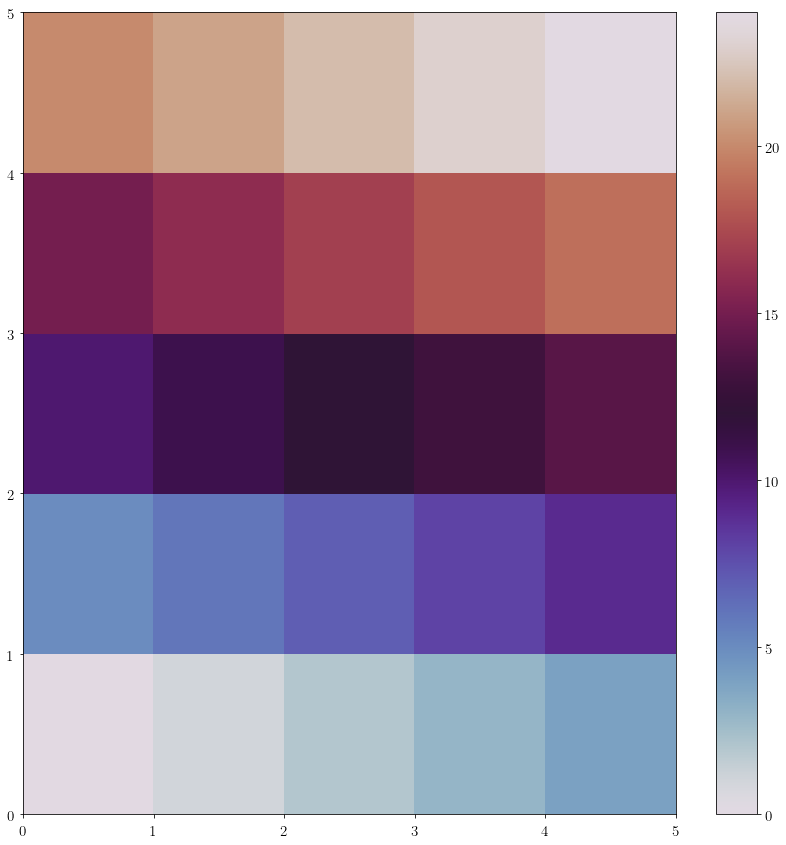

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

_twilight_data = [
    [0.88575015840754434, 0.85000924943067835,  0.8879736506427196],
    [0.88378520195539056, 0.85072940540310626,  0.88723222096949894],
    [0.88172231059285788, 0.85127594077653468,  0.88638056925514819],
    [0.8795410528270573,  0.85165675407495722,  0.8854143767924102],
    [0.87724880858965482, 0.85187028338870274,  0.88434120381311432],
    [0.87485347508575972, 0.85191526123023187,  0.88316926967613829],
    [0.87233134085124076, 0.85180165478080894,  0.88189704355001619],
    [0.86970474853509816, 0.85152403004797894,  0.88053883390003362],
    [0.86696015505333579, 0.8510896085314068,   0.87909766977173343],
    [0.86408985081463996, 0.85050391167507788,  0.87757925784892632],
    [0.86110245436899846, 0.84976754857001258,  0.87599242923439569],
    [0.85798259245670372, 0.84888934810281835,  0.87434038553446281],
    [0.85472593189256985, 0.84787488124672816,  0.8726282980930582],
    [0.85133714570857189, 0.84672735796116472,  0.87086081657350445],
    [0.84780710702577922, 0.8454546229209523,   0.86904036783694438],
    [0.8441261828674842,  0.84406482711037389,  0.86716973322690072],
    [0.84030420805957784, 0.8425605950855084,   0.865250882410458],
    [0.83634031809191178, 0.84094796518951942,  0.86328528001070159],
    [0.83222705712934408, 0.83923490627754482,  0.86127563500427884],
    [0.82796894316013536, 0.83742600751395202,  0.85922399451306786],
    [0.82357429680252847, 0.83552487764795436,  0.85713191328514948],
    [0.81904654677937527, 0.8335364929949034,   0.85500206287010105],
    [0.81438982121143089, 0.83146558694197847,  0.85283759062147024],
    [0.8095999819094809,  0.82931896673505456,  0.85064441601050367],
    [0.80469164429814577, 0.82709838780560663,  0.84842449296974021],
    [0.79967075421267997, 0.82480781812080928,  0.84618210029578533],
    [0.79454305089231114, 0.82245116226304615,  0.84392184786827984],
    [0.78931445564608915, 0.82003213188702007,  0.8416486380471222],
    [0.78399101042764918, 0.81755426400533426,  0.83936747464036732],
    [0.77857892008227592, 0.81502089378742548,  0.8370834463093898],
    [0.77308416590170936, 0.81243524735466011,  0.83480172950579679],
    [0.76751108504417864, 0.8098007598713145,   0.83252816638059668],
    [0.76186907937980286, 0.80711949387647486,  0.830266486168872],
    [0.75616443584381976, 0.80439408733477935,  0.82802138994719998],
    [0.75040346765406696, 0.80162699008965321,  0.82579737851082424],
    [0.74459247771890169, 0.79882047719583249,  0.82359867586156521],
    [0.73873771700494939, 0.79597665735031009,  0.82142922780433014],
    [0.73284543645523459, 0.79309746468844067,  0.81929263384230377],
    [0.72692177512829703, 0.7901846863592763,   0.81719217466726379],
    [0.72097280665536778, 0.78723995923452639,  0.81513073920879264],
    [0.71500403076252128, 0.78426487091581187,  0.81311116559949914],
    [0.70902078134539304, 0.78126088716070907,  0.81113591855117928],
    [0.7030297722540817,  0.77822904973358131,  0.80920618848056969],
    [0.6970365443886174,  0.77517050008066057,  0.80732335380063447],
    [0.69104641009309098, 0.77208629460678091,  0.80548841690679074],
    [0.68506446154395928, 0.7689774029354699,   0.80370206267176914],
    [0.67909554499882152, 0.76584472131395898,  0.8019646617300199],
    [0.67314422559426212, 0.76268908733890484,  0.80027628545809526],
    [0.66721479803752815, 0.7595112803730375,   0.79863674654537764],
    [0.6613112930078745,  0.75631202708719025,  0.7970456043491897],
    [0.65543692326454717, 0.75309208756768431,  0.79550271129031047],
    [0.64959573004253479, 0.74985201221941766,  0.79400674021499107],
    [0.6437910831099849,  0.7465923800833657,   0.79255653201306053],
    [0.63802586828545982, 0.74331376714033193,  0.79115100459573173],
    [0.6323027138710603,  0.74001672160131404,  0.78978892762640429],
    [0.62662402022604591, 0.73670175403699445,  0.78846901316334561],
    [0.62099193064817548, 0.73336934798923203,  0.78718994624696581],
    [0.61540846411770478, 0.73001995232739691,  0.78595022706750484],
    [0.60987543176093062, 0.72665398759758293,  0.78474835732694714],
    [0.60439434200274855, 0.7232718614323369,   0.78358295593535587],
    [0.5989665814482068,  0.71987394892246725,  0.78245259899346642],
    [0.59359335696837223, 0.7164606049658685,   0.78135588237640097],
    [0.58827579780555495, 0.71303214646458135,  0.78029141405636515],
    [0.58301487036932409, 0.70958887676997473,  0.77925781820476592],
    [0.5778116438998202,  0.70613106157153982,  0.77825345121025524],
    [0.5726668948158774,  0.7026589535425779,   0.77727702680911992],
    [0.56758117853861967, 0.69917279302646274,  0.77632748534275298],
    [0.56255515357219343, 0.69567278381629649,  0.77540359142309845],
    [0.55758940419605174, 0.69215911458254054,  0.7745041337932782],
    [0.55268450589347129, 0.68863194515166382,  0.7736279426902245],
    [0.54784098153018634, 0.68509142218509878,  0.77277386473440868],
    [0.54305932424018233, 0.68153767253065878,  0.77194079697835083],
    [0.53834015575176275, 0.67797081129095405,  0.77112734439057717],
    [0.53368389147728401, 0.67439093705212727,  0.7703325054879735],
    [0.529090861832473,   0.67079812302806219,  0.76955552292313134],
    [0.52456151470593582, 0.66719242996142225,  0.76879541714230948],
    [0.52009627392235558, 0.66357391434030388,  0.76805119403344102],
    [0.5156955988596057,  0.65994260812897998,  0.76732191489596169],
    [0.51135992541601927, 0.65629853981831865,  0.76660663780645333],
    [0.50708969576451657, 0.65264172403146448,  0.76590445660835849],
    [0.5028853540415561,  0.64897216734095264,  0.76521446718174913],
    [0.49874733661356069, 0.6452898684900934,   0.76453578734180083],
    [0.4946761847863938,  0.64159484119504429,  0.76386719002130909],
    [0.49067224938561221, 0.63788704858847078,  0.76320812763163837],
    [0.4867359599430568,  0.63416646251100506,  0.76255780085924041],
    [0.4828677867260272,  0.6304330455306234,   0.76191537149895305],
    [0.47906816236197386, 0.62668676251860134,  0.76128000375662419],
    [0.47533752394906287, 0.62292757283835809,  0.76065085571817748],
    [0.47167629518877091, 0.61915543242884641,  0.76002709227883047],
    [0.46808490970531597, 0.61537028695790286,  0.75940789891092741],
    [0.46456376716303932, 0.61157208822864151,  0.75879242623025811],
    [0.46111326647023881, 0.607760777169989,    0.75817986436807139],
    [0.45773377230160567, 0.60393630046586455,  0.75756936901859162],
    [0.45442563977552913, 0.60009859503858665,  0.75696013660606487],
    [0.45118918687617743, 0.59624762051353541,  0.75635120643246645],
    [0.44802470933589172, 0.59238331452146575,  0.75574176474107924],
    [0.44493246854215379, 0.5885055998308617,   0.7551311041857901],
    [0.44191271766696399, 0.58461441100175571,  0.75451838884410671],
    [0.43896563958048396, 0.58070969241098491,  0.75390276208285945],
    [0.43609138958356369, 0.57679137998186081,  0.7532834105961016],
    [0.43329008867358393, 0.57285941625606673,  0.75265946532566674],
    [0.43056179073057571, 0.56891374572457176,  0.75203008099312696],
    [0.42790652284925834, 0.5649543060909209,   0.75139443521914839],
    [0.42532423665011354, 0.56098104959950301,  0.75075164989005116],
    [0.42281485675772662, 0.55699392126996583,  0.75010086988227642],
    [0.42037822361396326, 0.55299287158108168,  0.7494412559451894],
    [0.41801414079233629, 0.54897785421888889,  0.74877193167001121],
    [0.4157223260454232,  0.54494882715350401,  0.74809204459000522],
    [0.41350245743314729, 0.54090574771098476,  0.74740073297543086],
    [0.41135414697304568, 0.53684857765005933,  0.74669712855065784],
    [0.4092768899914751,  0.53277730177130322,  0.74598030635707824],
    [0.40727018694219069, 0.52869188011057411,  0.74524942637581271],
    [0.40533343789303178, 0.52459228174983119,  0.74450365836708132],
    [0.40346600333905397, 0.52047847653840029,  0.74374215223567086],
    [0.40166714010896104, 0.51635044969688759,  0.7429640345324835],
    [0.39993606933454834, 0.51220818143218516,  0.74216844571317986],
    [0.3982719152586337,  0.50805166539276136,  0.74135450918099721],
    [0.39667374905665609, 0.50388089053847973,  0.74052138580516735],
    [0.39514058808207631, 0.49969585326377758,  0.73966820211715711],
    [0.39367135736822567, 0.49549655777451179,  0.738794102296364],
    [0.39226494876209317, 0.49128300332899261,  0.73789824784475078],
    [0.39092017571994903, 0.48705520251223039,  0.73697977133881254],
    [0.38963580160340855, 0.48281316715123496,  0.73603782546932739],
    [0.38841053300842432, 0.47855691131792805,  0.73507157641157261],
    [0.38724301459330251, 0.47428645933635388,  0.73408016787854391],
    [0.38613184178892102, 0.4700018340988123,   0.7330627749243106],
    [0.38507556793651387, 0.46570306719930193,  0.73201854033690505],
    [0.38407269378943537, 0.46139018782416635,  0.73094665432902683],
    [0.38312168084402748, 0.45706323581407199,  0.72984626791353258],
    [0.38222094988570376, 0.45272225034283325,  0.72871656144003782],
    [0.38136887930454161, 0.44836727669277859,  0.72755671317141346],
    [0.38056380696565623, 0.44399837208633719,  0.72636587045135315],
    [0.37980403744848751, 0.43961558821222629,  0.72514323778761092],
    [0.37908789283110761, 0.43521897612544935,  0.72388798691323131],
    [0.378413635091359,   0.43080859411413064,  0.72259931993061044],
    [0.37777949753513729, 0.4263845142616835,   0.72127639993530235],
    [0.37718371844251231, 0.42194680223454828,  0.71991841524475775],
    [0.37662448930806297, 0.41749553747893614,  0.71852454736176108],
    [0.37610001286385814, 0.41303079952477062,  0.71709396919920232],
    [0.37560846919442398, 0.40855267638072096,  0.71562585091587549],
    [0.37514802505380473, 0.4040612609993941,   0.7141193695725726],
    [0.37471686019302231, 0.3995566498711684,   0.71257368516500463],
    [0.37431313199312338, 0.39503894828283309,  0.71098796522377461],
    [0.37393499330475782, 0.39050827529375831,  0.70936134293478448],
    [0.3735806215098284,  0.38596474386057539,  0.70769297607310577],
    [0.37324816143326384, 0.38140848555753937,  0.70598200974806036],
    [0.37293578646665032, 0.37683963835219841,  0.70422755780589941],
    [0.37264166757849604, 0.37225835004836849,  0.7024287314570723],
    [0.37236397858465387, 0.36766477862108266,  0.70058463496520773],
    [0.37210089702443822, 0.36305909736982378,  0.69869434615073722],
    [0.3718506155898596,  0.35844148285875221,  0.69675695810256544],
    [0.37161133234400479, 0.3538121372967869,   0.69477149919380887],
    [0.37138124223736607, 0.34917126878479027,  0.69273703471928827],
    [0.37115856636209105, 0.34451911410230168,  0.69065253586464992],
    [0.37094151551337329, 0.33985591488818123,  0.68851703379505125],
    [0.37072833279422668, 0.33518193808489577,  0.68632948169606767],
    [0.37051738634484427, 0.33049741244307851,  0.68408888788857214],
    [0.37030682071842685, 0.32580269697872455,  0.68179411684486679],
    [0.37009487130772695, 0.3210981375964933,   0.67944405399056851],
    [0.36987980329025361, 0.31638410101153364,  0.67703755438090574],
    [0.36965987626565955, 0.31166098762951971,  0.67457344743419545],
    [0.36943334591276228, 0.30692923551862339,  0.67205052849120617],
    [0.36919847837592484, 0.30218932176507068,  0.66946754331614522],
    [0.36895355306596778, 0.29744175492366276,  0.66682322089824264],
    [0.36869682231895268, 0.29268709856150099,  0.66411625298236909],
    [0.36842655638020444, 0.28792596437778462,  0.66134526910944602],
    [0.36814101479899719, 0.28315901221182987,  0.65850888806972308],
    [0.36783843696531082, 0.27838697181297761,  0.65560566838453704],
    [0.36751707094367697, 0.27361063317090978,  0.65263411711618635],
    [0.36717513650699446, 0.26883085667326956,  0.64959272297892245],
    [0.36681085540107988, 0.26404857724525643,  0.64647991652908243],
    [0.36642243251550632, 0.25926481158628106,  0.64329409140765537],
    [0.36600853966739794, 0.25448043878086224,  0.64003361803368586],
    [0.36556698373538982, 0.24969683475296395,  0.63669675187488584],
    [0.36509579845886808, 0.24491536803550484,  0.63328173520055586],
    [0.36459308890125008, 0.24013747024823828,  0.62978680155026101],
    [0.36405693022088509, 0.23536470386204195,  0.62621013451953023],
    [0.36348537610385145, 0.23059876218396419,  0.62254988622392882],
    [0.36287643560041027, 0.22584149293287031,  0.61880417410823019],
    [0.36222809558295926, 0.22109488427338303,  0.61497112346096128],
    [0.36153829010998356, 0.21636111429594002,  0.61104880679640927],
    [0.36080493826624654, 0.21164251793458128,  0.60703532172064711],
    [0.36002681809096376, 0.20694122817889948,  0.60292845431916875],
    [0.35920088560930186, 0.20226037920758122,  0.5987265295935138],
    [0.35832489966617809, 0.197602942459778,    0.59442768517501066],
    [0.35739663292915563, 0.19297208197842461,  0.59003011251063131],
    [0.35641381143126327, 0.18837119869242164,  0.5855320765920552],
    [0.35537415306906722, 0.18380392577704466,  0.58093191431832802],
    [0.35427534960663759, 0.17927413271618647,  0.57622809660668717],
    [0.35311574421123737, 0.17478570377561287,  0.57141871523555288],
    [0.35189248608873791, 0.17034320478524959,  0.56650284911216653],
    [0.35060304441931012, 0.16595129984720861,  0.56147964703993225],
    [0.34924513554955644, 0.16161477763045118,  0.55634837474163779],
    [0.34781653238777782, 0.15733863511152979,  0.55110853452703257],
    [0.34631507175793091, 0.15312802296627787,  0.5457599924248665],
    [0.34473901574536375, 0.14898820589826409,  0.54030245920406539],
    [0.34308600291572294, 0.14492465359918028,  0.53473704282067103],
    [0.34135411074506483, 0.1409427920655632,   0.52906500940336754],
    [0.33954168752669694, 0.13704801896718169,  0.52328797535085236],
    [0.33764732090671112, 0.13324562282438077,  0.51740807573979475],
    [0.33566978565015315, 0.12954074251271822,  0.51142807215168951],
    [0.33360804901486002, 0.12593818301005921,  0.50535164796654897],
    [0.33146154891145124, 0.12244245263391232,  0.49918274588431072],
    [0.32923005203231409, 0.11905764321981127,  0.49292595612342666],
    [0.3269137124539796,  0.1157873496841953,   0.48658646495697461],
    [0.32451307931207785, 0.11263459791730848,  0.48017007211645196],
    [0.32202882276069322, 0.10960114111258401,  0.47368494725726878],
    [0.31946262395497965, 0.10668879882392659,  0.46713728801395243],
    [0.31681648089023501, 0.10389861387653518,  0.46053414662739794],
    [0.31409278414755532, 0.10123077676403242,  0.45388335612058467],
    [0.31129434479712365, 0.098684771934052201, 0.44719313715161618],
    [0.30842444457210105, 0.096259385340577736, 0.44047194882050544],
    [0.30548675819945936, 0.093952764840823738, 0.43372849999361113],
    [0.30248536364574252, 0.091761187397303601, 0.42697404043749887],
    [0.29942483960214772, 0.089682253716750038, 0.42021619665853854],
    [0.29631000388905288, 0.087713250960463951, 0.41346259134143476],
    [0.29314593096985248, 0.085850656889620708, 0.40672178082365834],
    [0.28993792445176608, 0.08409078829085731,  0.40000214725256295],
    [0.28669151388283165, 0.082429873848480689, 0.39331182532243375],
    [0.28341239797185225, 0.080864153365499375, 0.38665868550105914],
    [0.28010638576975472, 0.079389994802261526, 0.38005028528138707],
    [0.27677939615815589, 0.078003941033788216, 0.37349382846504675],
    [0.27343739342450812, 0.076702800237496066, 0.36699616136347685],
    [0.27008637749114051, 0.075483675584275545, 0.36056376228111864],
    [0.26673233211995284, 0.074344018028546205, 0.35420276066240958],
    [0.26338121807151404, 0.073281657939897077, 0.34791888996380105],
    [0.26003895187439957, 0.072294781043362205, 0.3417175669546984],
    [0.25671191651083902, 0.071380106242082242, 0.33560648984600089],
    [0.25340685873736807, 0.070533582926851829, 0.3295945757321303],
    [0.25012845306199383, 0.069758206429106989, 0.32368100685760637],
    [0.24688226237958999, 0.069053639449204451, 0.31786993834254956],
    [0.24367372557466271, 0.068419855150922693, 0.31216524050888372],
    [0.24050813332295939, 0.067857103814855602, 0.30657054493678321],
    [0.23739062429054825, 0.067365888050555517, 0.30108922184065873],
    [0.23433055727563878, 0.066935599661639394, 0.29574009929867601],
    [0.23132955273021344, 0.066576186939090592, 0.29051361067988485],
    [0.2283917709422868,  0.06628997924139618,  0.28541074411068496],
    [0.22552164337737857, 0.066078173119395595, 0.28043398847505197],
    [0.22272706739121817, 0.065933790675651943, 0.27559714652053702],
    [0.22001251100779617, 0.065857918918907604, 0.27090279994325861],
    [0.21737845072382705, 0.065859661233562045, 0.26634209349669508],
    [0.21482843531473683, 0.065940385613778491, 0.26191675992376573],
    [0.21237411048541005, 0.066085024661758446, 0.25765165093569542],
    [0.21001214221188125, 0.066308573918947178, 0.2535289048041211],
    [0.2077442377448806,  0.06661453200418091,  0.24954644291943817],
    [0.20558051999470117, 0.066990462397868739, 0.24572497420147632],
    [0.20352007949514977, 0.067444179612424215, 0.24205576625191821],
    [0.20156133764129841, 0.067983271026200248, 0.23852974228695395],
    [0.19971571438603364, 0.068592710553704722, 0.23517094067076993],
    [0.19794834061899208, 0.069314066071660657, 0.23194647381302336],
    [0.1960826032659409,  0.070321227242423623, 0.22874673279569585],
    [0.19410351363791453, 0.071608304856891569, 0.22558727307410353],
    [0.19199449184606268, 0.073182830649273306, 0.22243385243433622],
    [0.18975853639094634, 0.075019861862143766, 0.2193005075652994],
    [0.18739228342697645, 0.077102096899588329, 0.21618875376309582],
    [0.18488035509396164, 0.079425730279723883, 0.21307651648984993],
    [0.18774482037046955, 0.077251588468039312, 0.21387448578597812],
    [0.19049578401722037, 0.075311278416787641, 0.2146562337112265],
    [0.1931548636579131,  0.073606819040117955, 0.21542362939081539],
    [0.19571853588267552, 0.072157781039602742, 0.21617499187076789],
    [0.19819343656336558, 0.070974625252738788, 0.21690975060032436],
    [0.20058760685133747, 0.070064576149984209, 0.21762721310371608],
    [0.20290365333558247, 0.069435248580458964, 0.21833167885096033],
    [0.20531725273301316, 0.068919592266397572, 0.21911516689288835],
    [0.20785704662965598, 0.068484398797025281, 0.22000133917653536],
    [0.21052882914958676, 0.06812195249816172,  0.22098759107715404],
    [0.2133313859647627,  0.067830148426026665, 0.22207043213024291],
    [0.21625279838647882, 0.067616330270516389, 0.22324568672294431],
    [0.21930503925136402, 0.067465786362940039, 0.22451023616807558],
    [0.22247308588973624, 0.067388214053092838, 0.22585960379408354],
    [0.2257539681670791,  0.067382132300147474, 0.22728984778098055],
    [0.22915620278592841, 0.067434730871152565, 0.22879681433956656],
    [0.23266299920501882, 0.067557104388479783, 0.23037617493752832],
    [0.23627495835774248, 0.06774359820987802,  0.23202360805926608],
    [0.23999586188690308, 0.067985029964779953, 0.23373434258507808],
    [0.24381149720247919, 0.068289851529011875, 0.23550427698321885],
    [0.24772092990501099, 0.068653337909486523, 0.2373288009471749],
    [0.25172899728289466, 0.069064630826035506, 0.23920260612763083],
    [0.25582135547481771, 0.06953231029187984,  0.24112190491594204],
    [0.25999463887892144, 0.070053855603861875, 0.24308218808684579],
    [0.26425512207060942, 0.070616595622995437, 0.24507758869355967],
    [0.26859095948172862, 0.071226716277922458, 0.24710443563450618],
    [0.27299701518897301, 0.071883555446163511, 0.24915847093232929],
    [0.27747150809142801, 0.072582969899254779, 0.25123493995942769],
    [0.28201746297366942, 0.073315693214040967, 0.25332800295084507],
    [0.28662309235899847, 0.074088460826808866, 0.25543478673717029],
    [0.29128515387578635, 0.074899049847466703, 0.25755101595750435],
    [0.2960004726065818,  0.075745336000958424, 0.25967245030364566],
    [0.30077276812918691, 0.076617824336164764, 0.26179294097819672],
    [0.30559226007249934, 0.077521963107537312, 0.26391006692119662],
    [0.31045520848595526, 0.078456871676182177, 0.2660200572779356],
    [0.31535870009205808, 0.079420997315243186, 0.26811904076941961],
    [0.32029986557994061, 0.080412994737554838, 0.27020322893039511],
    [0.32527888860401261, 0.081428390076546092, 0.27226772884656186],
    [0.33029174471181438, 0.08246763389003825,  0.27430929404579435],
    [0.33533353224455448, 0.083532434119003962, 0.27632534356790039],
    [0.34040164359597463, 0.084622236191702671, 0.27831254595259397],
    [0.34549355713871799, 0.085736654965126335, 0.28026769921081435],
    [0.35060678246032478, 0.08687555176033529,  0.28218770540182386],
    [0.35573889947341125, 0.088038974350243354, 0.2840695897279818],
    [0.36088752387578377, 0.089227194362745205, 0.28591050458531014],
    [0.36605031412464006, 0.090440685427697898, 0.2877077458811747],
    [0.37122508431309342, 0.091679997480262732, 0.28945865397633169],
    [0.3764103053221462,  0.092945198093777909, 0.29116024157313919],
    [0.38160247377467543, 0.094238731263712183, 0.29281107506269488],
    [0.38679939079544168, 0.09556181960083443,  0.29440901248173756],
    [0.39199887556812907, 0.09691583650296684,  0.29595212005509081],
    [0.39719876876325577, 0.098302320968278623, 0.29743856476285779],
    [0.40239692379737496, 0.099722930314950553, 0.29886674369733968],
    [0.40759120392688708, 0.10117945586419633,  0.30023519507728602],
    [0.41277985630360303, 0.1026734006932461,   0.30154226437468967],
    [0.41796105205173684, 0.10420644885760968,  0.30278652039631843],
    [0.42313214269556043, 0.10578120994917611,  0.3039675809469457],
    [0.42829101315789753, 0.1073997763055258,   0.30508479060294547],
    [0.4334355841041439,  0.1090642347484701,   0.30613767928289148],
    [0.43856378187931538, 0.11077667828375456,  0.30712600062348083],
    [0.44367358645071275, 0.11253912421257944,  0.30804973095465449],
    [0.44876299173174822, 0.11435355574622549,  0.30890905921943196],
    [0.45383005086999889, 0.11622183788331528,  0.30970441249844921],
    [0.45887288947308297, 0.11814571137706886,  0.31043636979038808],
    [0.46389102840284874, 0.12012561256850712,  0.31110343446582983],
    [0.46888111384598413, 0.12216445576414045,  0.31170911458932665],
    [0.473841437035254,   0.12426354237989065,  0.31225470169927194],
    [0.47877034239726296, 0.12642401401409453,  0.31274172735821959],
    [0.48366628618847957, 0.12864679022013889,  0.31317188565991266],
    [0.48852847371852987, 0.13093210934893723,  0.31354553695453014],
    [0.49335504375145617, 0.13328091630401023,  0.31386561956734976],
    [0.49814435462074153, 0.13569380302451714,  0.314135190862664],
    [0.50289524974970612, 0.13817086581280427,  0.31435662153833671],
    [0.50760681181053691, 0.14071192654913128,  0.31453200120082569],
    [0.51227835105321762, 0.14331656120063752,  0.3146630922831542],
    [0.51690848800544464, 0.14598463068714407,  0.31475407592280041],
    [0.52149652863229956, 0.14871544765633712,  0.31480767954534428],
    [0.52604189625477482, 0.15150818660835483,  0.31482653406646727],
    [0.53054420489856446, 0.15436183633886777,  0.31481299789187128],
    [0.5350027976174474,  0.15727540775107324,  0.31477085207396532],
    [0.53941736649199057, 0.16024769309971934,  0.31470295028655965],
    [0.54378771313608565, 0.16327738551419116,  0.31461204226295625],
    [0.54811370033467621, 0.1663630904279047,   0.31450102990914708],
    [0.55239521572711914, 0.16950338809328983,  0.31437291554615371],
    [0.55663229034969341, 0.17269677158182117,  0.31423043195101424],
    [0.56082499039117173, 0.17594170887918095,  0.31407639883970623],
    [0.56497343529017696, 0.17923664950367169,  0.3139136046337036],
    [0.56907784784011428, 0.18258004462335425,  0.31374440956796529],
    [0.57313845754107873, 0.18597036007065024,  0.31357126868520002],
    [0.57715550812992045, 0.18940601489760422,  0.31339704333572083],
    [0.58112932761586555, 0.19288548904692518,  0.31322399394183942],
    [0.58506024396466882, 0.19640737049066315,  0.31305401163732732],
    [0.58894861935544707, 0.19997020971775276,  0.31288922211590126],
    [0.59279480536520257, 0.20357251410079796,  0.31273234839304942],
    [0.59659918109122367, 0.207212956082026,    0.31258523031121233],
    [0.60036213010411577, 0.21089030138947745,  0.31244934410414688],
    [0.60408401696732739, 0.21460331490206347,  0.31232652641170694],
    [0.60776523994818654, 0.21835070166659282,  0.31221903291870201],
    [0.6114062072731884,  0.22213124697023234,  0.31212881396435238],
    [0.61500723236391375, 0.22594402043981826,  0.31205680685765741],
    [0.61856865258877192, 0.22978799249179921,  0.31200463838728931],
    [0.62209079821082613, 0.2336621873300741,   0.31197383273627388],
    [0.62557416500434959, 0.23756535071152696,  0.31196698314912269],
    [0.62901892016985872, 0.24149689191922535,  0.31198447195645718],
    [0.63242534854210275, 0.24545598775548677,  0.31202765974624452],
    [0.6357937104834237,  0.24944185818822678,  0.31209793953300591],
    [0.6391243387840212,  0.25345365461983138,  0.31219689612063978],
    [0.642417577481186,   0.257490519876798,    0.31232631707560987],
    [0.64567349382645434, 0.26155203161615281,  0.31248673753935263],
    [0.64889230169458245, 0.26563755336209077,  0.31267941819570189],
    [0.65207417290277303, 0.26974650525236699,  0.31290560605819168],
    [0.65521932609327127, 0.27387826652410152,  0.3131666792687211],
    [0.6583280801134499,  0.27803210957665631,  0.3134643447952643],
    [0.66140037532601781, 0.28220778870555907,  0.31379912926498488],
    [0.66443632469878844, 0.28640483614256179,  0.31417223403606975],
    [0.66743603766369131, 0.29062280081258873,  0.31458483752056837],
    [0.67039959547676198, 0.29486126309253047,  0.31503813956872212],
    [0.67332725564817331, 0.29911962764489264,  0.31553372323982209],
    [0.67621897924409746, 0.30339762792450425,  0.3160724937230589],
    [0.67907474028157344, 0.30769497879760166,  0.31665545668946665],
    [0.68189457150944521, 0.31201133280550686,  0.31728380489244951],
    [0.68467850942494535, 0.31634634821222207,  0.31795870784057567],
    [0.68742656435169625, 0.32069970535138104,  0.31868137622277692],
    [0.6901389321505248,  0.32507091815606004,  0.31945332332898302],
    [0.69281544846764931, 0.32945984647042675,  0.3202754315314667],
    [0.69545608346891119, 0.33386622163232865,  0.32114884306985791],
    [0.6980608153581771,  0.33828976326048621,  0.32207478855218091],
    [0.70062962477242097, 0.34273019305341756,  0.32305449047765694],
    [0.70316249458814151, 0.34718723719597999,  0.32408913679491225],
    [0.70565951122610093, 0.35166052978120937,  0.32518014084085567],
    [0.70812059568420482, 0.35614985523380299,  0.32632861885644465],
    [0.7105456546582587,  0.36065500290840113,  0.32753574162788762],
    [0.71293466839773467, 0.36517570519856757,  0.3288027427038317],
    [0.71528760614847287, 0.36971170225223449,  0.3301308728723546],
    [0.71760444908133847, 0.37426272710686193,  0.33152138620958932],
    [0.71988521490549851, 0.37882848839337313,  0.33297555200245399],
    [0.7221299918421461,  0.38340864508963057,  0.33449469983585844],
    [0.72433865647781592, 0.38800301593162145,  0.33607995965691828],
    [0.72651122900227549, 0.3926113126792577,   0.3377325942005665],
    [0.72864773856716547, 0.39723324476747235,  0.33945384341064017],
    [0.73074820754845171, 0.401868526884681,    0.3412449533046818],
    [0.73281270506268747, 0.4065168468778026,   0.34310715173410822],
    [0.73484133598564938, 0.41117787004519513,  0.34504169470809071],
    [0.73683422173585866, 0.41585125850290111,  0.34704978520758401],
    [0.73879140024599266, 0.42053672992315327,  0.34913260148542435],
    [0.74071301619506091, 0.4252339389526239,   0.35129130890802607],
    [0.7425992159973317,  0.42994254036133867,  0.35352709245374592],
    [0.74445018676570673, 0.43466217184617112,  0.35584108091122535],
    [0.74626615789163442, 0.43939245044973502,  0.35823439142300639],
    [0.74804739275559562, 0.44413297780351974,  0.36070813602540136],
    [0.74979420547170472, 0.44888333481548809,  0.36326337558360278],
    [0.75150685045891663, 0.45364314496866825,  0.36590112443835765],
    [0.75318566369046569, 0.45841199172949604,  0.36862236642234769],
    [0.75483105066959544, 0.46318942799460555,  0.3714280448394211],
    [0.75644341577140706, 0.46797501437948458,  0.37431909037543515],
    [0.75802325538455839, 0.4727682731566229,   0.37729635531096678],
    [0.75957111105340058, 0.47756871222057079,  0.380360657784311],
    [0.7610876378057071,  0.48237579130289127,  0.38351275723852291],
    [0.76257333554052609, 0.48718906673415824,  0.38675335037837993],
    [0.76402885609288662, 0.49200802533379656,  0.39008308392311997],
    [0.76545492593330511, 0.49683212909727231,  0.39350254000115381],
    [0.76685228950643891, 0.5016608471009063,   0.39701221751773474],
    [0.76822176599735303, 0.50649362371287909,  0.40061257089416885],
    [0.7695642334401418,  0.5113298901696085,   0.40430398069682483],
    [0.77088091962302474, 0.51616892643469103,  0.40808667584648967],
    [0.77217257229605551, 0.5210102658711383,   0.41196089987122869],
    [0.77344021829889886, 0.52585332093451564,  0.41592679539764366],
    [0.77468494746063199, 0.53069749384776732,  0.41998440356963762],
    [0.77590790730685699, 0.53554217882461186,  0.42413367909988375],
    [0.7771103295521099,  0.54038674910561235,  0.42837450371258479],
    [0.77829345807633121, 0.54523059488426595,  0.432706647838971],
    [0.77945862731506643, 0.55007308413977274,  0.43712979856444761],
    [0.78060774749483774, 0.55491335744890613,  0.44164332426364639],
    [0.78174180478981836, 0.55975098052594863,  0.44624687186865436],
    [0.78286225264440912, 0.56458533111166875,  0.45093985823706345],
    [0.78397060836414478, 0.56941578326710418,  0.45572154742892063],
    [0.78506845019606841, 0.5742417003617839,   0.46059116206904965],
    [0.78615737132332963, 0.5790624629815756,   0.46554778281918402],
    [0.78723904108188347, 0.58387743744557208,  0.47059039582133383],
    [0.78831514045623963, 0.58868600173562435,  0.47571791879076081],
    [0.78938737766251943, 0.5934875421745599,   0.48092913815357724],
    [0.79045776847727878, 0.59828134277062461,  0.48622257801969754],
    [0.79152832843475607, 0.60306670593147205,  0.49159667021646397],
    [0.79260034304237448, 0.60784322087037024,  0.49705020621532009],
    [0.79367559698664958, 0.61261029334072192,  0.50258161291269432],
    [0.79475585972654039, 0.61736734400220705,  0.50818921213102985],
    [0.79584292379583765, 0.62211378808451145,  0.51387124091909786],
    [0.79693854719951607, 0.62684905679296699,  0.5196258425240281],
    [0.79804447815136637, 0.63157258225089552,  0.52545108144834785],
    [0.7991624518501963,  0.63628379372029187,  0.53134495942561433],
    [0.80029415389753977, 0.64098213306749863,  0.53730535185141037],
    [0.80144124292560048, 0.64566703459218766,  0.5433300863249918],
    [0.80260531146112946, 0.65033793748103852,  0.54941691584603647],
    [0.80378792531077625, 0.65499426549472628,  0.55556350867083815],
    [0.80499054790810298, 0.65963545027564163,  0.56176745110546977],
    [0.80621460526927058, 0.66426089585282289,  0.56802629178649788],
    [0.8074614045096935,  0.6688700095398864,   0.57433746373459582],
    [0.80873219170089694, 0.67346216702194517,  0.58069834805576737],
    [0.81002809466520687, 0.67803672673971815,  0.58710626908082753],
    [0.81135014011763329, 0.68259301546243389,  0.59355848909050757],
    [0.81269922039881493, 0.68713033714618876,  0.60005214820435104],
    [0.81407611046993344, 0.69164794791482131,  0.6065843782630862],
    [0.81548146627279483, 0.69614505508308089,  0.61315221209322646],
    [0.81691575775055891, 0.70062083014783982,  0.61975260637257923],
    [0.81837931164498223, 0.70507438189635097,  0.62638245478933297],
    [0.81987230650455289, 0.70950474978787481,  0.63303857040067113],
    [0.8213947205565636,  0.7139109141951604,   0.63971766697672761],
    [0.82294635110428427, 0.71829177331290062,  0.6464164243818421],
    [0.8245268129450285,  0.72264614312088882,  0.65313137915422603],
    [0.82613549710580259, 0.72697275518238258,  0.65985900156216504],
    [0.8277716072353446,  0.73127023324078089,  0.66659570204682972],
    [0.82943407816481474, 0.7355371221572935,   0.67333772009301907],
    [0.83112163529096306, 0.73977184647638616,  0.68008125203631464],
    [0.83283277185777982, 0.74397271817459876,  0.68682235874648545],
    [0.8345656905566583,  0.7481379479992134,   0.69355697649863846],
    [0.83631898844737929, 0.75226548952875261,  0.70027999028864962],
    [0.83809123476131964, 0.75635314860808633,  0.70698561390212977],
    [0.83987839884120874, 0.76039907199779677,  0.71367147811129228],
    [0.84167750766845151, 0.76440101200982946,  0.72033299387284622],
    [0.84348529222933699, 0.76835660399870176,  0.72696536998972039],
    [0.84529810731955113, 0.77226338601044719,  0.73356368240541492],
    [0.84711195507965098, 0.77611880236047159,  0.74012275762807056],
    [0.84892245563117641, 0.77992021407650147,  0.74663719293664366],
    [0.85072697023178789, 0.78366457342383888,  0.7530974636118285],
    [0.85251907207708444, 0.78734936133548439,  0.7594994148789691],
    [0.85429219611470464, 0.79097196777091994,  0.76583801477914104],
    [0.85604022314725403, 0.79452963601550608,  0.77210610037674143],
    [0.85775662943504905, 0.79801963142713928,  0.77829571667247499],
    [0.8594346370300241,  0.8014392309950078,   0.78439788751383921],
    [0.86107117027565516, 0.80478517909812231,  0.79039529663736285],
    [0.86265601051127572, 0.80805523804261525,  0.796282666437655],
    [0.86418343723941027, 0.81124644224653542,  0.80204612696863953],
    [0.86564934325605325, 0.81435544067514909,  0.80766972324164554],
    [0.86705314907048503, 0.81737804041911244,  0.81313419626911398],
    [0.86839954695818633, 0.82030875512181523,  0.81841638963128993],
    [0.86969131502613806, 0.82314158859569164,  0.82350476683173168],
    [0.87093846717297507, 0.82586857889438514,  0.82838497261149613],
    [0.87215331978454325, 0.82848052823709672,  0.8330486712880828],
    [0.87335171360916275, 0.83096715251272624,  0.83748851001197089],
    [0.87453793320260187, 0.83331972948645461,  0.84171925358069011],
    [0.87571458709961403, 0.8355302318472394,   0.84575537519027078],
    [0.87687848451614692, 0.83759238071186537,  0.84961373549150254],
    [0.87802298436649007, 0.83950165618540074,  0.85330645352458923],
    [0.87913244240792765, 0.84125554884475906,  0.85685572291039636],
    [0.88019293315695812, 0.84285224824778615,  0.86027399927156634],
    [0.88119169871341951, 0.84429066717717349,  0.86356595168669881],
    [0.88211542489401606, 0.84557007254559347,  0.86673765046233331],
    [0.88295168595448525, 0.84668970275699273,  0.86979617048190971],
    [0.88369127145898041, 0.84764891761519268,  0.87274147101441557],
    [0.88432713054113543, 0.84844741572055415,  0.87556785228242973],
    [0.88485138159908572, 0.84908426422893801,  0.87828235285372469],
    [0.88525897972630474, 0.84955892810989209,  0.88088414794024839],
    [0.88554714811952384, 0.84987174283631584,  0.88336206121170946],
    [0.88571155122845646, 0.85002186115856315,  0.88572538990087124]]

_twilight_shifted_data = (_twilight_data[len(_twilight_data)//2:] +
                          _twilight_data[:len(_twilight_data)//2])
_twilight_shifted_data.reverse()

cmaps = {}
for (name, data) in (('twilight', _twilight_data),
                     ('twilight_shifted', _twilight_shifted_data)):

    cmaps[name] = colors.ListedColormap(data, name=name)
    # generate reversed colormap
    name = name + '_r'
    cmaps[name] = colors.ListedColormap(list(reversed(data)), name=name)


fig, ax = plt.subplots()
p = ax.pcolormesh(np.arange(25).reshape(5, 5), cmap=cmaps['twilight'])
fig.colorbar(p, ax=ax)

plt.show()


16.8
13.0 13.047961797466591 -0.01038388665781846
Reading ../data/DECaLS_iso_hpxcube_z0.0001_a13.5_gmax23_gmin3p4_E2_C-0p020p1.fits.gz...
Reading ../data/DECaLS_nside128.fits.gz...
(3145728,) (3145728,) 3145728
158.98470572695592 120.60701163554218 164.1832968299641
Saving ../plots/Pal13/Paper/Pal13_stream_coords.png...


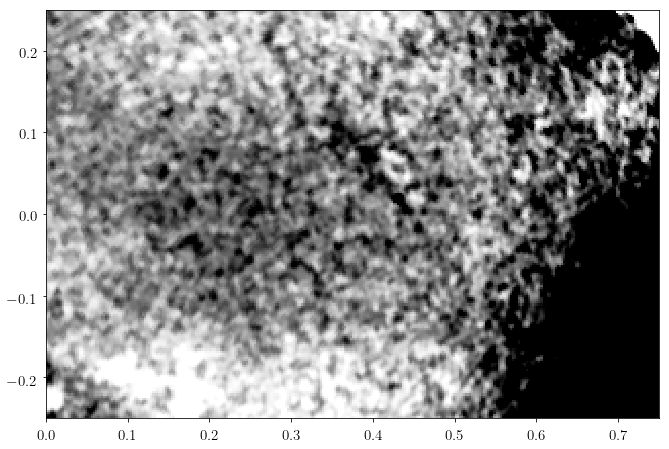

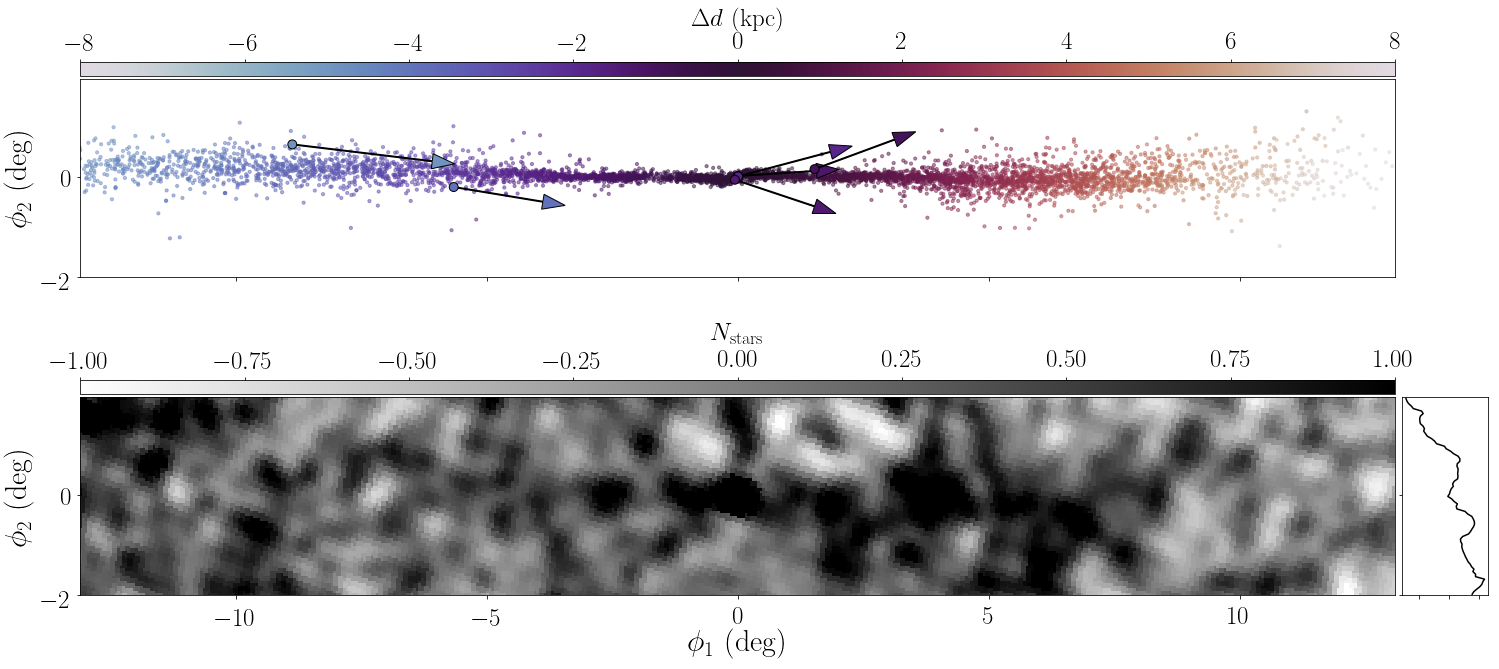

In [33]:
import elysian
import astropy.coordinates as coords
import astropy.units as u
import matplotlib.colors as colors

plot_density.plot_pretty(fontsize=30)

# hpxcube = hpxcube_south
# fracdet = fracdet_south

stream='Pal 13'
ends=ends

width=0.3
sigma=0.2
delta=0.2
vmin=-1.0
vmax=1.0

mu = 16.8
print(mu)

# filename = '../plots/Pal13/Paper/Pal13_stream_coords_%.1f.png' %mu
filename = '../plots/Pal13/Paper/Pal13_stream_coords.png'

proj1 = plot_density_healpy.get_ortho_proj(ends=[[8,13],[18,13]], half_sky=True)

# PLOT ZOOM SPATIAL
length = angsep(ends[0][0], ends[0][1], ends[1][0], ends[1][1])

# load data
# hpxcube_south, fracdet_south, modulus = load_data.load_data('DECaLS', 0.001, 11., 23.0)
hpxcube_south, fracdet_south, modulus = load_data.load_data(filename='../data/DECaLS_iso_hpxcube_z0.0001_a13.5_gmax23_gmin3p4_E2_C-0p020p1.fits.gz')
data_south = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=False, globs_dwarfs=True)
data_south_unm = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
bkg1 = plot_density_healpy.fit_bkg(data_south, proj1, sigma=0.1)

bkg1.mask = data_south_unm.mask
data = np.ma.copy(data_south_unm)
bkg = np.ma.copy(bkg1)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax1, im1 = plot_density_healpy.plot_proj(proj1, data-bkg, vmin=-1, vmax=1, ax=ax)
ax1.set_xlim(0,0.75)
ax1.set_ylim(-0.25, 0.25)


print(data.shape, bkg.shape, hp.nside2npix(512))

# rebin data
nside = hp.get_nside(data)
# height = max(1.2 * 6 * width, 5)
height = 2
length = max(1.2 * length, 1.5 * height)
streampix = streamlib.get_streampix(data=data, stream=None, ends=ends)
delta = 0.05
aspect = float(height) / length
b = np.arange(-height, height, delta)
l = np.arange(-length, length, delta)
ll, bb = np.meshgrid((l[1:] + l[:-1]) / 2., (b[1:] + b[:-1]) / 2.)

# transform data
# phi, theta, psi = results.euler_angles(ends[0][0], ends[0][1], ends[1][0], ends[1][1])
# stream_cls = elysian.euler_factory(stream, phi, theta, psi, ends=ends, flip=True)
# rot = stream_cls(Lambda=ll.flatten() * u.deg, Beta=bb.flatten() * u.deg)
# icrs = rot.transform_to(coords.ICRS)

stream_frame = gala.coordinates.GreatCircleICRSFrame.from_R(R)
rot = coords.SkyCoord(ll.flatten()*u.deg, bb.flatten()*u.deg, frame=stream_frame)
icrs = rot.transform_to(coords.ICRS)

# im data
pix = hp.ang2pix(nside, icrs.ra.deg, icrs.dec.deg, lonlat=True)
value = (data - bkg)[pix].reshape(ll.shape)

# masking for hist
ra, dec = hp.pix2ang(nside, np.arange(len(data)), lonlat=True)
mask_phi1, mask_phi2 = rotation_matrix.phi12_rotmat(ra, dec, R)
data[(mask_phi1 > phi1_min) & (mask_phi1 < phi1_max)] = np.ma.nomask
# data[np.abs(mask_phi1) > 5] = np.ma.nomask
data[np.abs(mask_phi1) < 0.4] = np.ma.nomask
# data[(mask_phi1 < 2.5) & (mask_phi1 > 1.5)] = np.ma.nomask
mask = (data.mask)[pix].reshape(ll.shape)
hist_value = (data - bkg)[pix].reshape(ll.shape)
# value = (data - bkg)[pix].reshape(ll.shape)

# plotting
fig, axes = plt.subplots(2, 1, figsize=(5.0 / aspect, 5.0*2), sharex=True)

######################
# RRL and Model Plot #
######################
ax = axes[0]
ax.set_aspect('equal')
ax.set_xlim(l.min(), l.max())
ax.set_ylim(b.min(), b.max())
# ax.set_xlabel(r'$\phi_1\ {\rm (deg)}$')
ax.set_ylabel(r'$\phi_2\ {\rm (deg)}$')
ax.tick_params(axis='both', which='major', labelsize=25)

plt.sca(ax)

# plot rrls
ref_dist = tbl['distance'].kpc[np.argmin(np.abs(model_phi1))]
rrl_colors = rrls['D_ps1']-ref_dist
cm = cmx.get_cmap(cmaps['twilight'])
# cm = cmx.get_cmap('coolwarm')
# cNorm  = colors.Normalize(vmin=-5, vmax=10)
cNorm  = colors.Normalize(vmin=-8, vmax=8)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

plt.scatter(rrls_phi1, rrls_phi2, c=scalarMap.to_rgba(rrl_colors), s=80, edgecolor='k', zorder=10000)

for j in range(len(rrls)):
    c = rrl_colors[j]
    plt.arrow(rrls_phi1[j], rrls_phi2[j], dx=rrls_pmphi1[j], dy=rrls_pmphi2[j], width=0.02, head_width=0.3, color=scalarMap.to_rgba(c), ec='k')

# plot model
mod_colors = tbl['distance'].kpc - ref_dist
plt.scatter(model_phi1, model_phi2, c=scalarMap.to_rgba(mod_colors), alpha=0.5, zorder=0, s=10)
    
    
    
divider = make_axes_locatable(ax)
cax1 = divider.append_axes('top', size='7%', pad=0.05)
cb1 = mpl.colorbar.ColorbarBase(cax1, cmap=cm, norm=cNorm, orientation='horizontal')
cax1.tick_params(axis='x', top=True, bottom=False, labeltop=True, labelbottom=False, labelsize=25)
cb1.set_label(r'$\Delta d\ \mathrm{(kpc)}$', fontsize=25)
cax1.xaxis.set_label_position('top')
# cb1.set_label(r'$|d_{\rm rrl} - d_{\rm Pal\ 13}|\ \mathrm{(kpc)}$')

ax2 = divider.append_axes('right', size=1.2, pad=0.1, sharey=ax)
ax2.axis('off')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

################
# Spatial Plot #
################
ax = axes[1]
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
ax2 = divider.append_axes('right', size=1.2, pad=0.1, sharey=ax)
# cax = divider.append_axes('top', size='7%', pad=0.05)

plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

# Do the plotting...
kw = dict(vmin=vmin, vmax=vmax, rasterized=True, cmap='gray_r')
im = ax.pcolormesh(l, b, value, **kw)

cax2 = divider.append_axes('top', size='7%', pad=0.05)
cb2 = plt.colorbar(im, cax2, orientation='horizontal')
cax2.tick_params(axis='x', top=True, bottom=False, labeltop=True, labelbottom=False, labelsize=25)
cb2.set_label(r'$N_{\rm stars}$', fontsize=25)
cax2.xaxis.set_label_position('top')

# stream track
# ax.plot(ends.L.deg, ends.B.deg, ls='--', lw=1.5, color='deepskyblue')

# hist
cts = hist_value.sum(axis=1)
area = (~mask).sum(axis=1)
ax2.plot(cts / area, (b[1:] + b[:-1]) / 2., color='k')
np.save('test0.npy', (cts/area).compressed())

# label = r'${\rm \textbf{%s}}$' % stream.replace(' ', '\ ')
# ax2.annotate(label, (0.95, 0.95), xycoords='axes fraction',
#              fontsize=14, ha='right', va='top')

# Labeling
ax.set_xlabel(r'$\phi_1\ {\rm (deg)}$')
ax.set_ylabel(r'$\phi_2\ {\rm (deg)}$')
ax.set_xlim(l.min(), l.max())
ax.set_ylim(b.min(), b.max())
ax.tick_params(axis='both', which='major', labelsize=25)

# plot great circle
# plt.sca(ax)
# plt.axhline(0, lw=2, alpha=0.5)

# plt.suptitle(name)
# plt.subplots_adjust(bottom=0.05, top=0.98, right=0.98)
# plt.tight_layout()

plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.sca(ax)

plt.tight_layout()
if filename:
    print('Saving %s...' %filename)
    plt.savefig(filename, rasterize=True, bbox_inches='tight')
#     plt.savefig(filename, bbox_inches='tight')
#     plt.close('all')

### Testing Kiyan's bkg

16.8
13.0 13.047961797466591 0.009279533354896388
Reading ../data/DECaLS_iso_hpxcube_z0.0001_a13.5_gmax23_gmin3p4_E2_C-0p020p1_nogrz.fits.gz...
Reading ../data/DECaLS_nside128.fits.gz...
(3145728,) (3145728,) 3145728
158.98470572695592 120.60701163554218 164.1832968299641


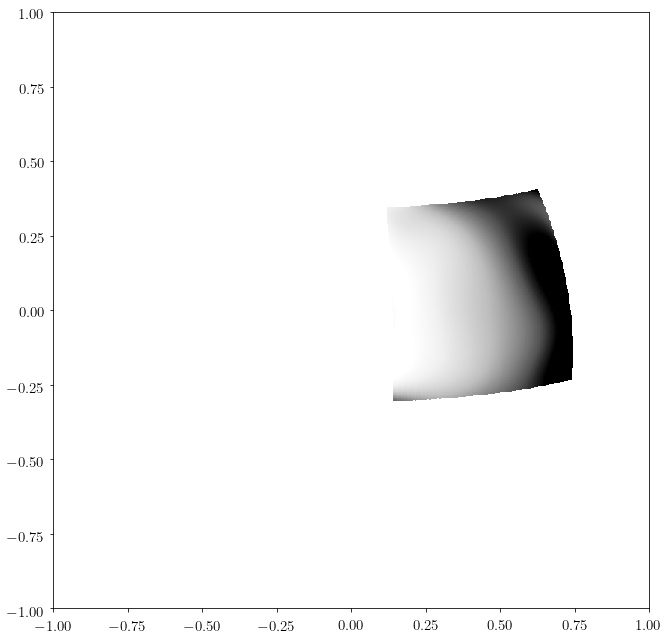

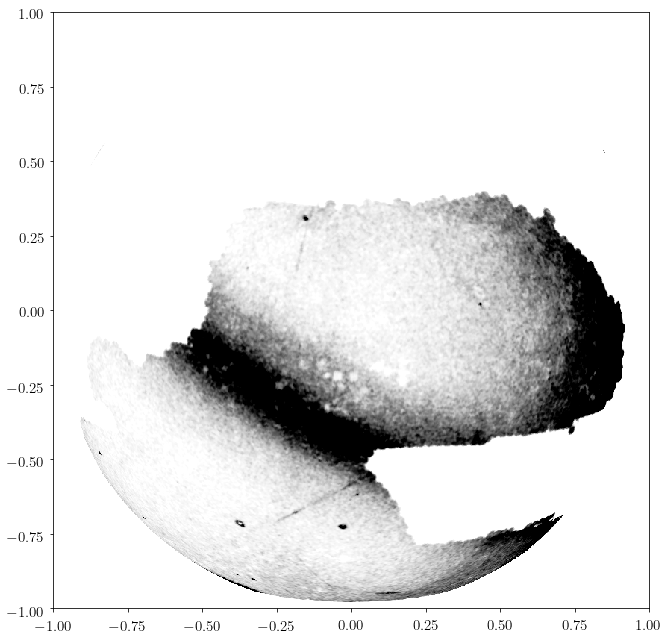

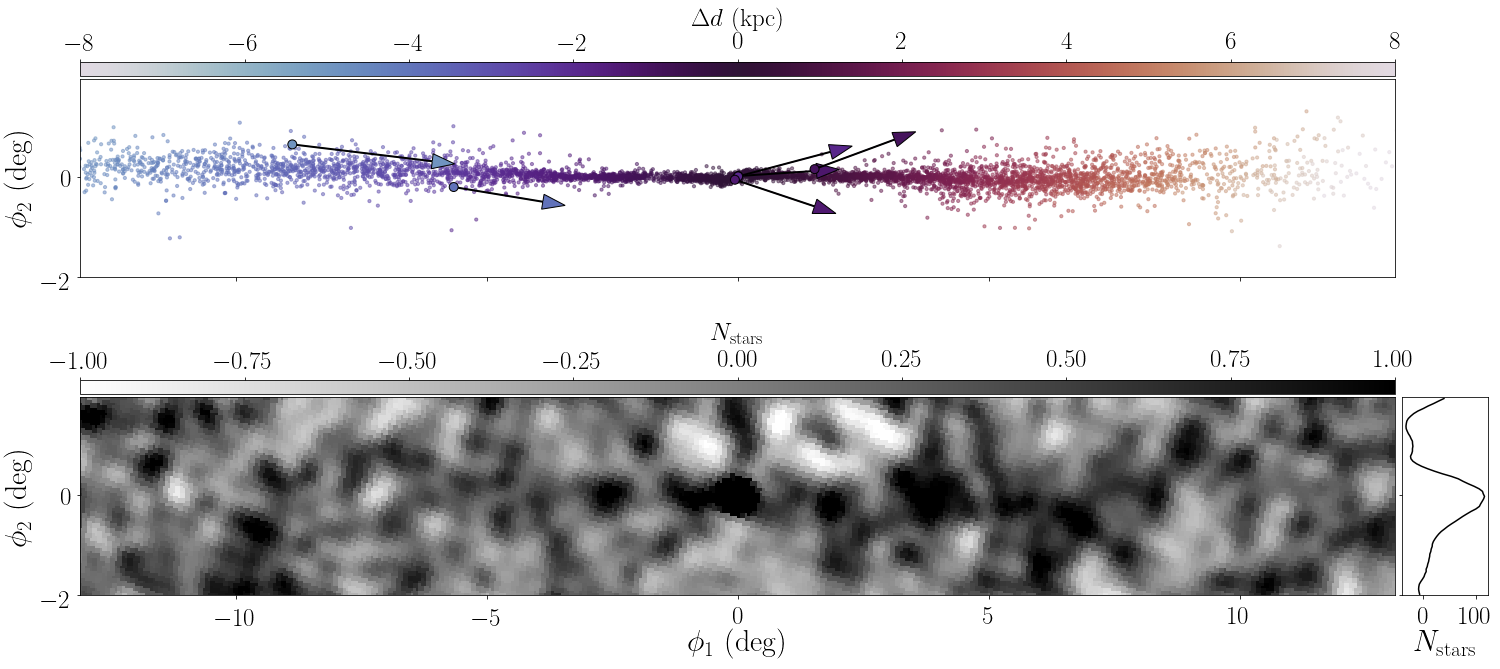

In [522]:
import elysian
import astropy.coordinates as coords
import astropy.units as u
import matplotlib.colors as colors

plot_density.plot_pretty(fontsize=30)

# hpxcube = hpxcube_south
# fracdet = fracdet_south

stream='Pal 13'
ends=ends

width=0.3
sigma=0.2
delta=0.2
vmin=-1.0
vmax=1.0 # 1.5

mu = 16.8
print(mu)

# filename = '../plots/Pal13/Paper/Pal13_stream_coords_%.1f.png' %mu
filename = '../plots/Pal13/Paper/Pal13_stream_coords.pdf'

proj1 = plot_density_healpy.get_ortho_proj(ends=[[8,13],[18,13]], half_sky=True)

# PLOT ZOOM SPATIAL
length = angsep(ends[0][0], ends[0][1], ends[1][0], ends[1][1])

# load data
hpxcube_south, fracdet_south, modulus = load_data.load_data(filename='../data/DECaLS_iso_hpxcube_z0.0001_a13.5_gmax23_gmin3p4_E2_C-0p020p1_nogrz.fits.gz')
# hpxcube_south, fracdet_south, modulus = load_data.load_data('DECaLS', 0.001, 11., 23.0)
# data_south = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, sgr=True, acs=False, globs_dwarfs=True)
data_south_unm = plot_density_healpy.prepare_data(mu, hpxcube_south, modulus, fracdet_south, sigma=0.2, fracmin=0.5, clip=100, lmc=False, milky_way=False, sgr=False, globulars=False, dwarfs=False, galaxies=False, plane=False, center=False, globs_dwarfs=False, acs=False)
# bkg1 = plot_density_healpy.fit_bkg(data_south, proj1, sigma=0.1)

# mask = data.mask

# data = np.load('/Users/nora/Downloads/data-3.npy')
# bkg = np.load('/Users/nora/Downloads/bkg-3.npy')
bkg = np.load('/Users/nora/projects/stream_search/data/bkgmap_pal13_nogrz.npy')
print(data.shape, bkg.shape, hp.nside2npix(512))

# data = np.ma.masked_array(data, mask=mask)
# bkg = np.ma.masked_array(bkg, mask=mask)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# ax1, im1 = plot_density_healpy.plot_proj(proj1, data-bkg, vmin=-1, vmax=1, ax=ax)
ax1, im1 = plot_density_healpy.plot_proj(proj1, bkg, vmin=None, vmax=None, ax=ax)
# ax1.set_xlim(0,0.75)
# ax1.set_ylim(-0.25, 0.25)

# bkg1.mask = data_south_unm.mask
# np.save('../data/Pal13_mask.npy', data_south.mask)
data = np.ma.copy(data_south_unm)
# bkg = np.ma.copy(bkg1)

mask = data_south_unm.mask
# data = np.ma.masked_array(data, mask=mask)
bkg = np.ma.masked_array(bkg, mask=mask)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# ax1, im1 = plot_density_healpy.plot_proj(proj1, data-bkg, vmin=-1, vmax=1, ax=ax)
ax1, im1 = plot_density_healpy.plot_proj(proj1, data, vmin=None, vmax=None, ax=ax)
# ax1.set_xlim(0,0.75)
# ax1.set_ylim(-0.25, 0.25)




# rebin data
nside = hp.get_nside(data)
# height = max(1.2 * 6 * width, 5)
height = 2
length = max(1.2 * length, 1.5 * height)
streampix = streamlib.get_streampix(data=data, stream=None, ends=ends)
delta = 0.05
aspect = float(height) / length
b = np.arange(-height, height, delta)
l = np.arange(-length, length, delta)
ll, bb = np.meshgrid((l[1:] + l[:-1]) / 2., (b[1:] + b[:-1]) / 2.)

# transform data
# phi, theta, psi = results.euler_angles(ends[0][0], ends[0][1], ends[1][0], ends[1][1])
# stream_cls = elysian.euler_factory(stream, phi, theta, psi, ends=ends, flip=True)
# rot = stream_cls(Lambda=ll.flatten() * u.deg, Beta=bb.flatten() * u.deg)
# icrs = rot.transform_to(coords.ICRS)

stream_frame = gala.coordinates.GreatCircleICRSFrame.from_R(R)
rot = coords.SkyCoord(ll.flatten()*u.deg, bb.flatten()*u.deg, frame=stream_frame)
icrs = rot.transform_to(coords.ICRS)

# im data
pix = hp.ang2pix(nside, icrs.ra.deg, icrs.dec.deg, lonlat=True)
value = (data - bkg)[pix].reshape(ll.shape)

# masking for hist
ra, dec = hp.pix2ang(nside, np.arange(len(data)), lonlat=True)
mask_phi1, mask_phi2 = rotation_matrix.phi12_rotmat(ra, dec, R)
# data[(mask_phi1 > phi1_min) & (mask_phi1 < phi1_max)] = np.ma.nomask
data[np.abs(mask_phi1) > 5] = np.ma.nomask
data[np.abs(mask_phi1) < 0.4] = np.ma.nomask
# data[(mask_phi1 < 2.5) & (mask_phi1 > 1.5)] = np.ma.nomask
mask = (data.mask)[pix].reshape(ll.shape)
hist_value = (data - bkg)[pix].reshape(ll.shape)
# value = (data - bkg)[pix].reshape(ll.shape)

# plotting
fig, axes = plt.subplots(2, 1, figsize=(5.0 / aspect, 5.0*2), sharex=True)

######################
# RRL and Model Plot #
######################
ax = axes[0]
ax.set_aspect('equal')
ax.set_xlim(l.min(), l.max())
ax.set_ylim(b.min(), b.max())
# ax.set_xlabel(r'$\phi_1\ {\rm (deg)}$')
ax.set_ylabel(r'$\phi_2\ {\rm (deg)}$')
ax.tick_params(axis='both', which='major', labelsize=25)

plt.sca(ax)

# plot rrls
ref_dist = tbl['distance'].kpc[np.argmin(np.abs(model_phi1))]
rrl_colors = rrls['D_ps1']-ref_dist
cm = cmx.get_cmap(cmaps['twilight'])
# cm = cmx.get_cmap('coolwarm')
# cNorm  = colors.Normalize(vmin=-5, vmax=10)
cNorm  = colors.Normalize(vmin=-8, vmax=8)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

plt.scatter(rrls_phi1, rrls_phi2, c=scalarMap.to_rgba(rrl_colors), s=80, edgecolor='k', zorder=10000)

for j in range(len(rrls)):
    c = rrl_colors[j]
    plt.arrow(rrls_phi1[j], rrls_phi2[j], dx=rrls_pmphi1[j], dy=rrls_pmphi2[j], width=0.02, head_width=0.3, color=scalarMap.to_rgba(c), ec='k')

# plot model
mod_colors = tbl['distance'].kpc - ref_dist
plt.scatter(model_phi1, model_phi2, c=scalarMap.to_rgba(mod_colors), alpha=0.5, zorder=0, s=10)
    
    
    
divider = make_axes_locatable(ax)
cax1 = divider.append_axes('top', size='7%', pad=0.05)
cb1 = mpl.colorbar.ColorbarBase(cax1, cmap=cm, norm=cNorm, orientation='horizontal')
cax1.tick_params(axis='x', top=True, bottom=False, labeltop=True, labelbottom=False, labelsize=25)
cb1.set_label(r'$\Delta d\ \mathrm{(kpc)}$', fontsize=25)
cax1.xaxis.set_label_position('top')
# cb1.set_label(r'$|d_{\rm rrl} - d_{\rm Pal\ 13}|\ \mathrm{(kpc)}$')

ax2 = divider.append_axes('right', size=1.2, pad=0.1, sharey=ax)
ax2.axis('off')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

################
# Spatial Plot #
################
ax = axes[1]
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
ax2 = divider.append_axes('right', size=1.2, pad=0.1, sharey=ax)
# cax = divider.append_axes('top', size='7%', pad=0.05)

# plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
# for tick in ax2.yaxis.get_major_ticks():
#     tick.label.set_fontsize(25) 
ax2.tick_params(axis='both', which='major', labelsize=25)

# Do the plotting...
kw = dict(vmin=vmin, vmax=vmax, rasterized=True, cmap='gray_r')
im = ax.pcolormesh(l, b, value, **kw)

cax2 = divider.append_axes('top', size='7%', pad=0.05)
cb2 = plt.colorbar(im, cax2, orientation='horizontal')
cax2.tick_params(axis='x', top=True, bottom=False, labeltop=True, labelbottom=False, labelsize=25)
cb2.set_label(r'$N_{\rm stars}$', fontsize=25)
cax2.xaxis.set_label_position('top')

# stream track
# ax.plot(ends.L.deg, ends.B.deg, ls='--', lw=1.5, color='deepskyblue')

# hist
new_mask = np.empty(hist_value.shape)
new_mask.shape
new_mask[hist_value < -2] = True
new_mask[hist_value >= -2] = False
hist_value.mask = new_mask

cts = hist_value.sum(axis=1)
area = (~hist_value.mask).sum(axis=1)
ax2.plot(cts / (area.max()/area), (b[1:] + b[:-1]) / 2., color='k')
ax2.set_xlabel(r'$N_{\rm stars}$')

np.save('test1.npy', (cts/(area.max()/area)).compressed())

# label = r'${\rm \textbf{%s}}$' % stream.replace(' ', '\ ')
# ax2.annotate(label, (0.95, 0.95), xycoords='axes fraction',
#              fontsize=14, ha='right', va='top')

# Labeling
ax.set_xlabel(r'$\phi_1\ {\rm (deg)}$')
ax.set_ylabel(r'$\phi_2\ {\rm (deg)}$')
ax.set_xlim(l.min(), l.max())
ax.set_ylim(b.min(), b.max())
ax.tick_params(axis='both', which='major', labelsize=25)

# plot great circle
# plt.sca(ax)
# plt.axhline(0, lw=2, alpha=0.5)

# plt.suptitle(name)
# plt.subplots_adjust(bottom=0.05, top=0.98, right=0.98)
# plt.tight_layout()

plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.sca(ax)

filename = '../plots/Pal13/Paper/Pal13_stream_coords.png'
plt.savefig(filename, rasterize=True, bbox_inches='tight')


In [520]:
hp.get_nside(hpxmap)

512

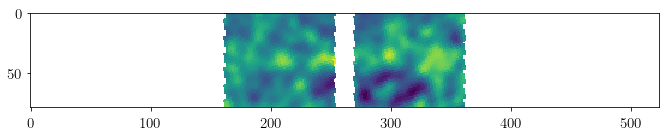

In [105]:
plt.imshow(hist_value)
# np.sum(hist_value, axis=1)

In [97]:
cts.max()

107.0787978203118

524


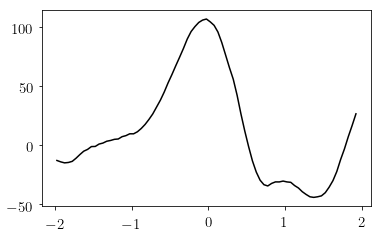

In [90]:
plt.figure(figsize=(6,4))
cts = hist_value.sum(axis=1)
area = (~mask).sum(axis=1)
print(area[0])
plt.plot((b[1:] + b[:-1]) / 2., cts / (area.max()/area), color='k')
plt.show()

In [72]:
new_mask = np.empty(mask.shape)
new_mask.shape
new_mask[hist_value < -2] = True
new_mask[hist_value >= -2] = False

In [74]:
hist_value.mask = new_mask

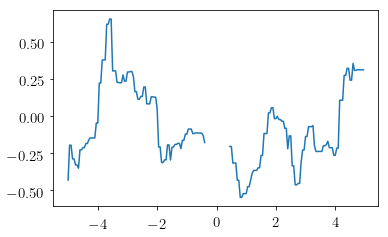

In [77]:
plt.figure(figsize=(6,4))
plt.plot(l[:-1], hist_value[0])
plt.show()


In [499]:
cts0 = np.load('test0.npy')
cts1 = np.load('test1.npy')
# cts2 = (cts/area).compressed()
# cts3 = (cts/area).compressed()

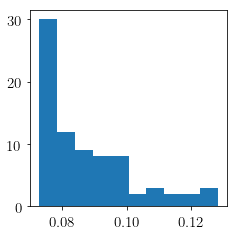

In [500]:
plt.figure(figsize=(4,4))
plt.hist(cts0-cts1)
plt.show()

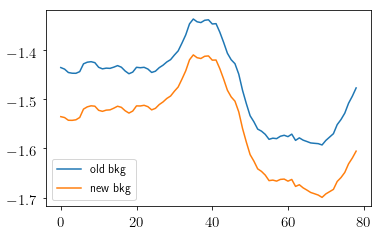

In [508]:
plt.figure(figsize=(6,4))
plt.plot (cts0, label='old bkg')
plt.plot(cts1, label='new bkg')
# plt.plot(cts0-cts1)
plt.legend(loc='lower left', fontsize=12)
plt.show()

# CMD

[-0.02, 0.1]
3.4
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666


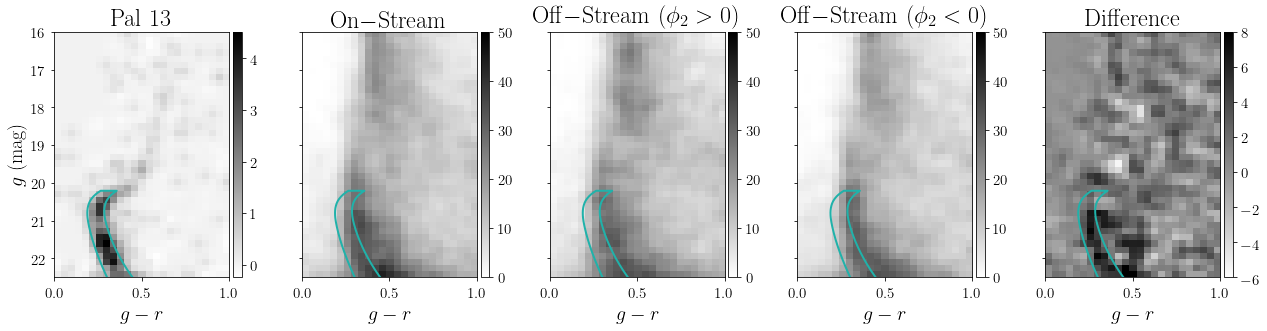

In [392]:
from matplotlib.patches import PathPatch
import filter_data
reload(filter_data)
import surveys
reload(surveys)
import plot_hess
err = surveys.surveys['DECaLS']['err']
# mu, age, z = 16.9, 12.0, 0.001


plot_density.plot_pretty(fontsize=20)

# mu, age, z = 16.8, 11.0, 0.001
mu, age, z = 16.8, 13.5, 0.0001
# mu, age, z = 16.93, 11., iso.feh2z(-1.6)
iso = filter_data.isochrone_factory('Dotter', survey='DES', age=age, distance_modulus=mu, z=z)

# C = [0.01, 0.075]
# E = 3.  
# gmin = 3.4
# C = [0.01-0.05, 0.05+0.05]
# C = [0.01-0.03, 0.05+0.03]
# C = [0.01-0.03, 0.1]

# C = [0.01, 0.05]
C = [-0.02, 0.1]
# C = [-0.02, 0.08]
# C = [-0.04, 0.1]

print(C)
E = 2.  
dmu = 0.5
gmin = 3.4
print(gmin)
mk = filter_data.mkpol(mu=mu, age=age, z=z, dmu=dmu, C=C, E=E, err=err, survey='DECaLS', clip=gmin)
mk[:,1] += mu


width_on = 0.5
width_off = 0.5
separation = 2.0
off_min = separation - width_off / 2.
off_max = separation + width_off / 2.

data = fitsio.open('../data/cutouts/Pal13.fits.gz')[1].data
phi1, phi2 = rotation_matrix.phi12_rotmat(data['ra'], data['dec'], R)

sep = angsep(data['ra'], data['dec'], ra_pal13, dec_pal13)
glob_sel = sep < 0.1 # r_pal13 # 0.4 # < 0.1

# ra_off, dec_off = ra_pal13 - 2.0, dec_pal13 - 2.0
phi1_off, phi2_off = 0, 2
# sep = angsep(data['ra'], data['dec'], ra_off, dec_off)
sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.1) | (sep2 < 0.1) # r_pal13 # 0.4 # < 0.1


reload(plot_hess)
vmin, vmax = None, None

fig, ax = plt.subplots(1,5, figsize=(18, 5), sharey=True)
fig.tight_layout()

sel_on = glob_sel
sel_off = glob_sel_off
weights = None
im1 = plot_hess.plot_hess2( 'Pal\ 13', data[sel_on], data[sel_off], ax=ax[0], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=vmin, vmax=vmax, weights=weights)

############

sep = angsep(data['ra'], data['dec'], ra_pal13, dec_pal13)
glob_sel = sep < 0.4 # r_pal13 # 0.4 # < 0.1

sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.4) | (sep2 < 0.4)

# xmin, xmax = -5, 5
xmin, xmax = phi1_min, phi1_max
sel_on = (phi1 > xmin) & (phi1 < xmax) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
sel_on &= ~glob_sel

ac1 = plot_hess.area_correction(data[sel_on], data[sel_off])

sel_off &= ~glob_sel_off
# sel_off &= phi2 > 0

ac2 = plot_hess.area_correction(data[sel_on], data[sel_off])

im2 = plot_hess.plot_hess2( 'On\mathrm{-}Stream', data[sel_on], None, ax=ax[1], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=0, vmax=50, weights=weights)
im3a= plot_hess.plot_hess2( 'Off\mathrm{-}Stream\ (\phi_2 > 0)', data[sel_off&(phi2 > 0)], None, ax=ax[2], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=0, vmax=50, weights=weights)
im3b= plot_hess.plot_hess2( 'Off\mathrm{-}Stream\ (\phi_2 < 0)', data[sel_off&(phi2 < 0)], None, ax=ax[3], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=0, vmax=50, weights=weights)
# sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)

np.save('../data/Pal13_onstream.npy', data[sel_on])
np.save('../data/Pal13_offstream.npy', data[sel_off])
im4 = plot_hess.plot_hess2( 'Difference', data[sel_on], data[sel_off], ax=ax[4], gband='MAG_SFD_G', rband='MAG_SFD_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=-6, vmax=8, weights=weights)

plot_hess.colorbar(im1)
plot_hess.colorbar(im2)
plot_hess.colorbar(im3a)
plot_hess.colorbar(im3b)
plot_hess.colorbar(im4)

plt.subplots_adjust(wspace=0, hspace=0)

for axi in ax:
    axi.set_xlabel(r'$g - r$')
#     axi.scatter(iso.color, iso.mag+16.6, c='r', s=1, alpha=1.)
#     axi.scatter(iso.color, iso.mag+16.8, c='lightseagreen', s=1, alpha=1.)
#     axi.scatter(iso.color, iso.mag+16.9, c='b', s=1, alpha=0.4)
    axi.plot(mk[:,0], mk[:,1], c='lightseagreen', lw=2)
    axi.set_xlim(0,1)
    axi.set_ylim(22.5, 16)
ax[0].set_ylabel(r'$g\ \mathrm{(mag)}$')

# plt.savefig('../plots/Pal13/Paper/Pal13_CMD_10.png')
# plt.savefig('../plots/Pal13/Paper/Pal13_CMD_4.png')
plt.savefig('../plots/Pal13/Paper/Pal13_CMD.pdf')
# cbar = plot_hess.colorbar(im)
# cbar.set_label(r'$\mathrm{Counts}$')

In [389]:
ac1*2, ac2*2

(0.9415384615384615, 0.9776357827476039)

[-0.02, 0.1]
3.4
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666


Text(130.803,0.5,'$g\\ \\mathrm{(mag)}$')

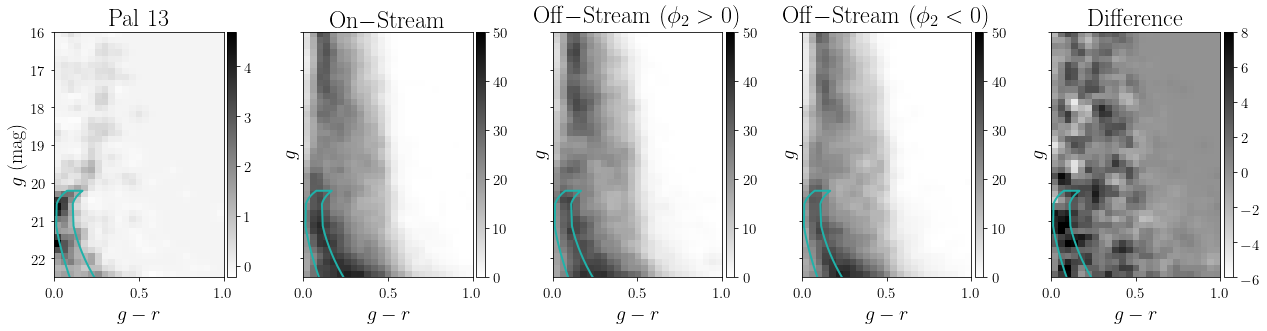

In [384]:
from matplotlib.patches import PathPatch
import filter_data
reload(filter_data)
import surveys
reload(surveys)
import plot_hess
err = surveys.surveys['DECaLS']['err']
# mu, age, z = 16.9, 12.0, 0.001


plot_density.plot_pretty(fontsize=20)

# mu, age, z = 16.8, 11.0, 0.001
mu, age, z = 16.8, 13.5, 0.0001
# mu, age, z = 16.93, 11., iso.feh2z(-1.6)
iso = filter_data.isochrone_factory('Dotter', survey='DES', age=age, distance_modulus=mu, z=z)

# C = [0.01, 0.075]
# E = 3.  
# gmin = 3.4
# C = [0.01-0.05, 0.05+0.05]
# C = [0.01-0.03, 0.05+0.03]
# C = [0.01-0.03, 0.1]

# C = [0.01, 0.05]
C = [-0.02, 0.1]
# C = [-0.02, 0.08]
# C = [-0.04, 0.1]

print(C)
E = 2.  
dmu = 0.5
gmin = 3.4
print(gmin)
mk = filter_data.mkpol_grz(mu=mu, age=age, z=z, dmu=dmu, C=C, E=E, err=err, survey='DECaLS', clip=gmin)
mk[:,1] += mu


width_on = 0.5
width_off = 0.5
separation = 2.0
off_min = separation - width_off / 2.
off_max = separation + width_off / 2.

data = fitsio.open('../data/cutouts/Pal13.fits.gz')[1].data
phi1, phi2 = rotation_matrix.phi12_rotmat(data['ra'], data['dec'], R)

sep = angsep(data['ra'], data['dec'], ra_pal13, dec_pal13)
glob_sel = sep < 0.1 # r_pal13 # 0.4 # < 0.1

# ra_off, dec_off = ra_pal13 - 2.0, dec_pal13 - 2.0
phi1_off, phi2_off = 0, 2
# sep = angsep(data['ra'], data['dec'], ra_off, dec_off)
sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.1) | (sep2 < 0.1) # r_pal13 # 0.4 # < 0.1


reload(plot_hess)
vmin, vmax = None, None

fig, ax = plt.subplots(1,5, figsize=(18, 5), sharey=True)
fig.tight_layout()

sel_on = glob_sel
sel_off = glob_sel_off
weights = None
im1 = plot_hess.plot_hess_grz( 'Pal\ 13', data[sel_on], data[sel_off], ax=ax[0], gband='MAG_SFD_G', rband='MAG_SFD_R', zband='MAG_SFD_Z', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=vmin, vmax=vmax, weights=weights)

############

sep = angsep(data['ra'], data['dec'], ra_pal13, dec_pal13)
glob_sel = sep < 0.4 # r_pal13 # 0.4 # < 0.1

sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.4) | (sep2 < 0.4)

# xmin, xmax = -5, 5
xmin, xmax = phi1_min, phi1_max
sel_on = (phi1 > xmin) & (phi1 < xmax) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
sel_on &= ~glob_sel
sel_off &= ~glob_sel_off
# sel_off &= phi2 > 0

im2 = plot_hess.plot_hess_grz( 'On\mathrm{-}Stream', data[sel_on], None, ax=ax[1], gband='MAG_SFD_G', rband='MAG_SFD_R', zband='MAG_SFD_Z', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=0, vmax=50, weights=weights)
im3a= plot_hess.plot_hess_grz( 'Off\mathrm{-}Stream\ (\phi_2 > 0)', data[sel_off&(phi2 > 0)], None, ax=ax[2], gband='MAG_SFD_G', rband='MAG_SFD_R', zband='MAG_SFD_Z', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=0, vmax=50, weights=weights)
im3b= plot_hess.plot_hess_grz( 'Off\mathrm{-}Stream\ (\phi_2 < 0)', data[sel_off&(phi2 < 0)], None, ax=ax[3], gband='MAG_SFD_G', rband='MAG_SFD_R', zband='MAG_SFD_Z', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=0, vmax=50, weights=weights)
# sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)

# np.save('../data/Pal13_onstream.npy', data[sel_on])
# np.save('../data/Pal13_offstream.npy', data[sel_off])
im4 = plot_hess.plot_hess_grz( 'Difference', data[sel_on], data[sel_off], ax=ax[4], gband='MAG_SFD_G', rband='MAG_SFD_R', zband='MAG_SFD_Z', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=-6, vmax=8, weights=weights)

plot_hess.colorbar(im1)
plot_hess.colorbar(im2)
plot_hess.colorbar(im3a)
plot_hess.colorbar(im3b)
plot_hess.colorbar(im4)

plt.subplots_adjust(wspace=0, hspace=0)

for axi in ax:
    axi.set_xlabel(r'$g - r$')
#     axi.scatter(iso.color, iso.mag+16.6, c='r', s=1, alpha=1.)
#     axi.scatter(iso.color, iso.mag+16.8, c='lightseagreen', s=1, alpha=1.)
#     axi.scatter(iso.color, iso.mag+16.9, c='b', s=1, alpha=0.4)
    axi.plot(mk[:,0], mk[:,1], c='lightseagreen', lw=2)
    axi.set_xlim(0,1)
    axi.set_ylim(22.5, 16)
ax[0].set_ylabel(r'$g\ \mathrm{(mag)}$')

# plt.savefig('../plots/Pal13/Paper/Pal13_CMD_10.png')
# plt.savefig('../plots/Pal13/Paper/Pal13_CMD_4.png')
# plt.savefig('../plots/Pal13/Paper/Pal13_CMD.pdf')
# cbar = plot_hess.colorbar(im)
# cbar.set_label(r'$\mathrm{Counts}$')

In [513]:
gmag = data['MAG_SFD_G']
rmag = data['MAG_SFD_R']
zmag = data['MAG_SFD_Z']
mu, age, z = 16.8, 13.5, 0.0001
err = surveys.surveys['DECaLS']['err']
C = [-0.02, 0.1]
E = 2.  
dmu = 0.5
gmin = 3.4

# g vs. g-r
mk = filter_data.mkpol(mu=mu, age=age, z=z, dmu=dmu, C=C, E=E, err=err, survey='DECaLS', clip=gmin)
mk[:,1] += mu
pth = Path(mk)
cm = np.vstack([gmag-rmag, gmag]).T
idx = pth.contains_points(cm)
idx &= (gmag > gmin)

# g vs. r-z
mk_grz = filter_data.mkpol_grz(mu=mu, age=age, z=z, dmu=dmu, C=C, E=E, err=err, survey='DECaLS', clip=gmin)
mk_grz[:,1] += mu
pth = Path(mk_grz)
cm = np.vstack([rmag-zmag, gmag]).T
idx_grz = pth.contains_points(cm)
idx_grz &= (gmag > gmin)


n_on = data[sel_on & idx].size
n_off = (data[sel_off & idx].size)/2.
# n_on = data[sel_on & idx & idx_grz].size
# n_off = (data[sel_off & idx & idx_grz].size)/2.
print(n_on, n_off)

snr = (n_on - n_off)/np.sqrt(n_off)
print(snr)

1494 1253.0
6.808344253668178


In [170]:
# https://arxiv.org/pdf/1406.2922.pdf
import scipy

def p_h0(n_on, n_off, alpha):
    gamma = (1 + 2*n_off) * alpha**(0.5 + n_on + n_off) * scipy.special.gamma(0.5 + n_on + n_off)
    print(gamma)
    delta = 2*(1 + alpha)**(n_on + n_off) * scipy.special.gamma(1 + n_on + n_off) * scipy.special.hyp2f1(0.5 + n_off, 1 + n_on + n_off, 1.5 + n_off, -1/alpha)
    print(delta)
    c1c0 = np.sqrt(np.pi) / 2*np.arctan2(1/np.sqrt(alpha))
    print(c1c0)
    return gamma / (gamma + c1c0 * delta)

In [171]:
p_h0(n_on, n_off, 1)
# n_on, n_off

inf


OverflowError: (34, 'Result too large')

# Lit Iso

3.5
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666
dx, dy =  0.04 0.1666


Text(94.8029,0.5,'$g\\ \\mathrm{(mag)}$')

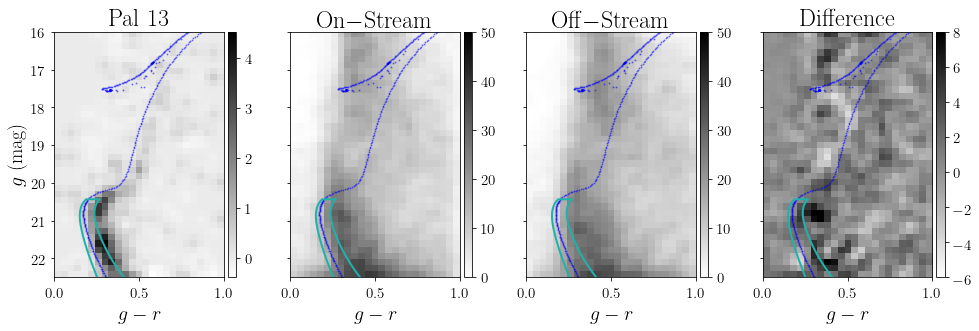

In [340]:
from matplotlib.patches import PathPatch
import filter_data
reload(filter_data)
import surveys
reload(surveys)
import plot_hess
err = surveys.surveys['DECaLS']['err']
# mu, age, z = 16.9, 12.0, 0.001


plot_density.plot_pretty(fontsize=20)

# mu, age, z = 16.8, 11.0, 0.001
mu, age, z = 16.93, 11., iso.feh2z(-1.6)
iso = filter_data.isochrone_factory('Dotter', survey='DES', age=age, distance_modulus=mu, z=z)

C = [0.01, 0.05]
E = 3.  
dmu = 0.5
gmin = 3.5
print(gmin)
mk = filter_data.mkpol(mu=mu, age=age, z=z, dmu=dmu, C=C, E=E, err=err, survey='DECaLS', clip=gmin)
mk[:,1] += mu


width_on = 0.5
width_off = 0.5
separation = 2.0
off_min = separation - width_off / 2.
off_max = separation + width_off / 2.

# data = fitsio.open('../data/Pal13_2.fits.gz')[1].data
phi1, phi2 = rotation_matrix.phi12_rotmat(data['RA'], data['DEC'], R)

sep = angsep(data['RA'], data['DEC'], ra_pal13, dec_pal13)
glob_sel = sep < 0.1 # r_pal13 # 0.4 # < 0.1

# ra_off, dec_off = ra_pal13 - 2.0, dec_pal13 - 2.0
phi1_off, phi2_off = 0, 2
# sep = angsep(data['RA'], data['DEC'], ra_off, dec_off)
sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.1) | (sep2 < 0.1) # r_pal13 # 0.4 # < 0.1


reload(plot_hess)
vmin, vmax = None, None

fig, ax = plt.subplots(1,4, figsize=(14, 5), sharey=True)
fig.tight_layout()

sel_on = glob_sel
sel_off = glob_sel_off
weights = None
im1 = plot_hess.plot_hess2( 'Pal\ 13', data[sel_on], data[sel_off], ax=ax[0], gband='MAG_SFDNEW_G', rband='MAG_SFDNEW_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=vmin, vmax=vmax, weights=weights)

############

sep = angsep(data['RA'], data['DEC'], ra_pal13, dec_pal13)
glob_sel = sep < 0.4 # r_pal13 # 0.4 # < 0.1

sep1 = angsep(phi1, phi2, 0, 2)
sep2 = angsep(phi1, phi2, 0, -2)
glob_sel_off = (sep1 < 0.4) | (sep2 < 0.4)

xmin, xmax = -5, 5
sel_on = (phi1 > xmin) & (phi1 < xmax) & (np.abs(interp_track(phi1) - phi2) < width_on/2.)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)
sel_on &= ~glob_sel
sel_off &= ~glob_sel
sel_off &= phi2 > 0

im2 = plot_hess.plot_hess2( 'On\mathrm{-}Stream', data[sel_on], None, ax=ax[1], gband='MAG_SFDNEW_G', rband='MAG_SFDNEW_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=0, vmax=50, weights=weights)
im3= plot_hess.plot_hess2( 'Off\mathrm{-}Stream', data[sel_off], None, ax=ax[2], gband='MAG_SFDNEW_G', rband='MAG_SFDNEW_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=0, vmax=50, weights=weights)
sel_off = (phi1 > xmin) & (phi1 < xmax) & (np.abs(phi2 - interp_track(phi1)) < off_max) & (np.abs(phi2 - interp_track(phi1)) > off_min)

np.save('../data/Pal13_onstream.npy', data[sel_on])
np.save('../data/Pal13_offstream.npy', data[sel_off])
im4 = plot_hess.plot_hess2( 'Difference', data[sel_on], data[sel_off], ax=ax[3], gband='MAG_SFDNEW_G', rband='MAG_SFDNEW_R', gmax=23, dx=0.04, dy=0.1666, smoothing=0.75, vmin=-6, vmax=8, weights=weights)

plot_hess.colorbar(im1)
plot_hess.colorbar(im2)
plot_hess.colorbar(im3)
plot_hess.colorbar(im4)

plt.subplots_adjust(wspace=0, hspace=0)

for axi in ax:
    axi.set_xlabel(r'$g - r$')
#     axi.scatter(iso.color, iso.mag+16.6, c='r', s=1, alpha=1.)
#     axi.scatter(iso.color, iso.mag+16.8, c='lightseagreen', s=1, alpha=1.)
    axi.scatter(iso.color, iso.mag+16.9, c='b', s=1, alpha=0.4)
    axi.plot(mk[:,0], mk[:,1], c='lightseagreen', lw=2)
    axi.set_xlim(0,1)
    axi.set_ylim(22.5, 16)
ax[0].set_ylabel(r'$g\ \mathrm{(mag)}$')

# plt.savefig('../plots/Pal13/Paper/Pal13_CMD_7.png')
# cbar = plot_hess.colorbar(im)
# cbar.set_label(r'$\mathrm{Counts}$')